#### PASO 1: CONFIGURACIÓN DEL ENTORNO E IMPORTACIÓN DE LIBRERÍAS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')


# Cargar los datos
file_path = '../cleaned_main_financial_metrics.csv'
df = pd.read_csv(file_path)

# --- Configuración de Visualización ---
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f'{x:.3f}' if abs(x) > 0.01 else f'{x:.3e}')
pd.set_option('display.width', 1000)
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.autolayout'] = True # Ajuste automático de layout

# --- Directorio de Salida para Gráficos ---
# output_dir = "EDA_Graficos"
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)
# print(f"Los gráficos se guardarán en: '{output_dir}/'")

display(df.head())


recommendationClass recommendationKey  recommendationMean  numberOfAnalystOpinions                       shortName symbol Ticker              sector state fullExchangeName  In_SP500  In_NASDAQ  currentPrice  allTimeHigh  allTimeLow  52WeekChange  fiftyDayAverageChangePercent  twoHundredDayAverageChangePercent  beta  averageVolume        marketCap  enterpriseValue  priceToBook  enterpriseToRevenue  profitMargins  grossMargins  ebitdaMargins  operatingMargins  returnOnAssets  returnOnEquity  revenueGrowth    totalRevenue  revenuePerShare    grossProfits         ebitda  netIncomeToCommon  trailingEps      totalCash  totalCashPerShare       totalDebt  quickRatio  currentRatio  bookValue  operatingCashflow   freeCashflow  trailingAnnualDividendYield  payoutRatio  sharesOutstanding   floatShares  sharesShort  sharesPercentSharesOut  shortRatio  shortPercentOfFloat  heldPercentInsiders  heldPercentInstitutions  fullTimeEmployees  is_Insolvent  _debtToEquity  has_benefits   _PER
0                    0        Strong Buy               1.320                   22.000                 S&P Global Inc.   SPGI   SPGI  Financial Services    NY             NYSE      True      False       473.190      579.050       0.336        -0.096                        -0.093                             -0.078 1.189    1409834.000 144464904192.000 159203901440.000        4.327               10.830          0.273         0.696          0.494             0.427           0.063           0.113          0.058 14700000256.000           47.689 10225000448.000 7260000256.000     4011000064.000       13.010 1847000064.000              6.050 12014999552.000       0.807         0.982    109.368     5583000064.000 4932874752.000                    7.923e-03        0.287      305300000.000 304622234.000  3085150.000                   0.010       1.980                0.010            2.530e-03                    0.905          42350.000             0  109858455.417             0 36.371
1                    2              Hold               2.250                   17.000    General Dynamics Corporation     GD     GD         Industrials    VA             NYSE      True      False       331.150      347.370       0.338         0.075                         0.014                              0.152 0.484    1044250.000  89077145600.000  98039226368.000        3.772                1.950          0.081         0.154          0.121             0.102           0.058           0.179          0.089 50273001472.000          185.340  7743000064.000 6072999936.000     4086000128.000       14.900 1523000064.000              5.670 10618999808.000       0.737         1.364     87.792     5016999936.000 3491124992.000                        0.018        0.392      268993342.000 251745725.000  2689182.000               1.000e-02       2.390                0.011            5.080e-03                    0.867         117000.000             0  120956349.189             0 22.225
2                    1               Buy               1.455                   11.000  Life Time Group Holdings, Inc.    LTH    LTH   Consumer Cyclical    MN             NYSE     False      False        25.700       34.990       8.750    -3.876e-03                        -0.070                             -0.112 1.702    2283057.000   5653899776.000   9564423168.000        1.970                3.387          0.080         0.472          0.251             0.159           0.036           0.087          0.140  2824026880.000           13.425  1334104064.000  707478016.000      226762000.000        1.020  180280000.000              0.819  4090802944.000       0.411         0.647     13.048      693841024.000   36997000.000                    0.000e+00    0.000e+00      219996102.000 161164744.000  7582910.000                   0.035       3.660                0.057                0.126                    0.804          49000.000             0  313519538.933             0 25.196
3                    2              Hold       

#### PASO 2: CARGA DE DATOS Y SELECCIÓN DE VARIABLES


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   recommendationClass                1486 non-null   int64  
 1   recommendationKey                  1486 non-null   object 
 2   recommendationMean                 1486 non-null   float64
 3   numberOfAnalystOpinions            1486 non-null   float64
 4   shortName                          1486 non-null   object 
 5   symbol                             1486 non-null   object 
 6   Ticker                             1486 non-null   object 
 7   sector                             1486 non-null   object 
 8   state                              1486 non-null   object 
 9   fullExchangeName                   1486 non-null   object 
 10  In_SP500                           1486 non-null   bool   
 11  In_NASDAQ                          1486 non-null   bool 

In [7]:
# 1. Definir el Target
TARGET_COL = 'recommendationClass'

# 2. Definir columnas a excluir
# (Identificadores, texto libre, o 'leaks' de la variable target)
EXCLUDE_COLS = [
    TARGET_COL, 
    'recommendationKey', 'recommendationMean',
    'shortName', 'symbol', 'Ticker', 'fullExchangeName'
]

ALL_COLS = df.columns.tolist()
FEATURE_COLS = [col for col in ALL_COLS if col not in EXCLUDE_COLS]

NUMERIC_FEATURES = df[FEATURE_COLS].select_dtypes(include=['float64']).columns.tolist()
CATEGORICAL_FEATURES = df[FEATURE_COLS].select_dtypes(include=['object', 'bool', 'int64']).columns.tolist()

# 4. Crear X (features) e y (target)
y = df[TARGET_COL]
X = df[NUMERIC_FEATURES + CATEGORICAL_FEATURES]

print(f"Forma de X (features): {X.shape}")
print(X.columns.tolist())
print(f"Forma de y (target): {y.shape}")
print(y.value_counts())

Forma de X (features): (1486, 53)
['numberOfAnalystOpinions', 'currentPrice', 'allTimeHigh', 'allTimeLow', '52WeekChange', 'fiftyDayAverageChangePercent', 'twoHundredDayAverageChangePercent', 'beta', 'averageVolume', 'marketCap', 'enterpriseValue', 'priceToBook', 'enterpriseToRevenue', 'profitMargins', 'grossMargins', 'ebitdaMargins', 'operatingMargins', 'returnOnAssets', 'returnOnEquity', 'revenueGrowth', 'totalRevenue', 'revenuePerShare', 'grossProfits', 'ebitda', 'netIncomeToCommon', 'trailingEps', 'totalCash', 'totalCashPerShare', 'totalDebt', 'quickRatio', 'currentRatio', 'bookValue', 'operatingCashflow', 'freeCashflow', 'trailingAnnualDividendYield', 'payoutRatio', 'sharesOutstanding', 'floatShares', 'sharesShort', 'sharesPercentSharesOut', 'shortRatio', 'shortPercentOfFloat', 'heldPercentInsiders', 'heldPercentInstitutions', 'fullTimeEmployees', '_debtToEquity', '_PER', 'sector', 'state', 'In_SP500', 'In_NASDAQ', 'is_Insolvent', 'has_benefits']
Forma de y (target): (1486,)
recom

#### PASO 2.1:  NORMALIZAR (ESTANDARIZAR) LAS VARIABLES NUMÉRICAS

Estandarizamos las variables numéricas y lo guardamos en un csv que se llame est_***
Si las normalizasemos el csv se llamará norm_***

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df_std = df.copy()

# df_std[NUMERIC_FEATURES] = scaler.fit_transform(df[NUMERIC_FEATURES])

# df_std.to_csv('../std_main_financial_metrics.csv', index=False)

#### PASO 3: ANÁLISIS EXPLORATORIO DE DATOS (EDA)

El EDA es fundamental para entender la estructura, la calidad y las relaciones en los datos.



--- 3.1. Análisis del Target (recommendationClass) ---
Estadísticas Descriptivas del Target:
count    1486.000
mean        1.869
std         1.158
min     0.000e+00
25%         1.000
50%         2.000
75%         3.000
max         4.000
Name: recommendationClass, dtype: float64

Balance de Clases (Target):
recommendationClass
0    13.32 %
1    25.71 %
2    30.48 %
3    21.74 %
4     8.75 %
Name: proportion, dtype: object


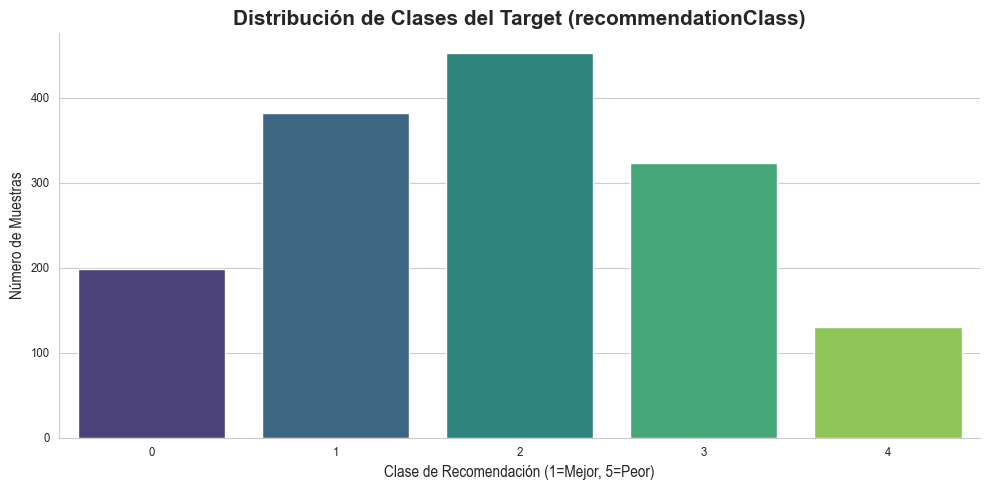

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- 3.1. Análisis del Target (recommendationClass) ---")
print("Estadísticas Descriptivas del Target:")
print(df[TARGET_COL].describe())

print("\nBalance de Clases (Target):")
class_balance = df[TARGET_COL].value_counts(normalize=True).mul(100).round(2).sort_index()
print(class_balance.astype(str) + ' %')

plt.figure(figsize=(10, 5))
sns.countplot(x=df[TARGET_COL], palette='viridis', order=sorted(df[TARGET_COL].unique()))
plt.title(f'Distribución de Clases del Target ({TARGET_COL})', fontsize=15, weight='bold')
plt.xlabel('Clase de Recomendación (1=Mejor, 5=Peor)', fontsize=12)
plt.ylabel('Número de Muestras', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.savefig(os.path.join(output_dir, 'eda_1_target_distribution.png'))
# plt.close()


--- 3.2. Análisis de Features Numéricas ---

Estadísticas Descriptivas de todas las Features Numéricas:
                                     count            mean              std              min            25%            50%             75%               max
numberOfAnalystOpinions           1486.000          12.691            8.571            1.000          6.000         11.000          17.000            62.000
currentPrice                      1486.000         107.525          247.047            0.960         21.477         53.335         127.260          7639.060
allTimeHigh                       1486.000         213.736          768.182           10.500         56.860        102.535         208.585         24500.000
allTimeLow                        1486.000           6.649            9.510        0.000e+00          1.086          3.410           8.295           117.540
52WeekChange                      1486.000           0.146            1.385           -0.823         -0.205   

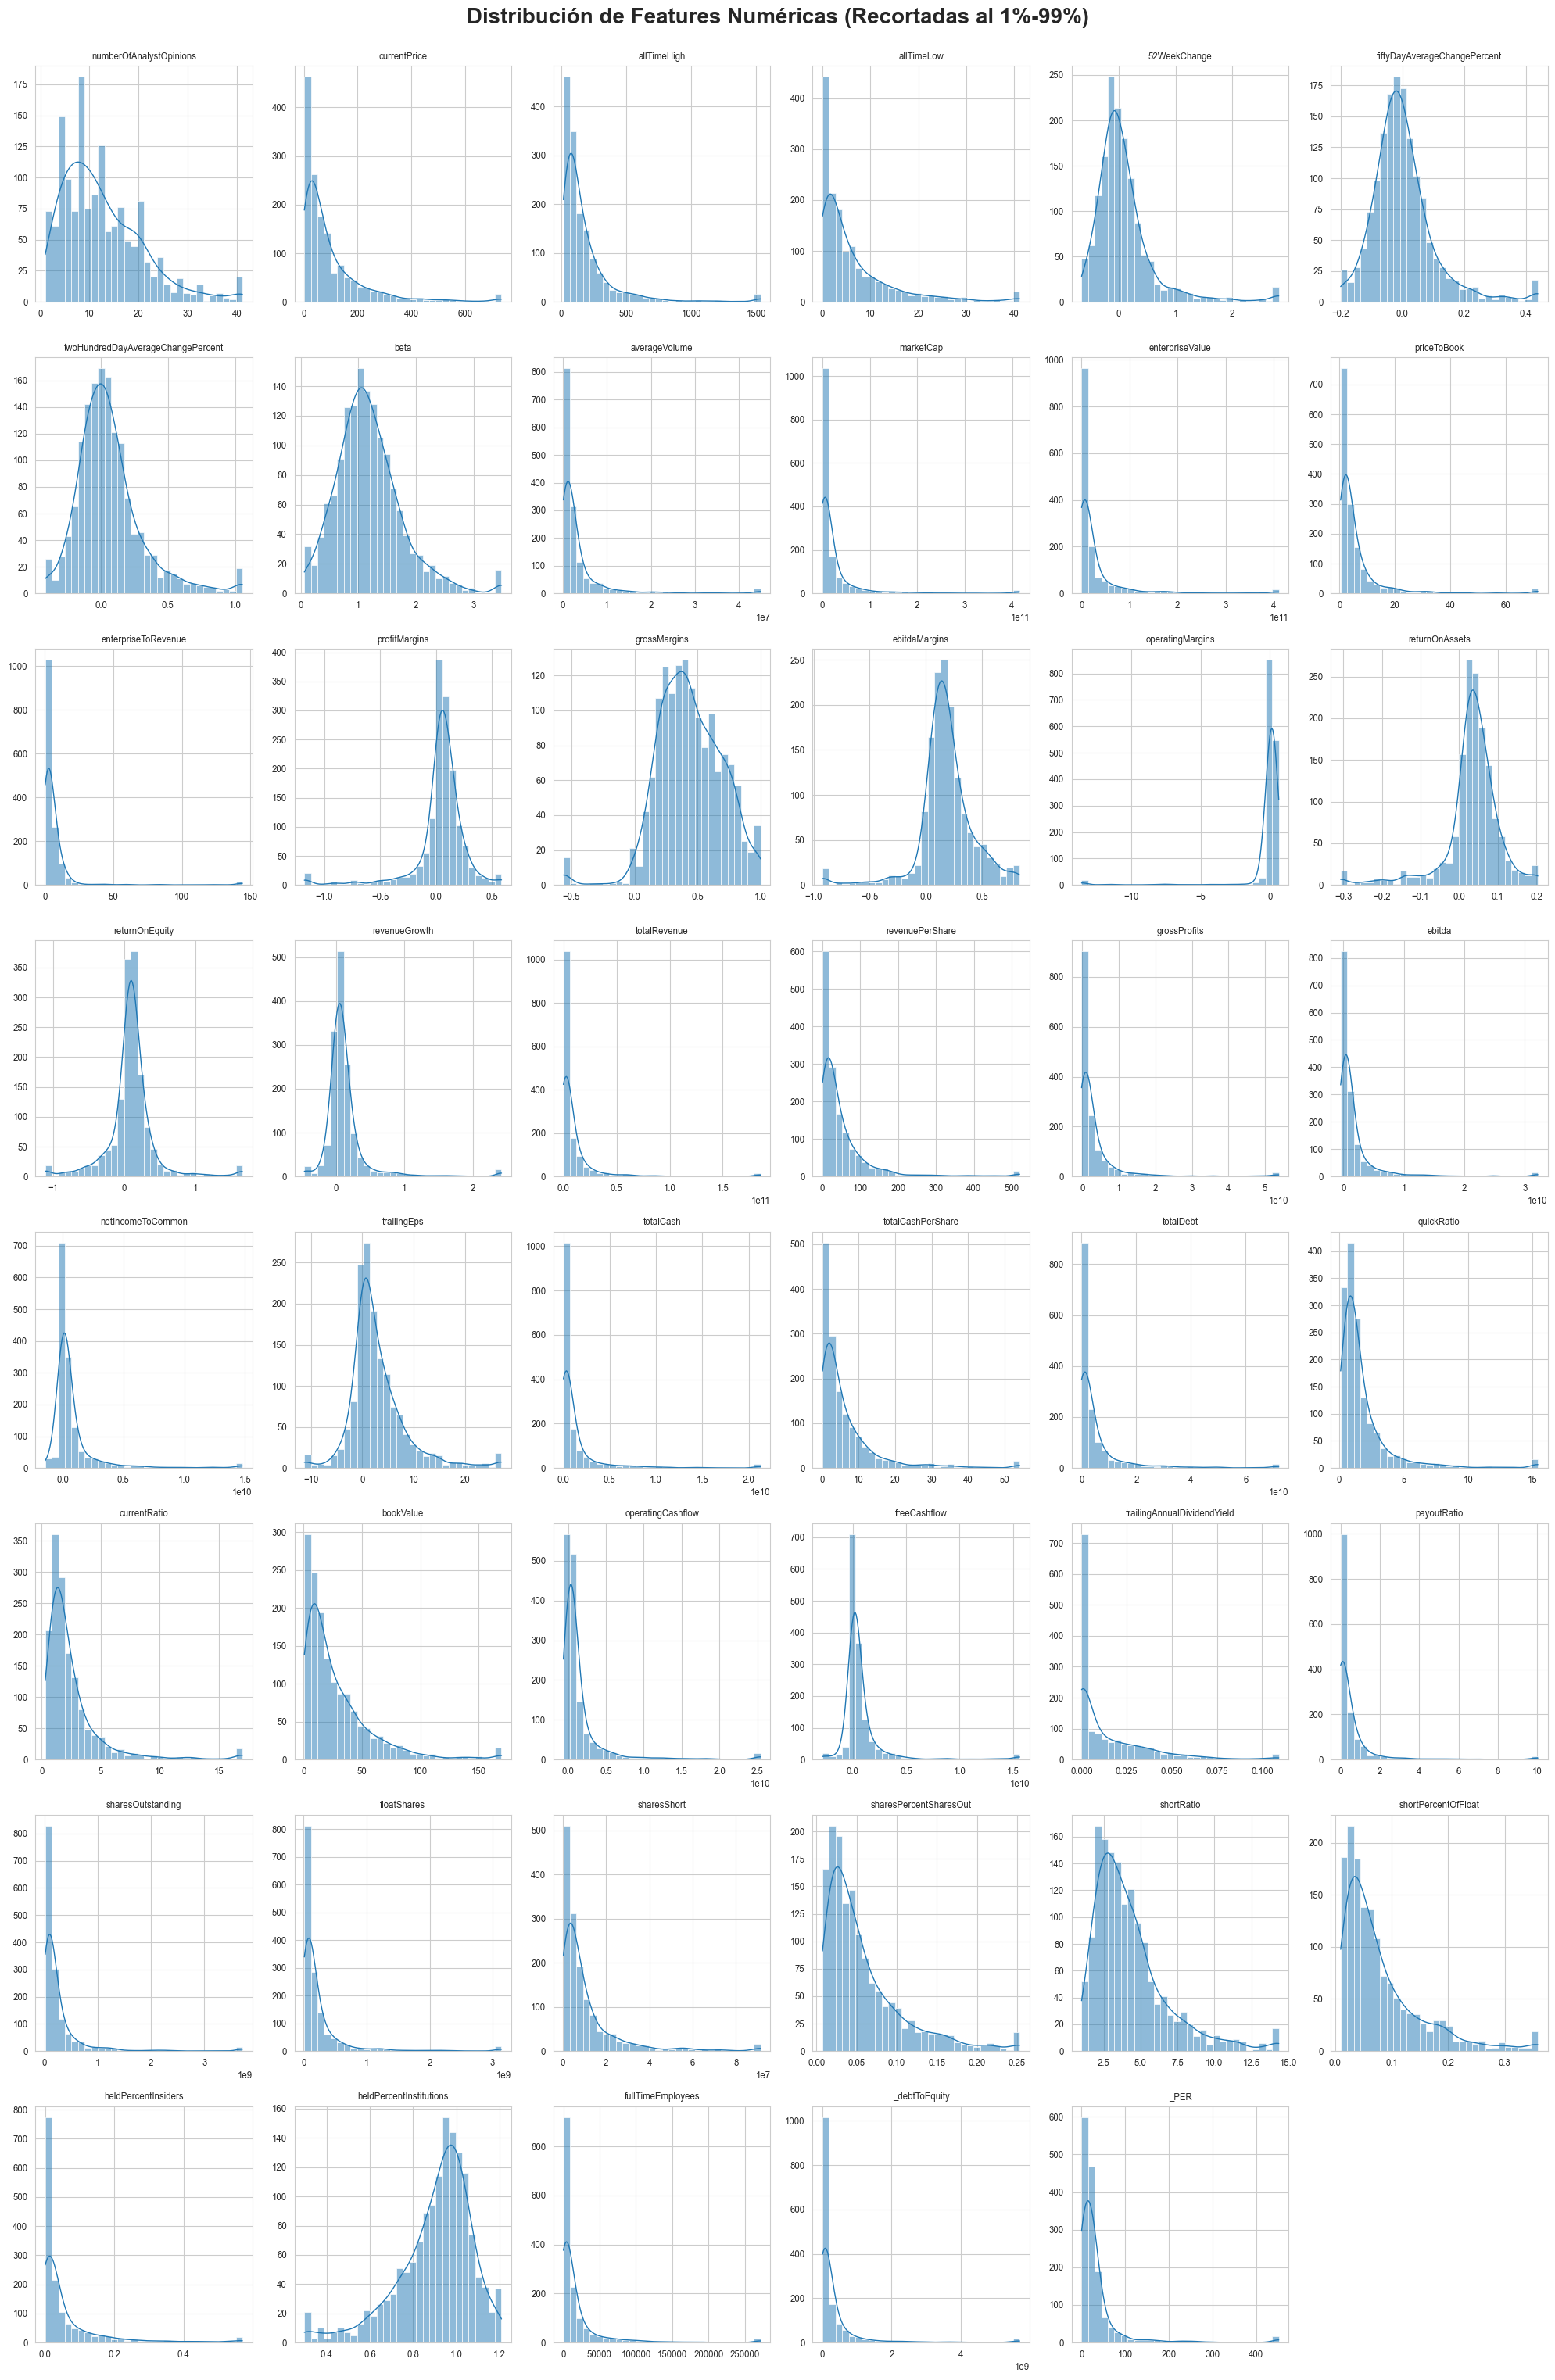

In [5]:
print("\n--- 3.2. Análisis de Features Numéricas ---")

# --- 3.2.1. Estadísticas Descriptivas (Todas) ---
print("\nEstadísticas Descriptivas de todas las Features Numéricas:")
# .T transpone la salida para que sea más fácil de leer
numeric_summary = df[NUMERIC_FEATURES].describe().T
print(numeric_summary)
# numeric_summary.to_csv(os.path.join(output_dir, 'eda_numeric_summary.csv'))

# --- 3.2.2. Distribuciones (Histogramas de Todas) ---
print("\nGenerando histogramas para todas las features numéricas...")
num_cols = 6
num_rows = int(np.ceil(len(NUMERIC_FEATURES) / num_cols))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(NUMERIC_FEATURES):
    try:
        # Recortar outliers extremos (solo para visualización)
        q_low = df[col].quantile(0.01)
        q_high = df[col].quantile(0.99)
        clipped_data = df[col].clip(q_low, q_high)
        
        sns.histplot(clipped_data, kde=True, ax=axes[i], bins=30, line_kws={'linewidth': 1})
        axes[i].set_title(col, fontsize=10)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    except Exception as e:
        axes[i].set_title(f"{col}\n(Error: {e})", fontsize=10, color='red')

# Ocultar ejes vacíos
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribución de Features Numéricas (Recortadas al 1%-99%)', fontsize=20, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
# plt.savefig(os.path.join(output_dir, 'eda_2_numeric_distributions.png'))
# plt.close()

# --- 3.2.3. Correlación de Numéricas con el Target ---
print("\nCalculando correlación de features numéricas con el target...")
corr_matrix = df[NUMERIC_FEATURES + [TARGET_COL]].corr()
corr_with_target = corr_matrix[TARGET_COL].sort_values(ascending=True)

print(f"\n--- Top 10 Features MÁS correlacionadas con Clase 1 (Mejor Recomendación) ---")
print(corr_with_target.head(10))

print(f"\n--- Top 10 Features MÁS correlacionadas con Clase 5 (Peor Recomendación) ---")
# .drop() para no incluir el target mismo
print(corr_with_target.drop(TARGET_COL).tail(10))

In [6]:
print("\n--- 3.3. Análisis features categóricas ---")

for col in CATEGORICAL_FEATURES:
    n_unique = df[col].nunique()
    print(f"\n--- Análisis Categórico: '{col}' (Categorías únicas: {n_unique}) ---")
    
    # Imprimir distribución de la categoría
    print(f"Distribución de '{col}':")
    print(df[col].value_counts(normalize=True).mul(100).round(2).head(15).astype(str) + ' %')

    # Graficar solo si tiene sentido (ni 1 categoría, ni > 50)
    if 1 < n_unique <= 50:
        plt.figure(figsize=(12, 7))
        
        try:
            sns.boxplot(data=df, x=TARGET_COL, y=col, color="skyblue")
            
            plt.title(f"Relación entre '{col}' y '{TARGET_COL}'", fontsize=14, weight='bold')
            plt.xlabel(f'Clase Target ({TARGET_COL})', fontsize=12)
            plt.ylabel(col, fontsize=12)
            # plt.savefig(os.path.join(output_dir, f'eda_3_cat_{col}_vs_target.png'))
            plt.close()

        except Exception as e:
            # Captura general por si el ploteo falla por otra razón
            print(f"ERROR: No se pudo plotear '{col}'. Saltando. (Error: {e})")
            plt.close() # Asegurarse de cerrar la figura vacía
        
    else:
        print(f"Omitiendo gráfico para '{col}' (demasiadas o muy pocas categorías).")


--- 3.3. Análisis features categóricas ---

--- Análisis Categórico: 'sector' (Categorías únicas: 11) ---
Distribución de 'sector':
sector
Industrials               16.82 %
Technology                16.42 %
Healthcare                16.22 %
Consumer Cyclical         13.19 %
Real Estate                7.54 %
Financial Services         7.47 %
Energy                     5.72 %
Basic Materials            4.98 %
Consumer Defensive         4.85 %
Communication Services     3.63 %
Utilities                  3.16 %
Name: proportion, dtype: object

--- Análisis Categórico: 'state' (Categorías únicas: 52) ---
Distribución de 'state':
state
CA     16.15 %
TX      9.22 %
NY      7.54 %
MA      5.99 %
UNK     4.91 %
IL      4.51 %
FL      4.37 %
PA      4.17 %
GA       3.1 %
OH      2.96 %
VA      2.96 %
NJ      2.83 %
CO      2.49 %
NC      2.15 %
CT      2.02 %
Name: proportion, dtype: object
Omitiendo gráfico para 'state' (demasiadas o muy pocas categorías).

--- Análisis Categórico: 'In_SP500'

In [7]:
print("\n--- 3.4. Análisis de Multicolinealidad (Numérica vs Numérica) ---")

corr_matrix_features = df[NUMERIC_FEATURES].corr().abs()

# Usar una máscara para obtener solo el triángulo superior (evitar duplicados)
upper_triangle_mask = np.triu(np.ones(corr_matrix_features.shape), k=1).astype(bool)
upper_triangle = corr_matrix_features.where(upper_triangle_mask)

# "Apilar" la matriz para convertirla en una serie y ordenarla
stacked_corr = upper_triangle.stack().sort_values(ascending=False)

print("Top 15 Pares de Features con Mayor Correlación (Potencial Multicolinealidad):")
print(stacked_corr.head(15))


--- 3.4. Análisis de Multicolinealidad (Numérica vs Numérica) ---
Top 15 Pares de Features con Mayor Correlación (Potencial Multicolinealidad):
ebitda                  operatingCashflow     0.988
marketCap               enterpriseValue       0.982
sharesOutstanding       floatShares           0.974
ebitda                  netIncomeToCommon     0.959
netIncomeToCommon       operatingCashflow     0.958
grossProfits            ebitda                0.942
                        operatingCashflow     0.942
quickRatio              currentRatio          0.926
enterpriseToRevenue     operatingMargins      0.912
grossProfits            netIncomeToCommon     0.896
netIncomeToCommon       freeCashflow          0.896
currentPrice            trailingEps           0.890
enterpriseValue         ebitda                0.889
sharesPercentSharesOut  shortPercentOfFloat   0.886
enterpriseValue         netIncomeToCommon     0.882
dtype: float64



--- 3.5. Análisis de Interacción (Numérico vs Categórico) ---


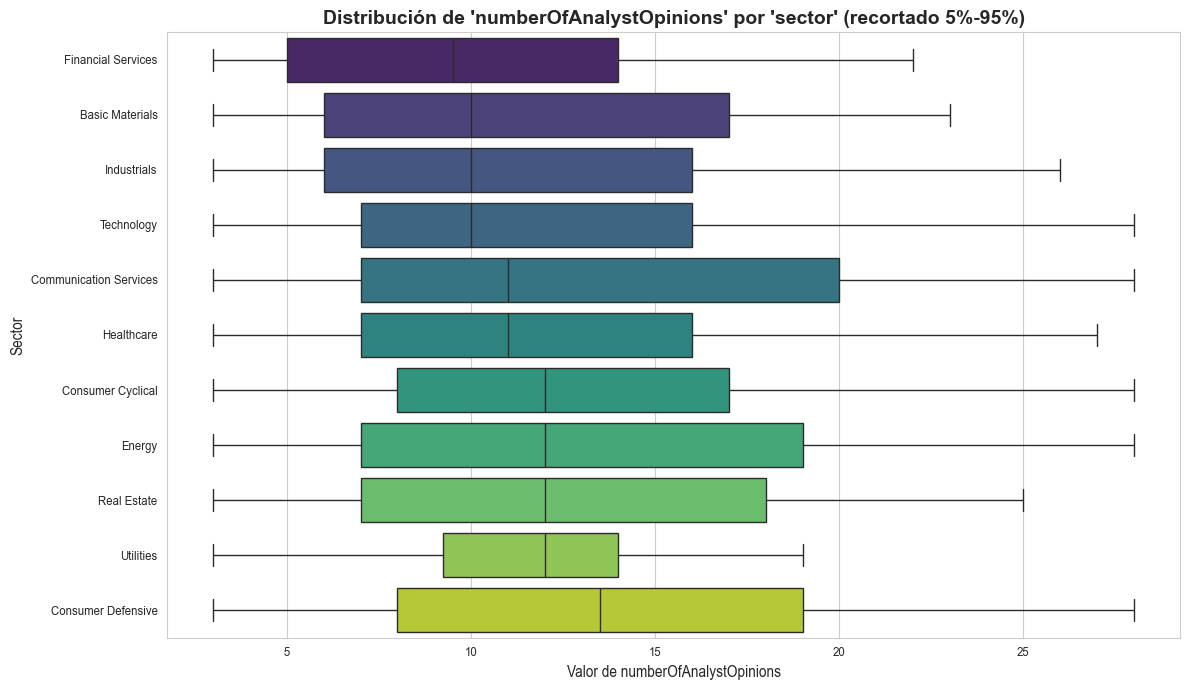

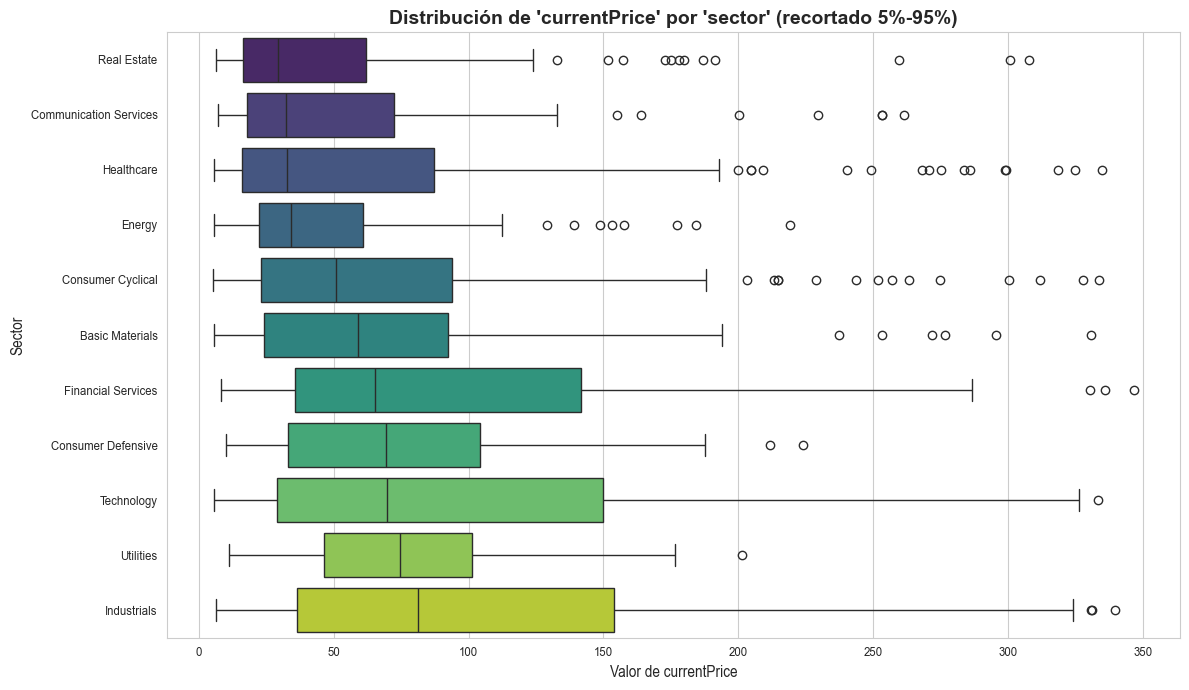

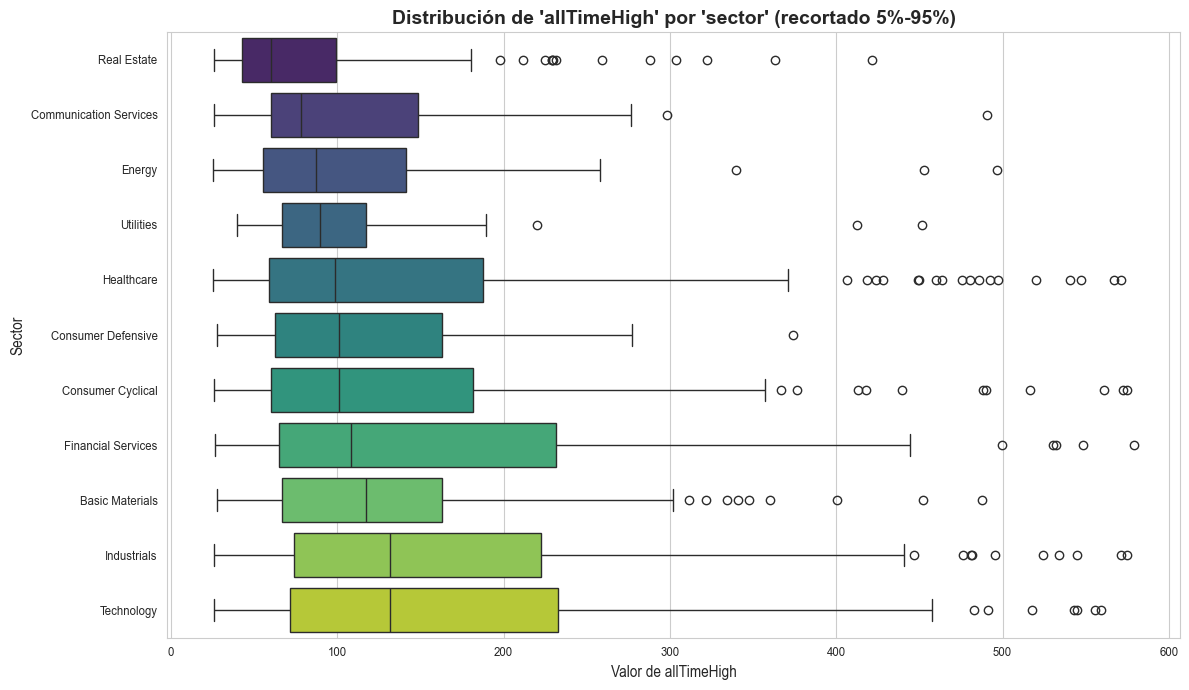

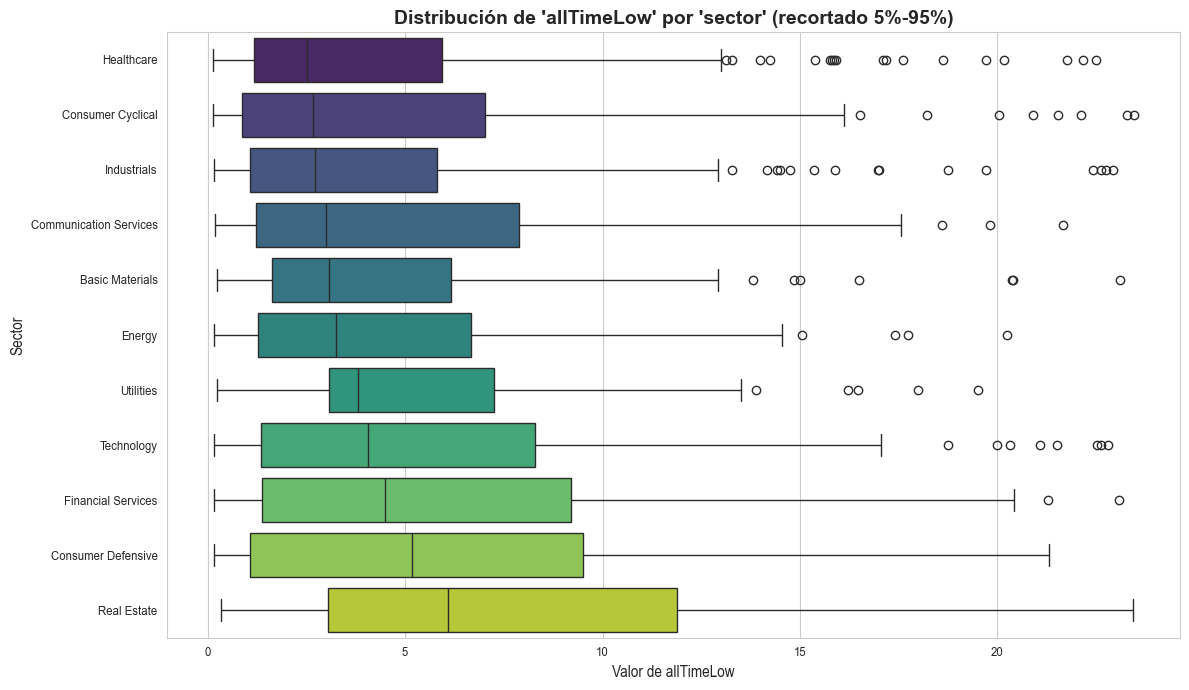

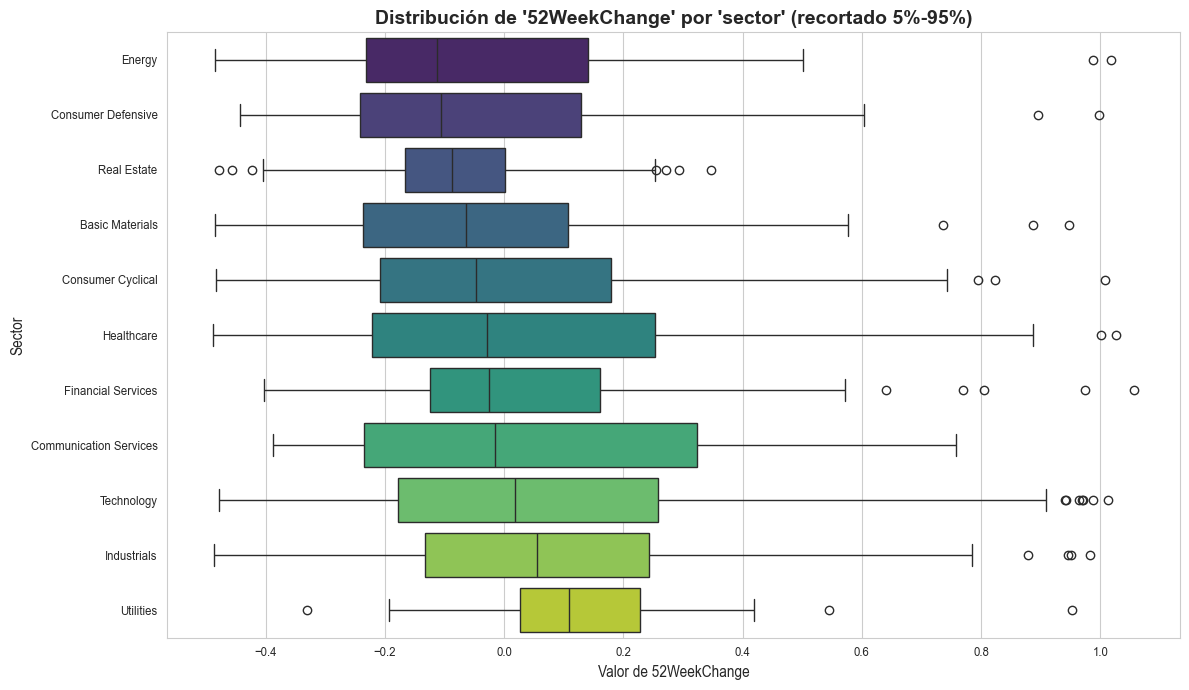

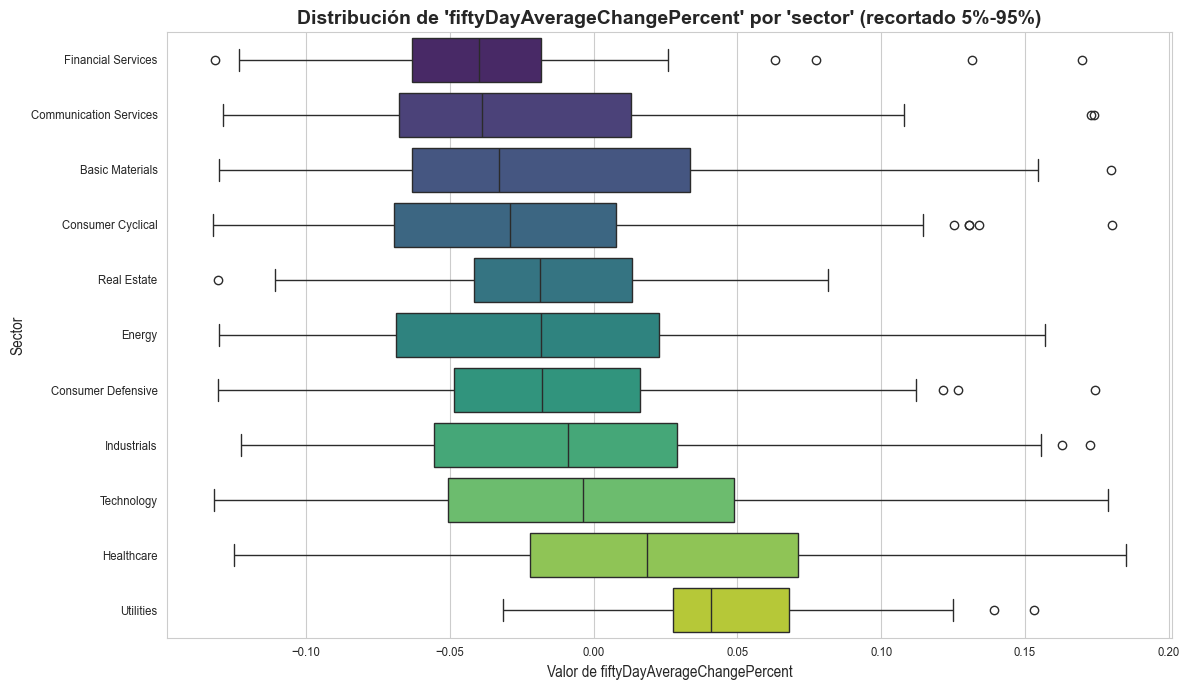

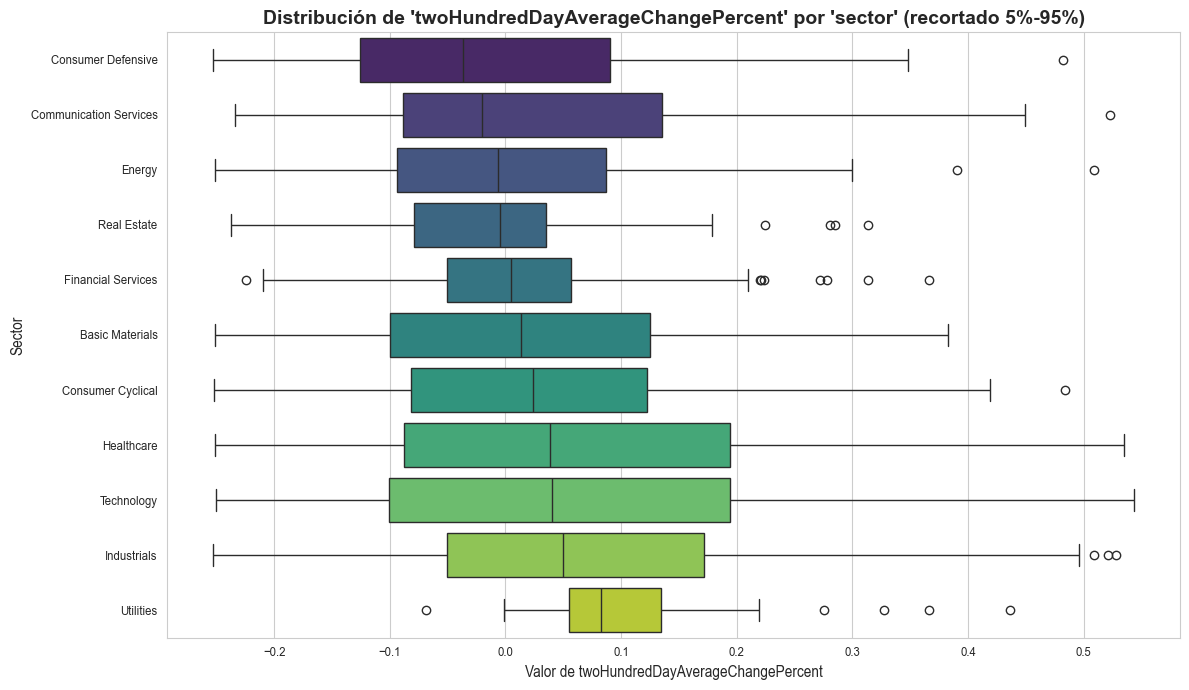

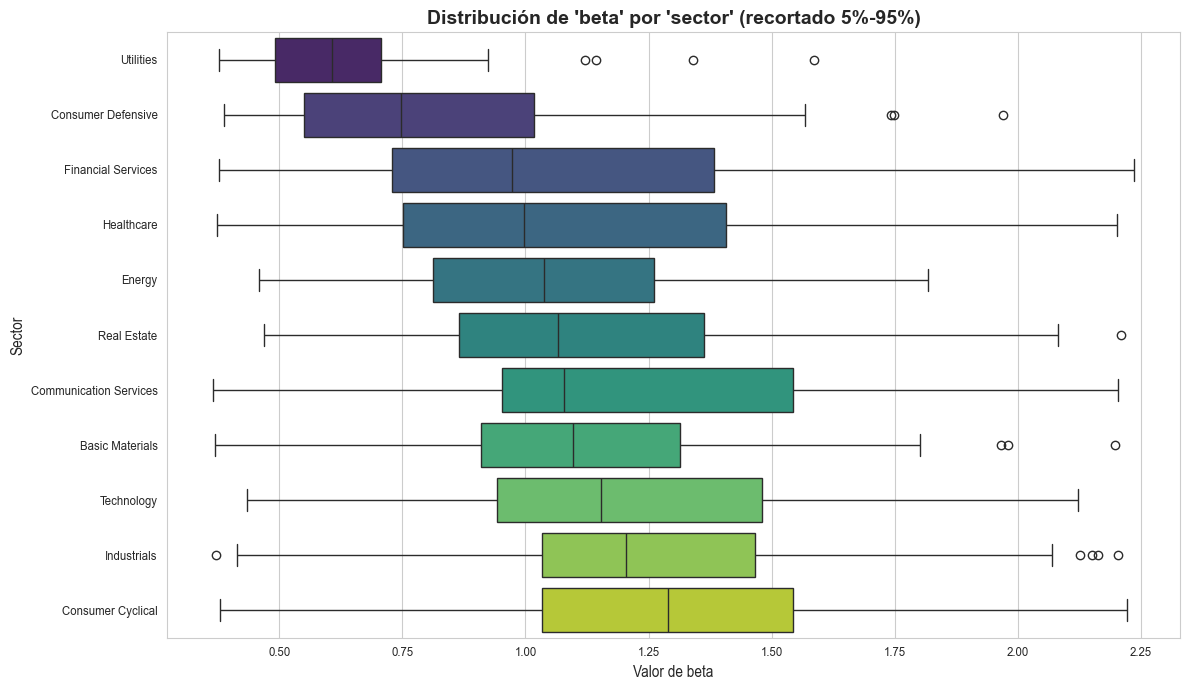

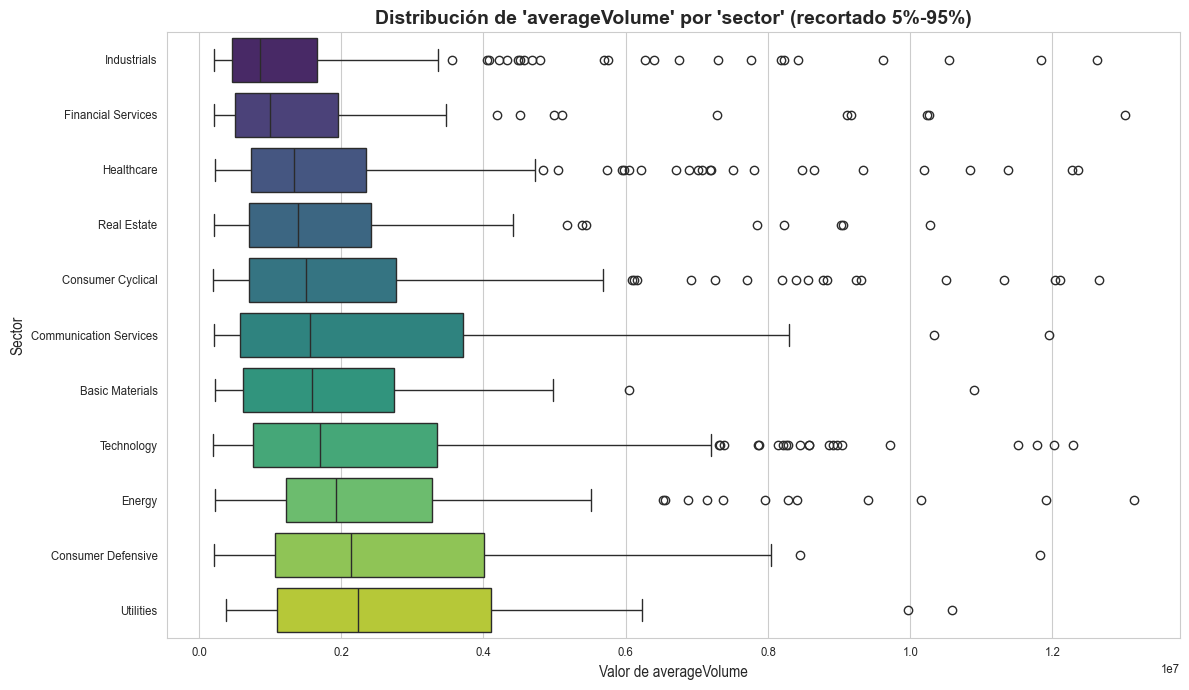

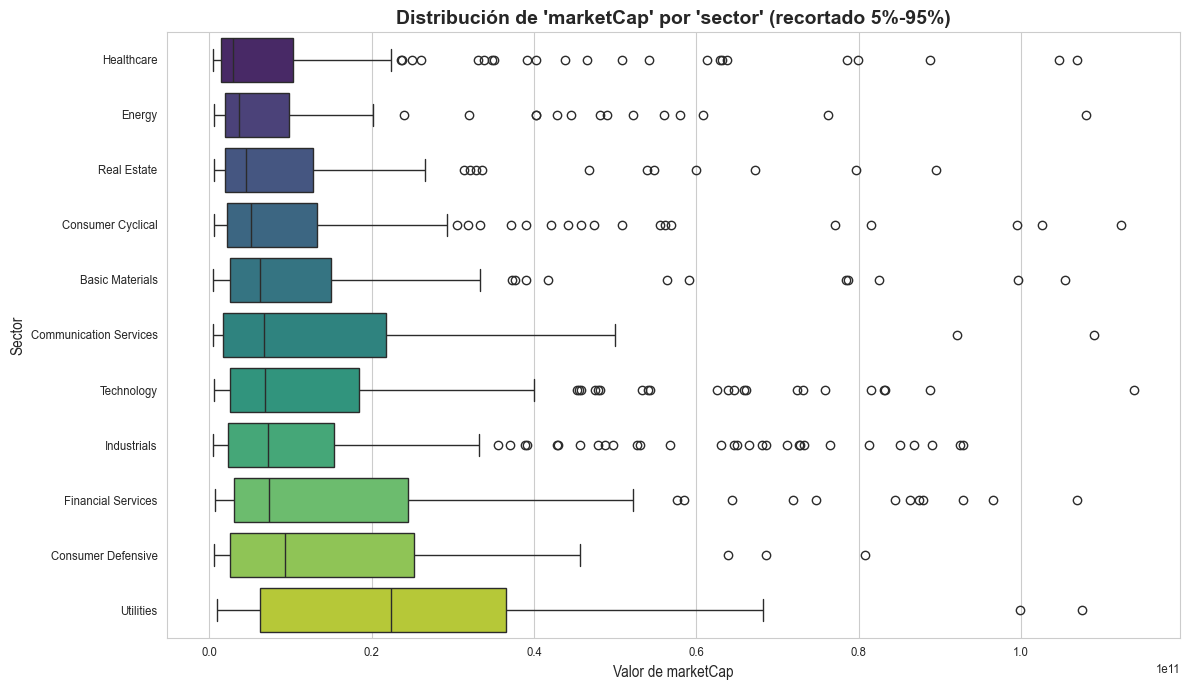

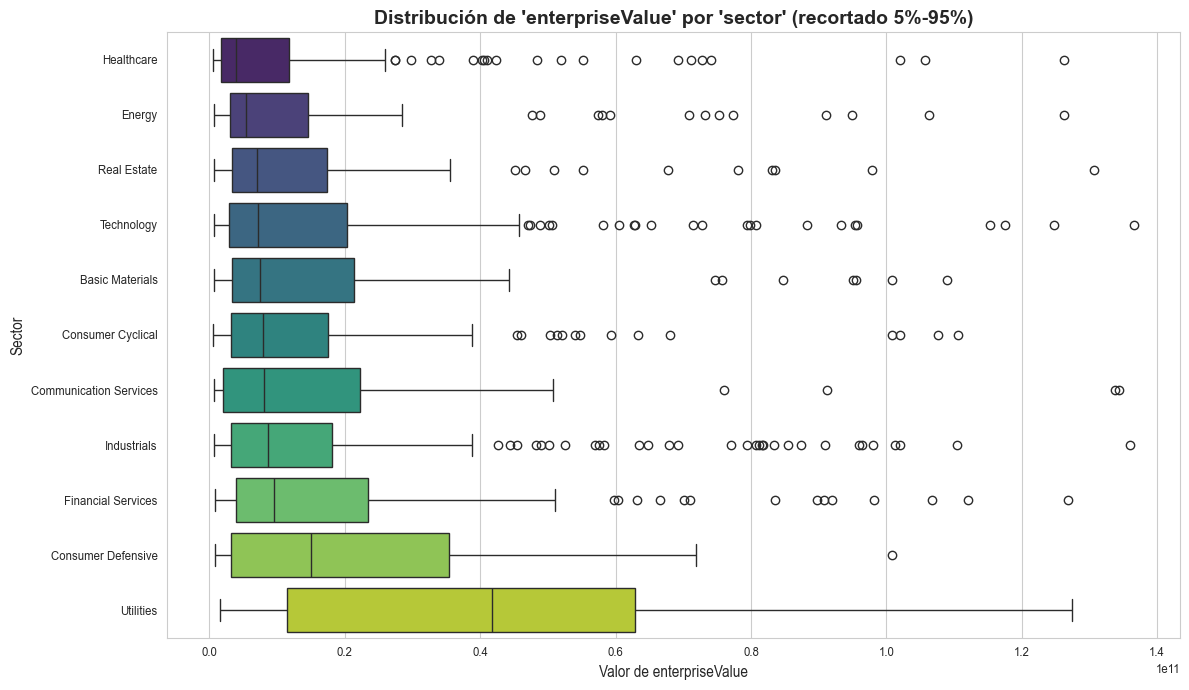

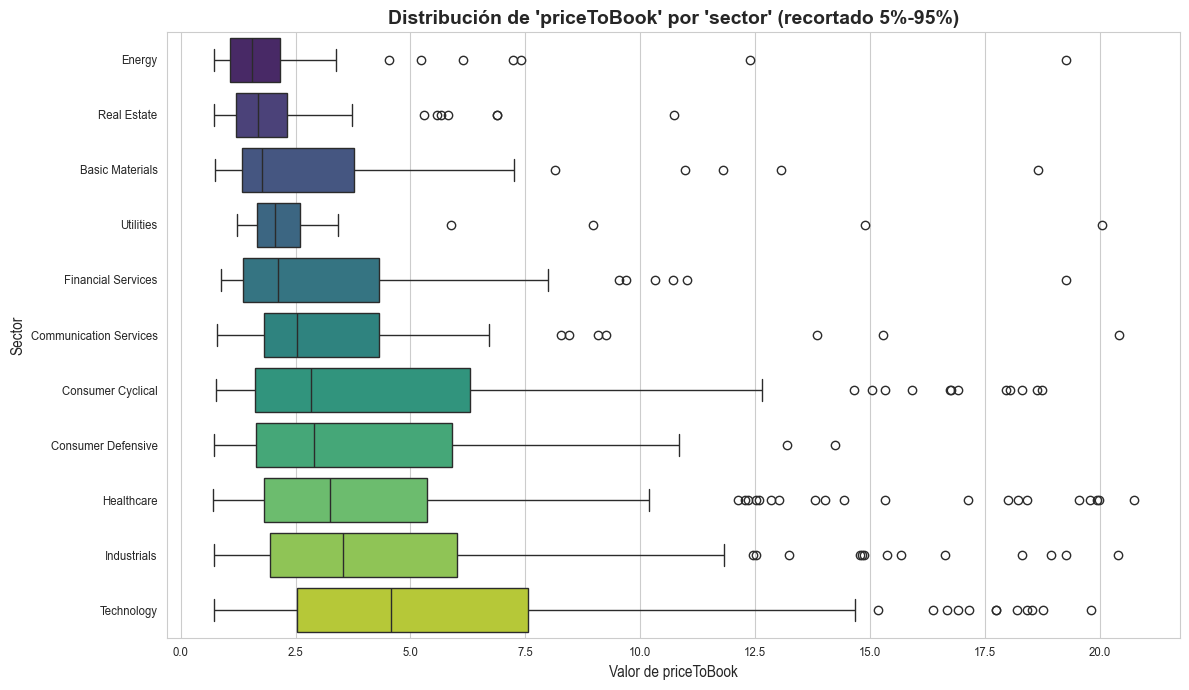

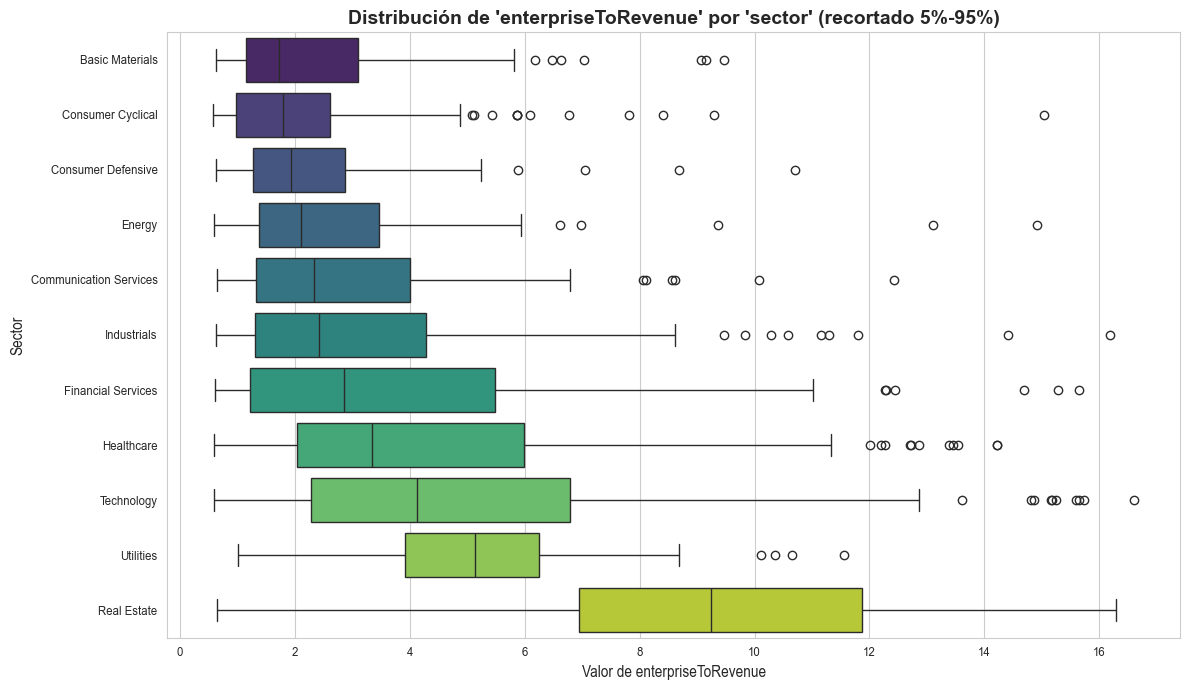

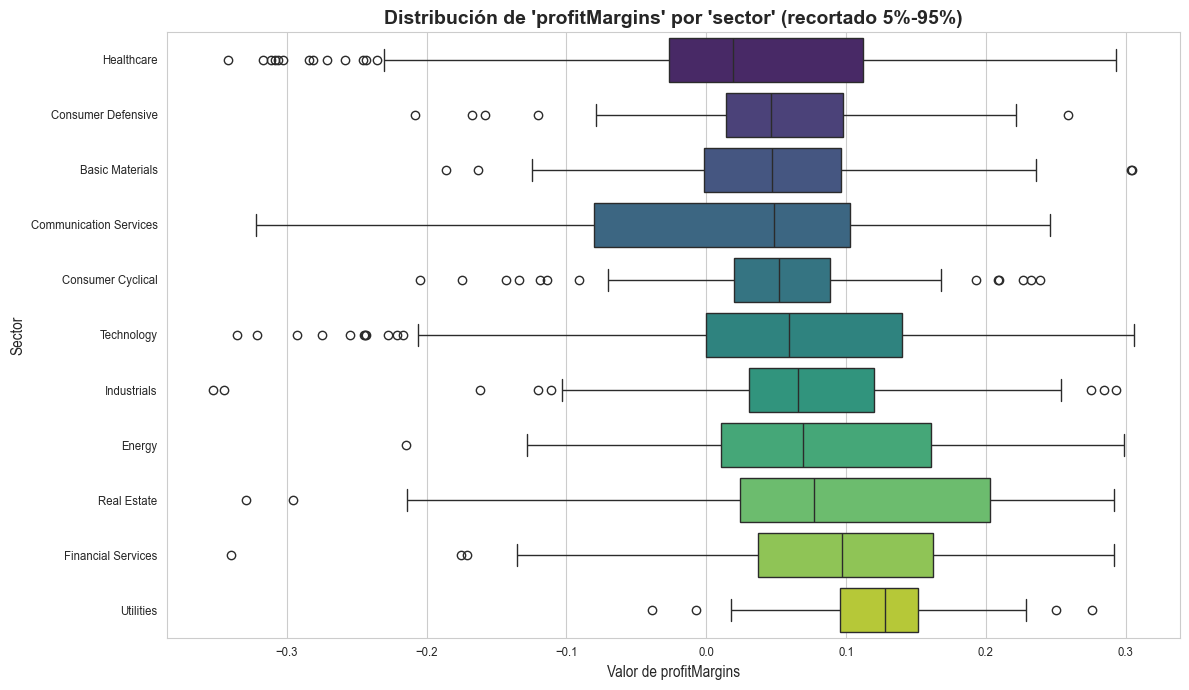

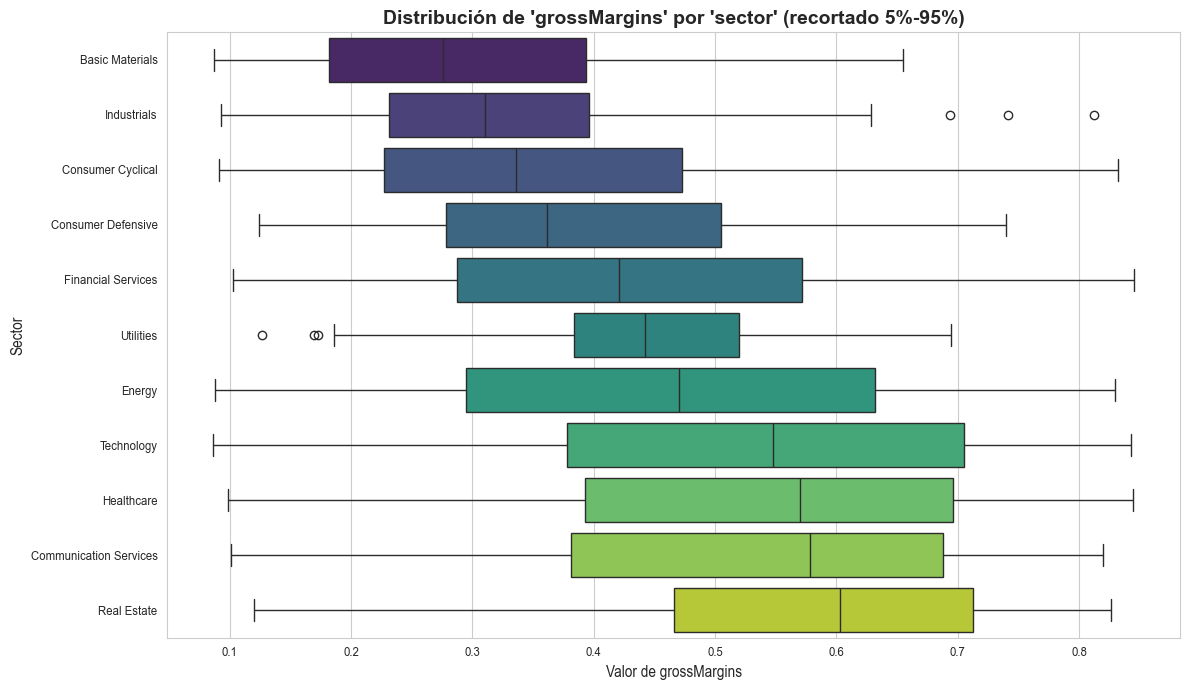

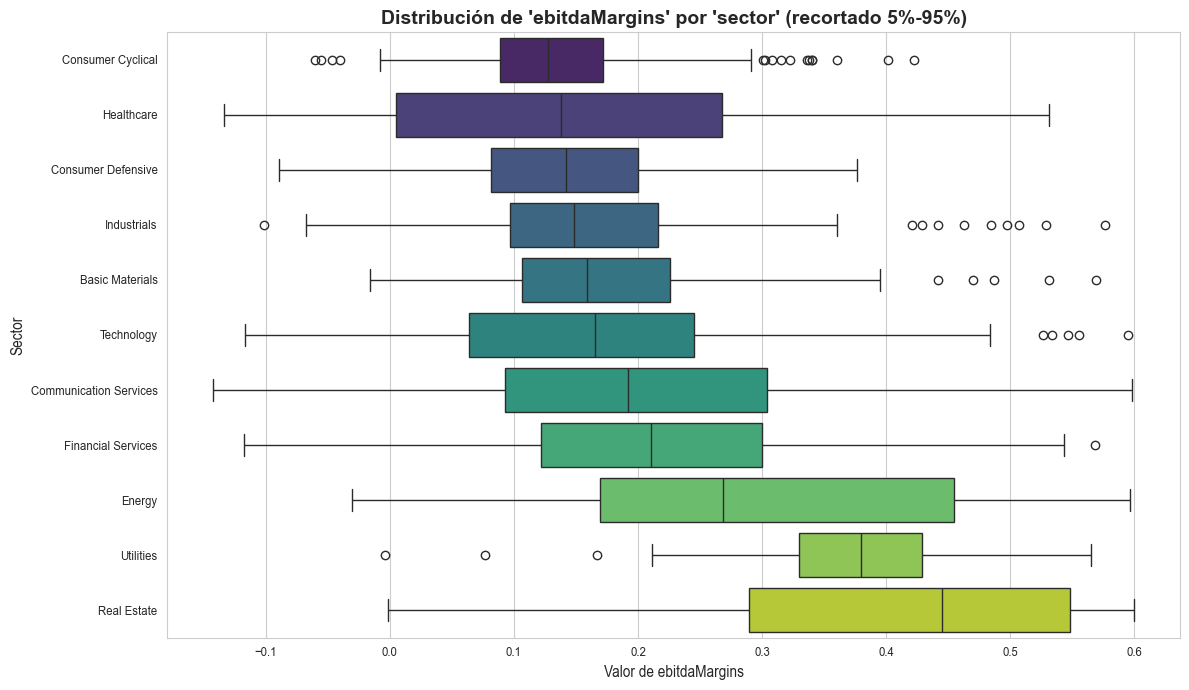

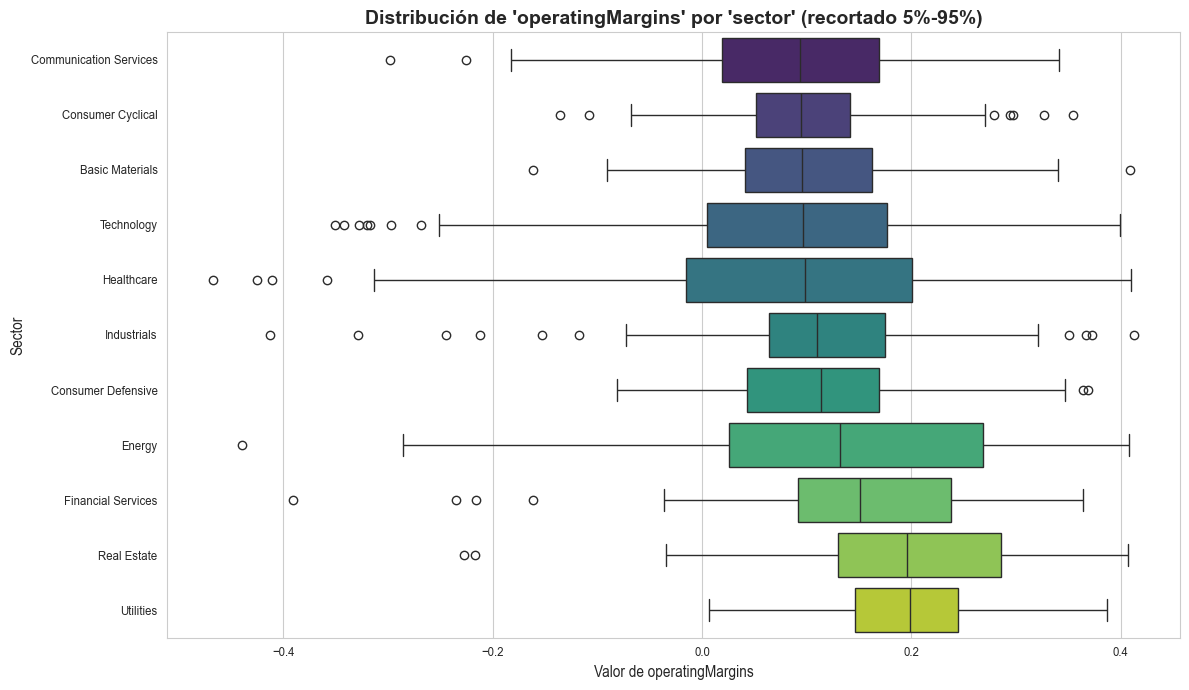

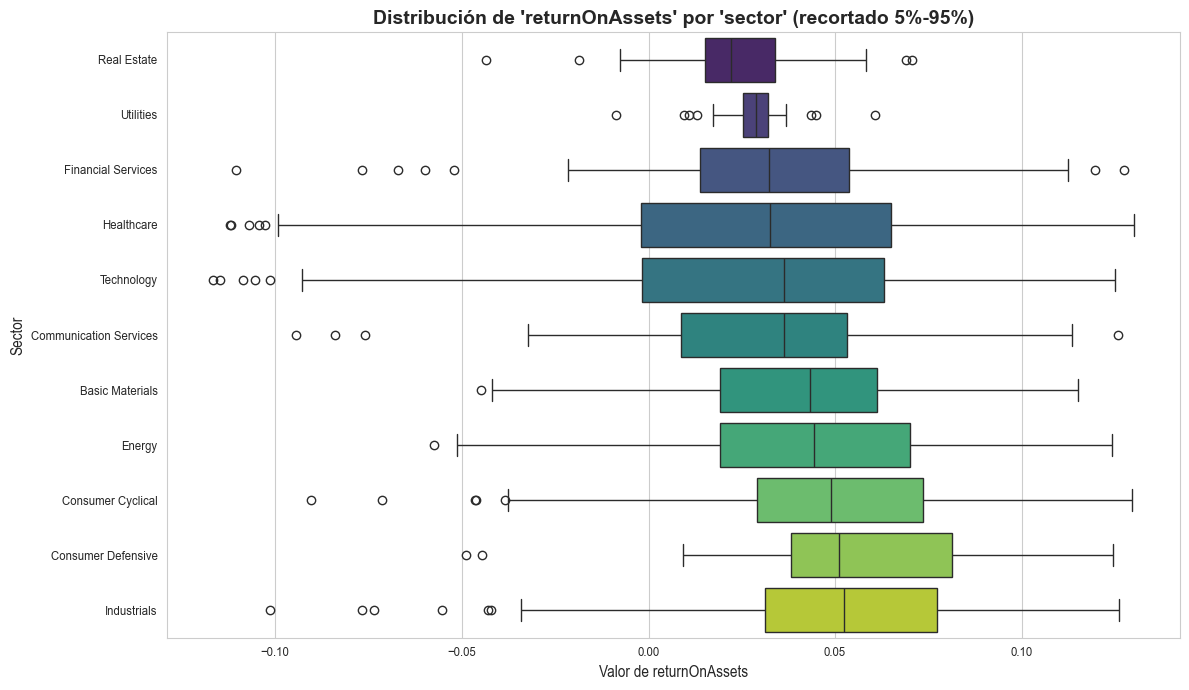

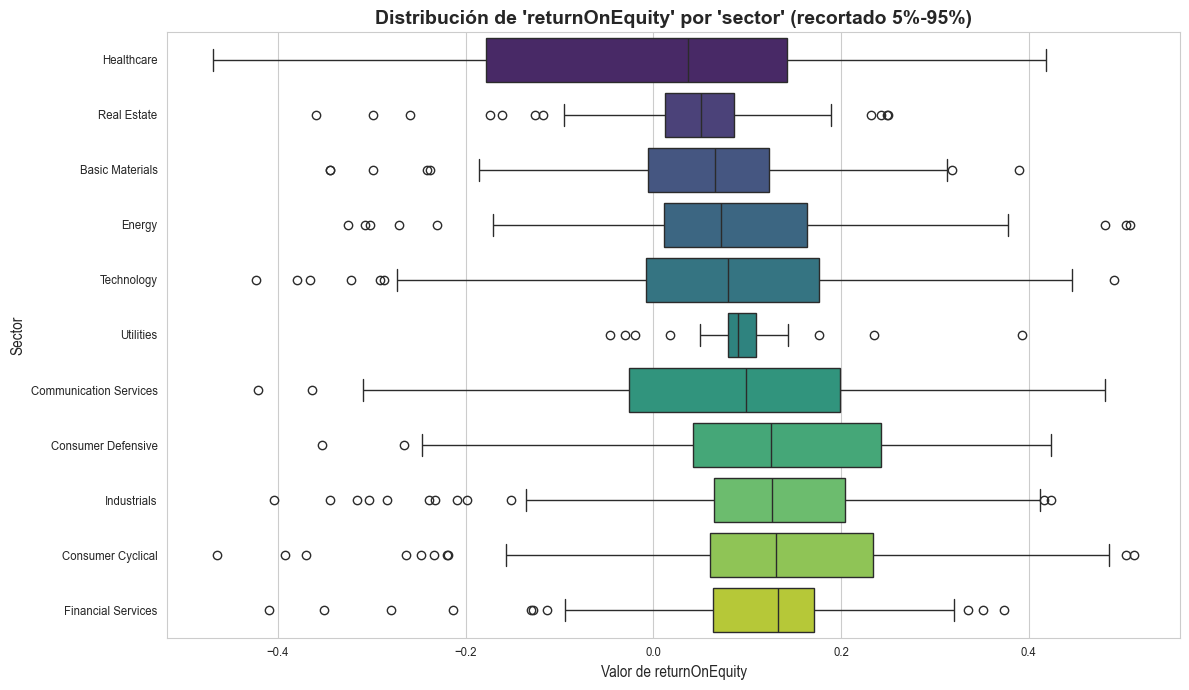

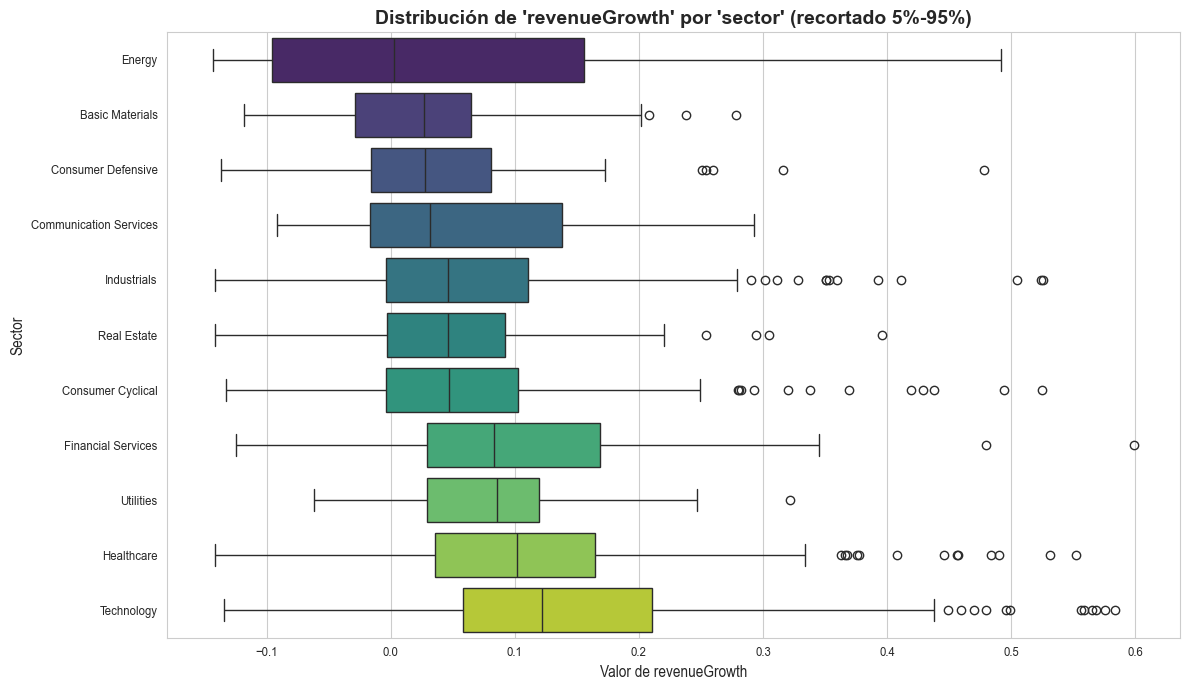

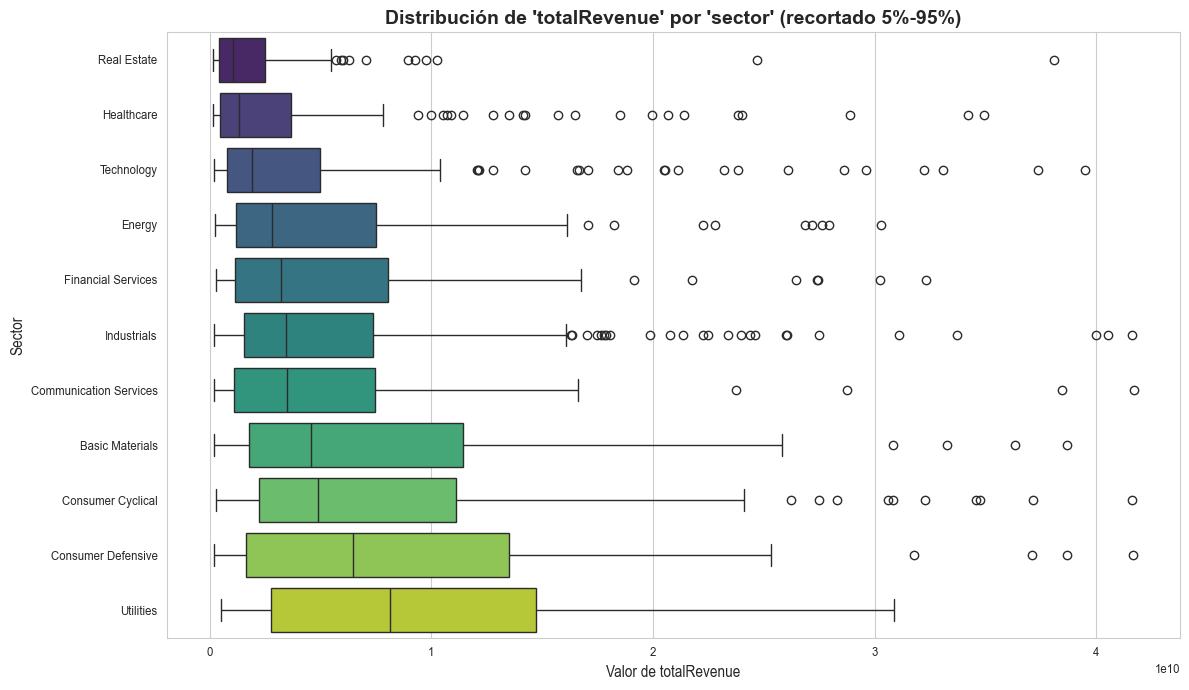

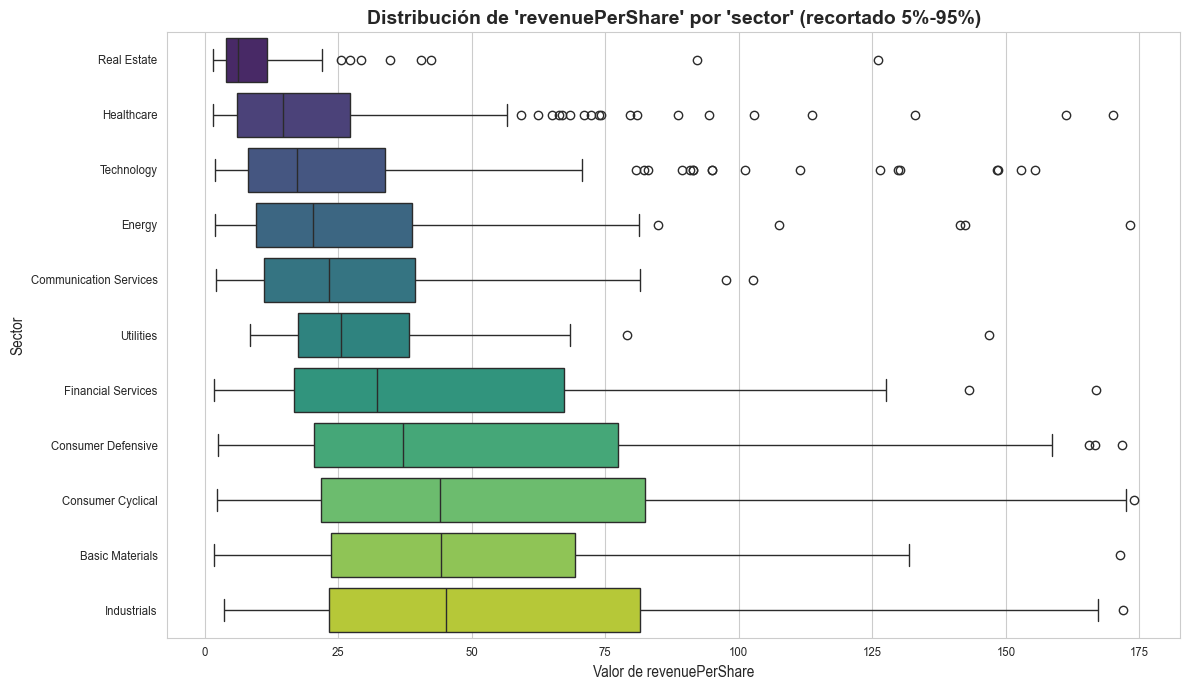

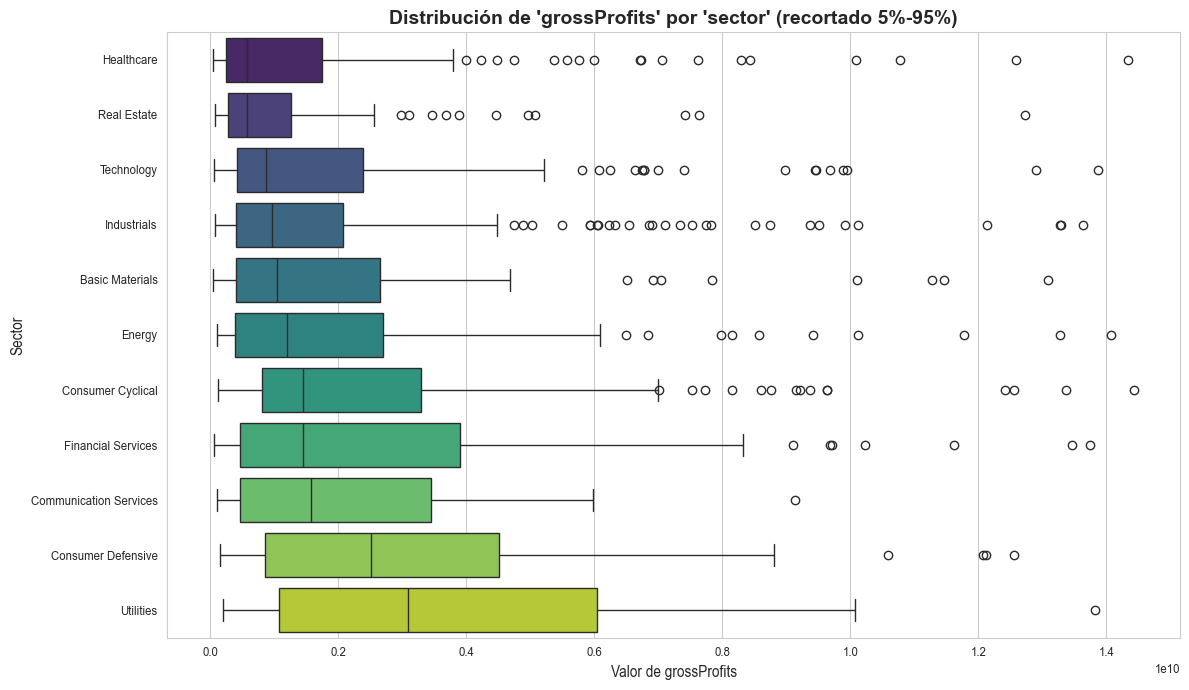

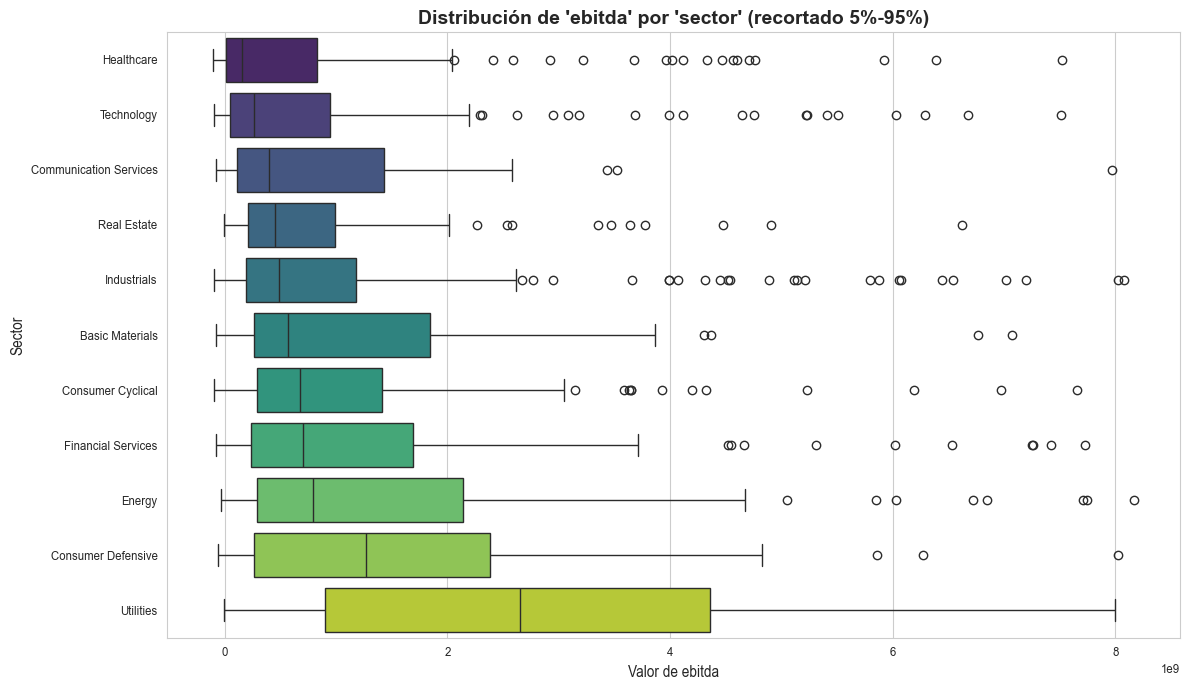

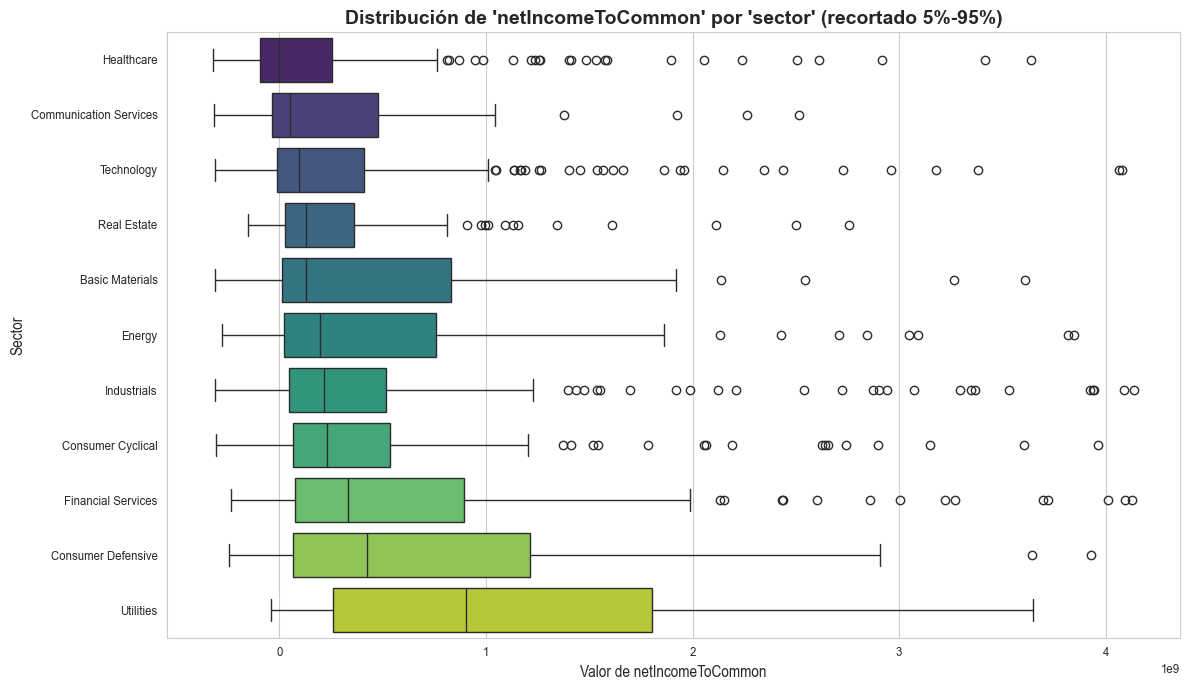

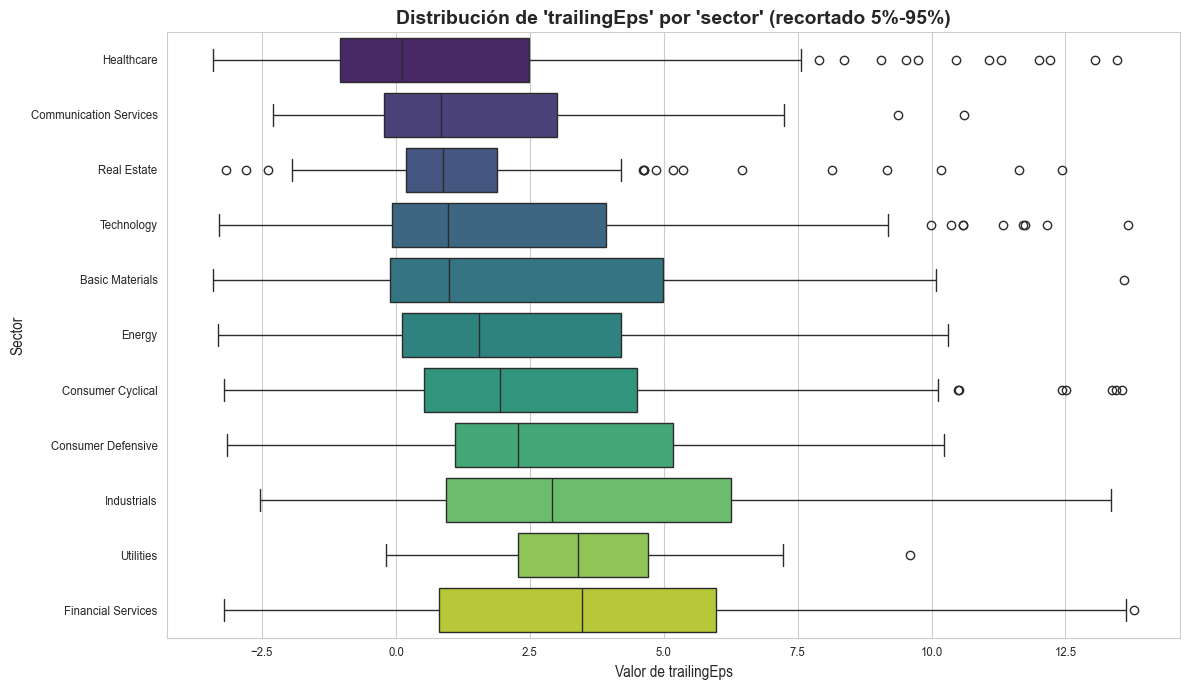

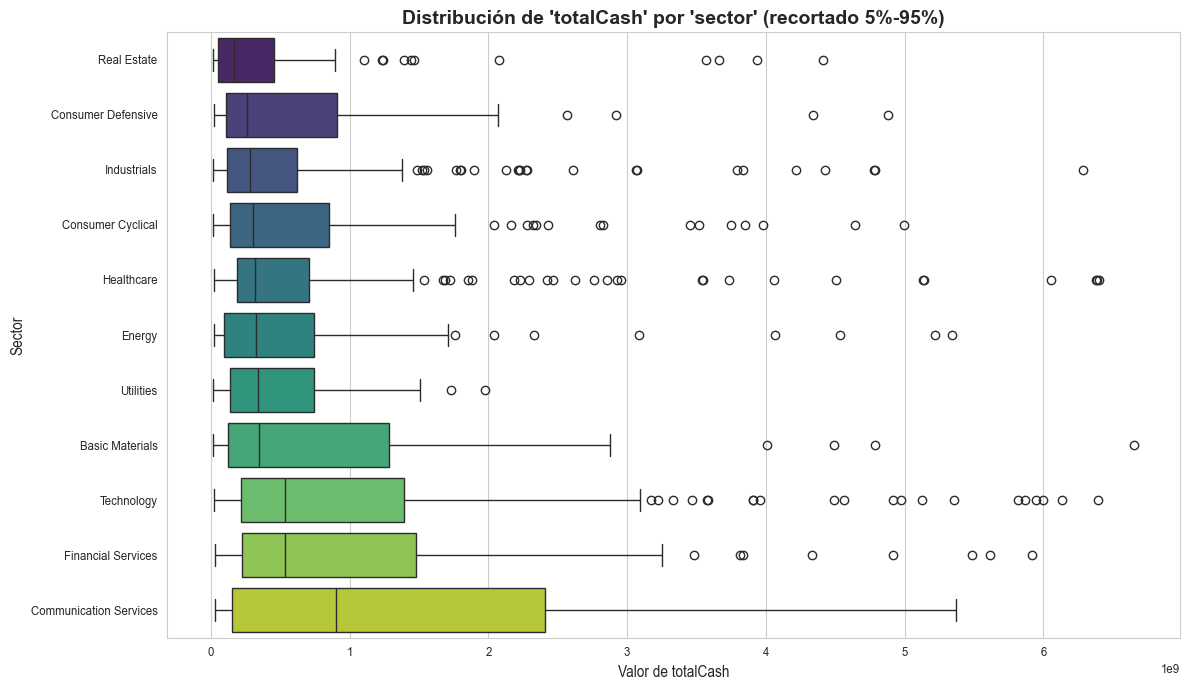

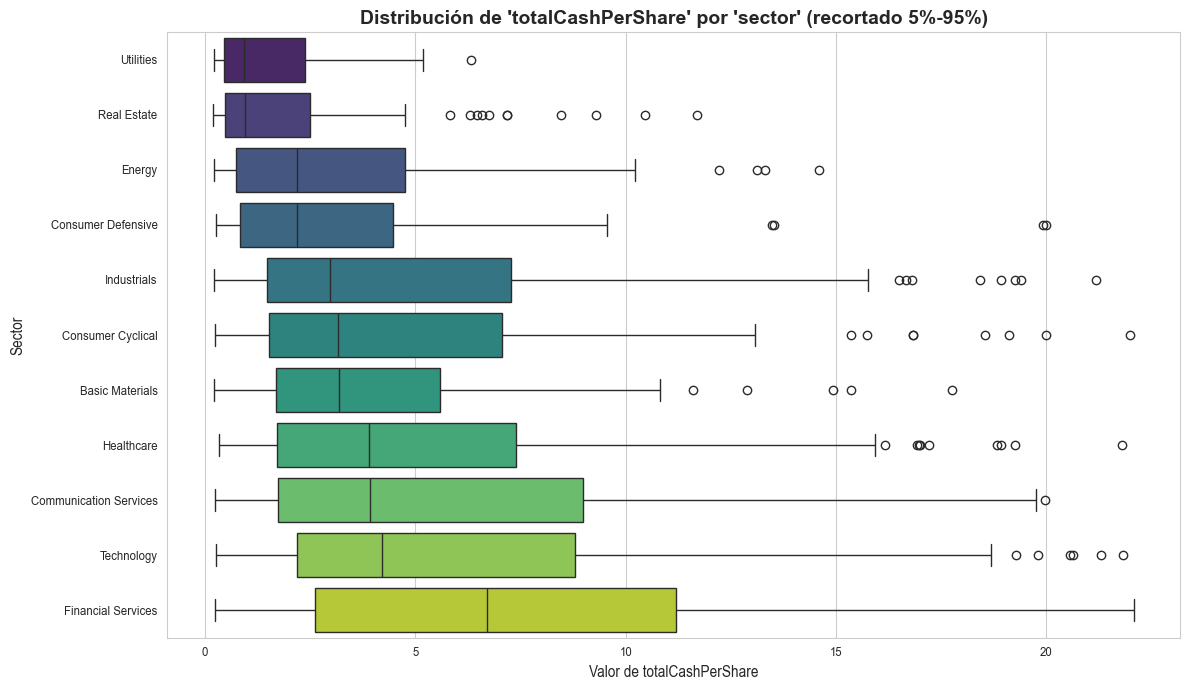

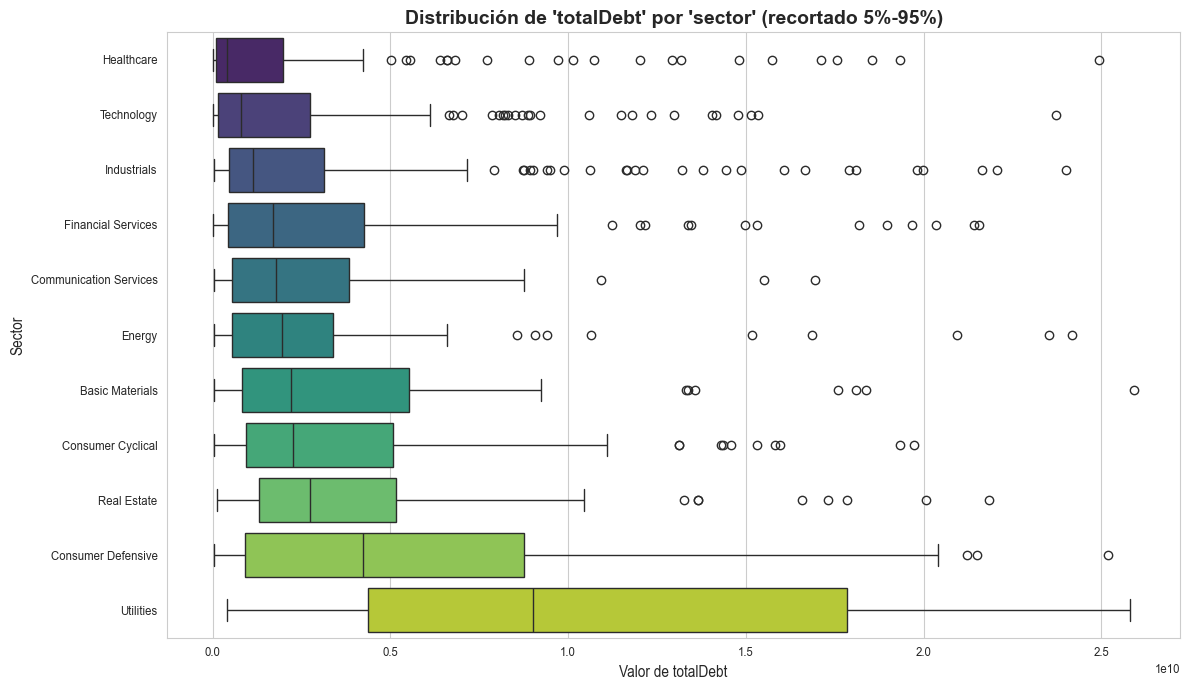

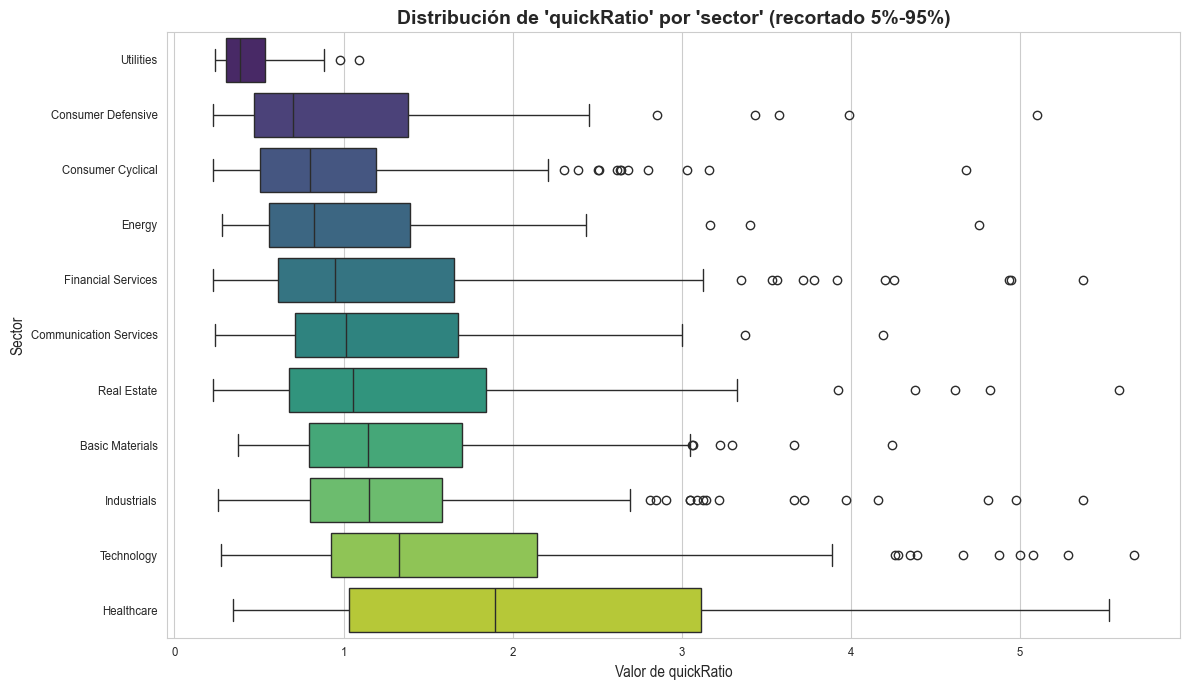

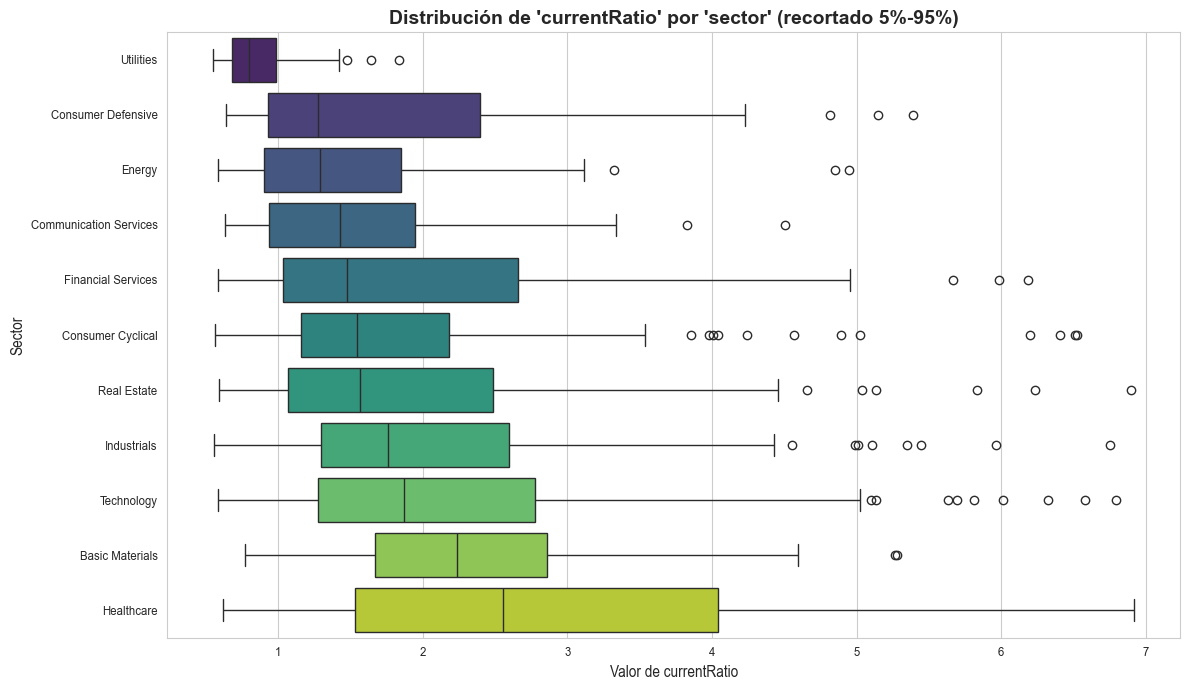

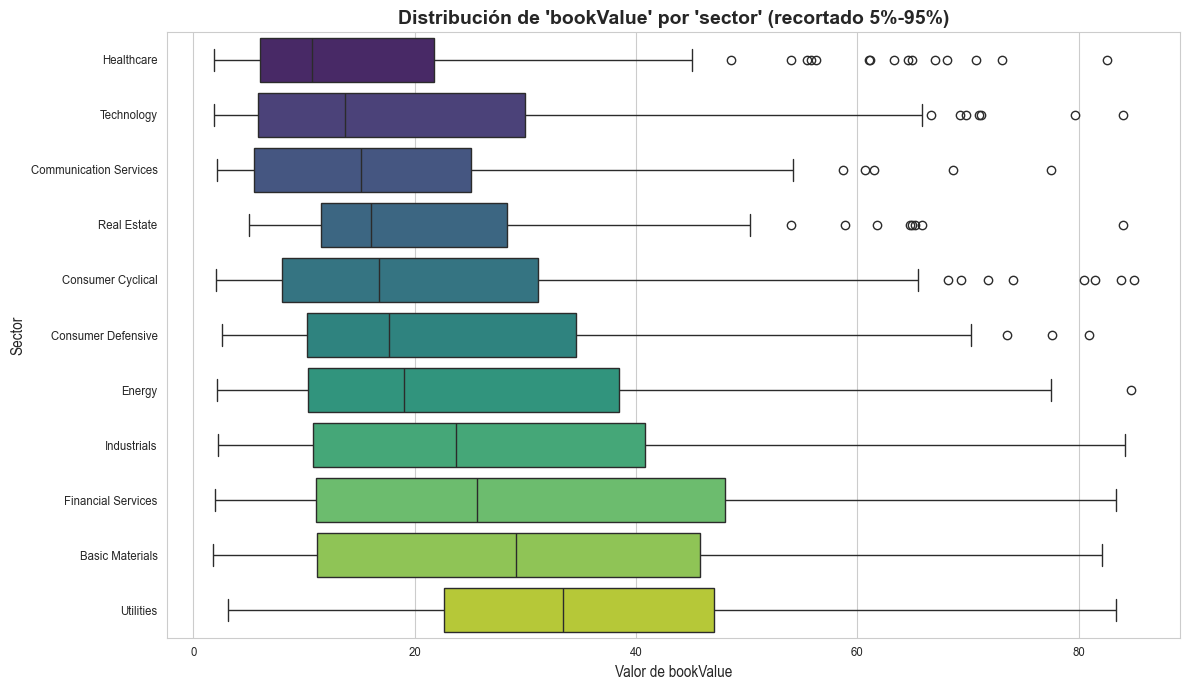

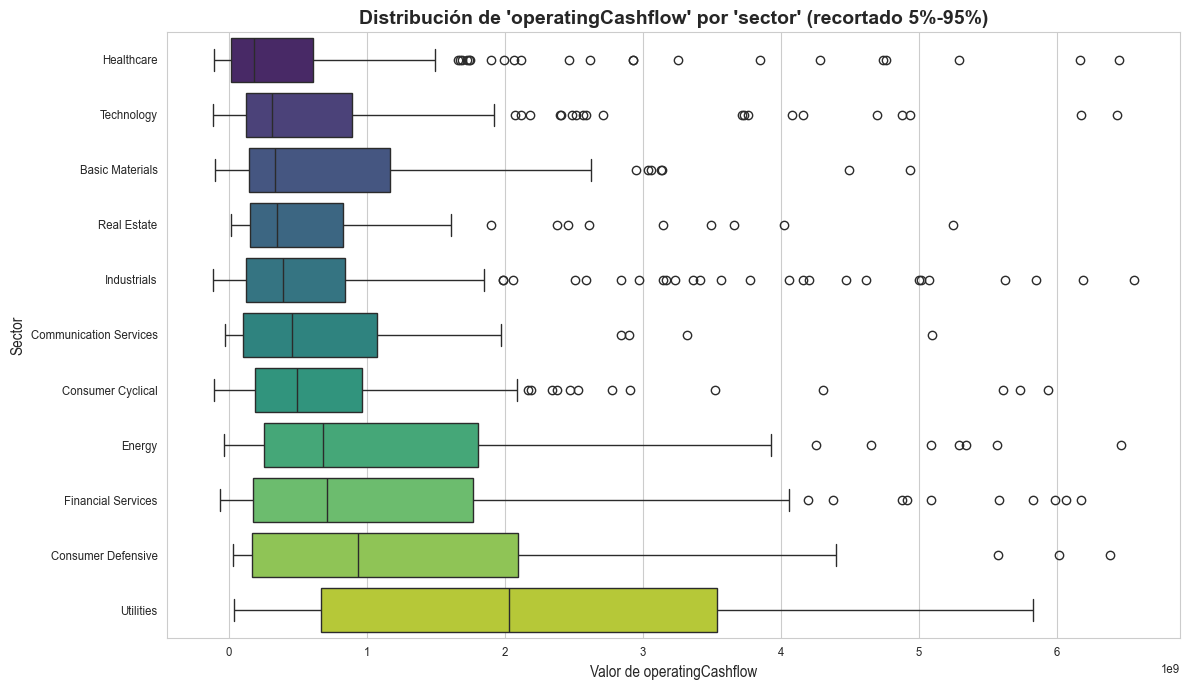

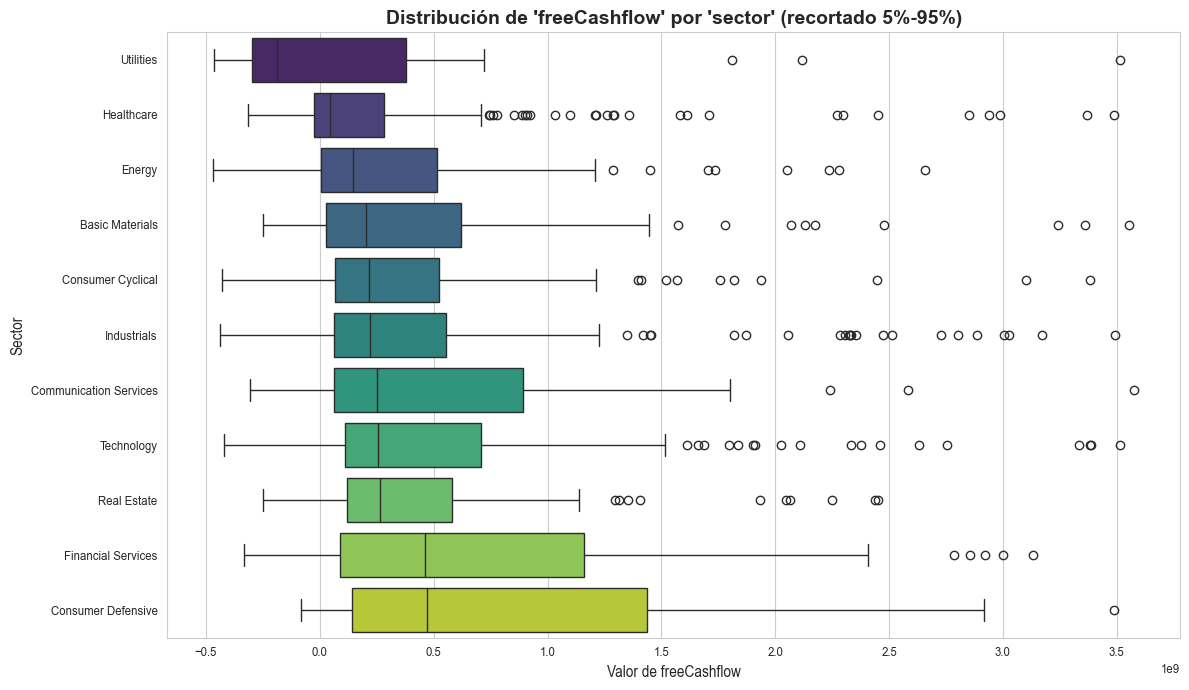

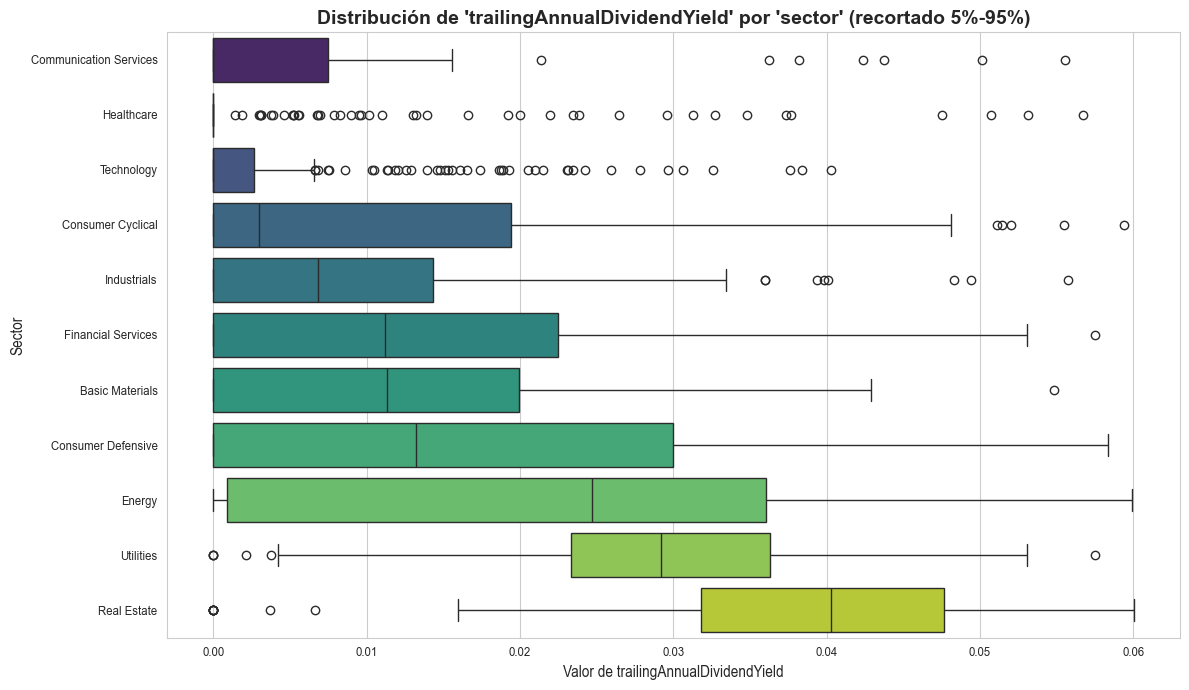

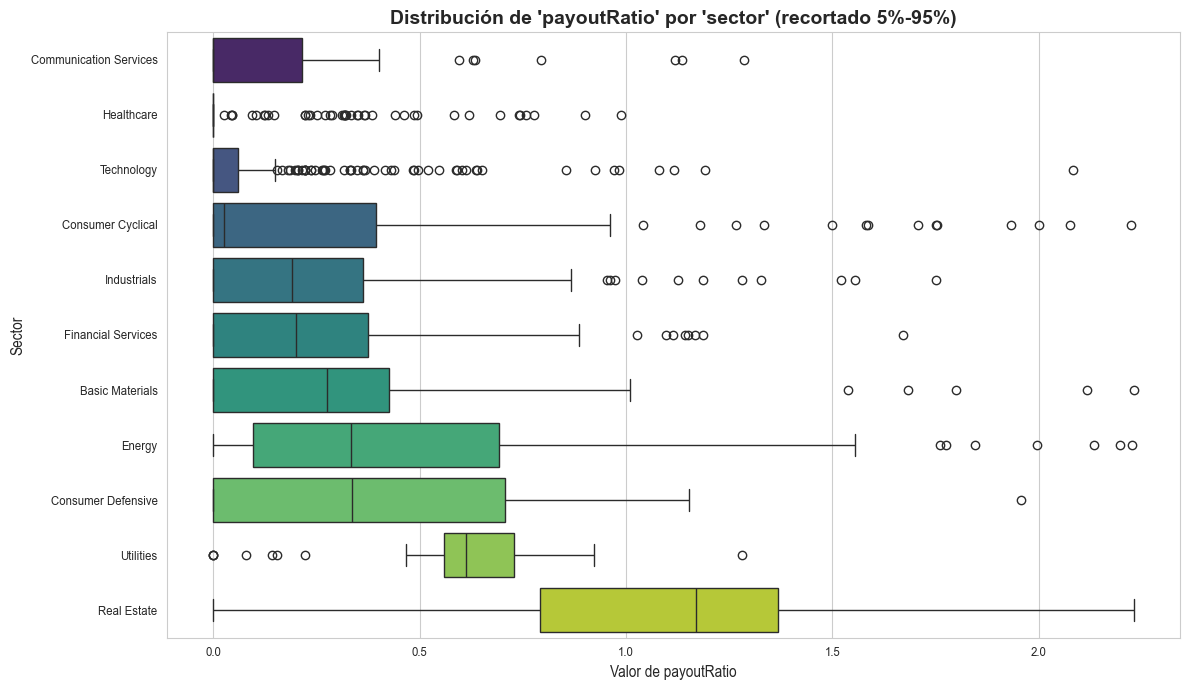

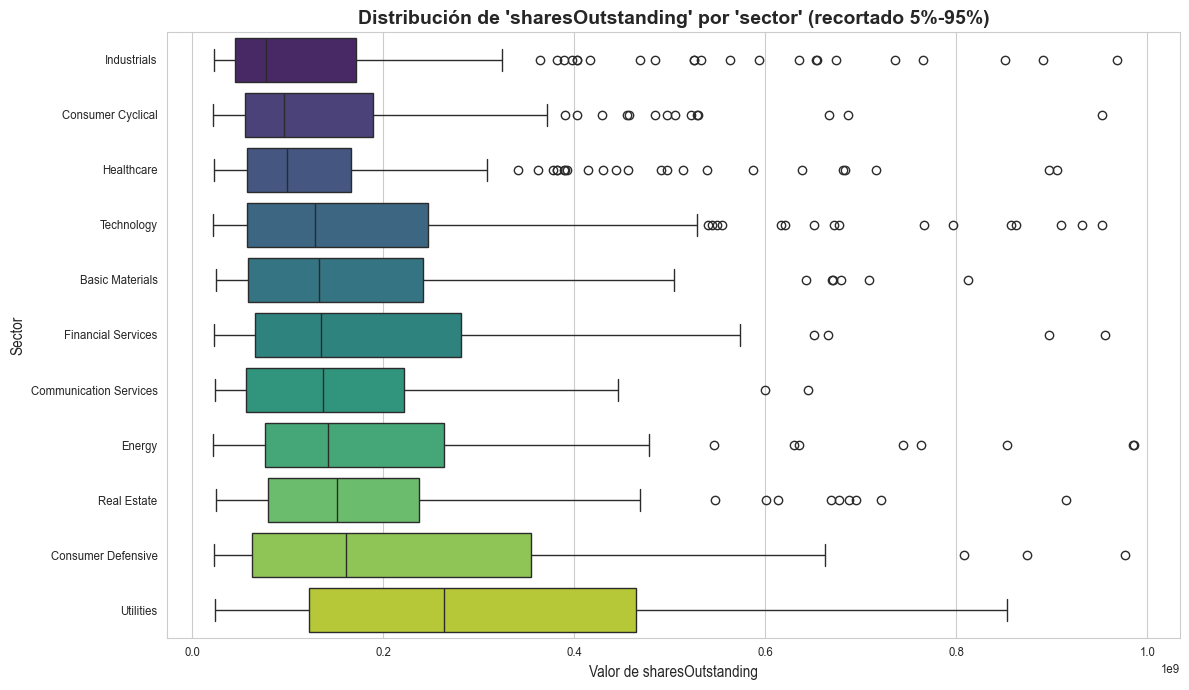

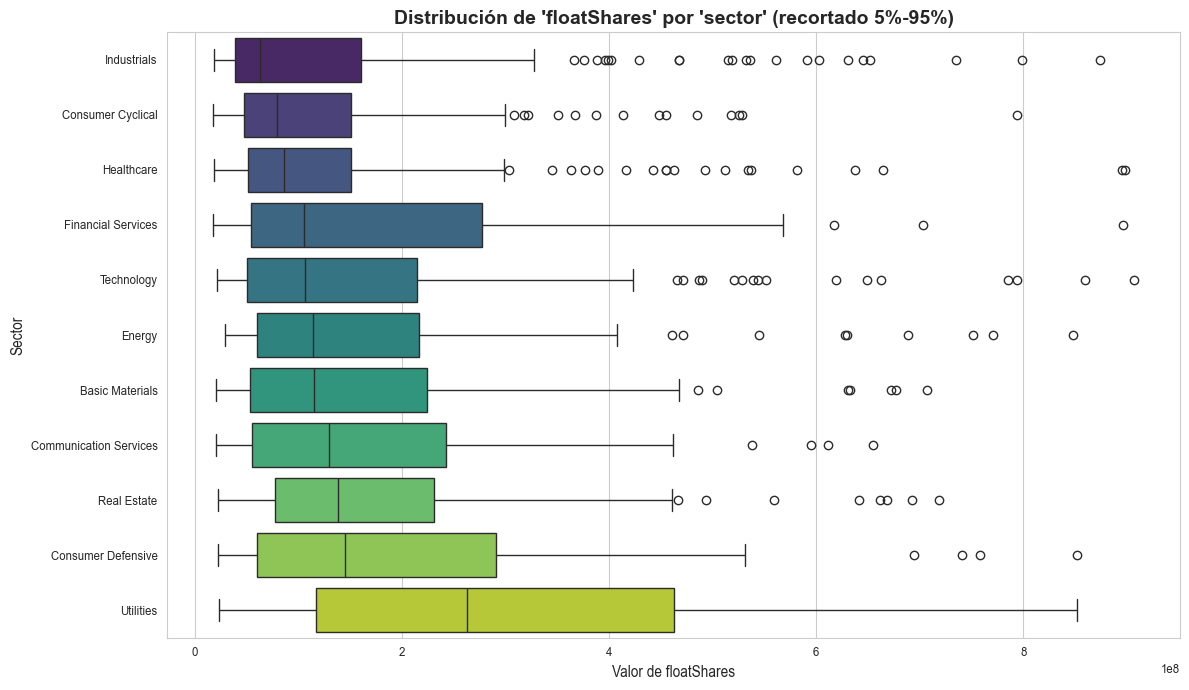

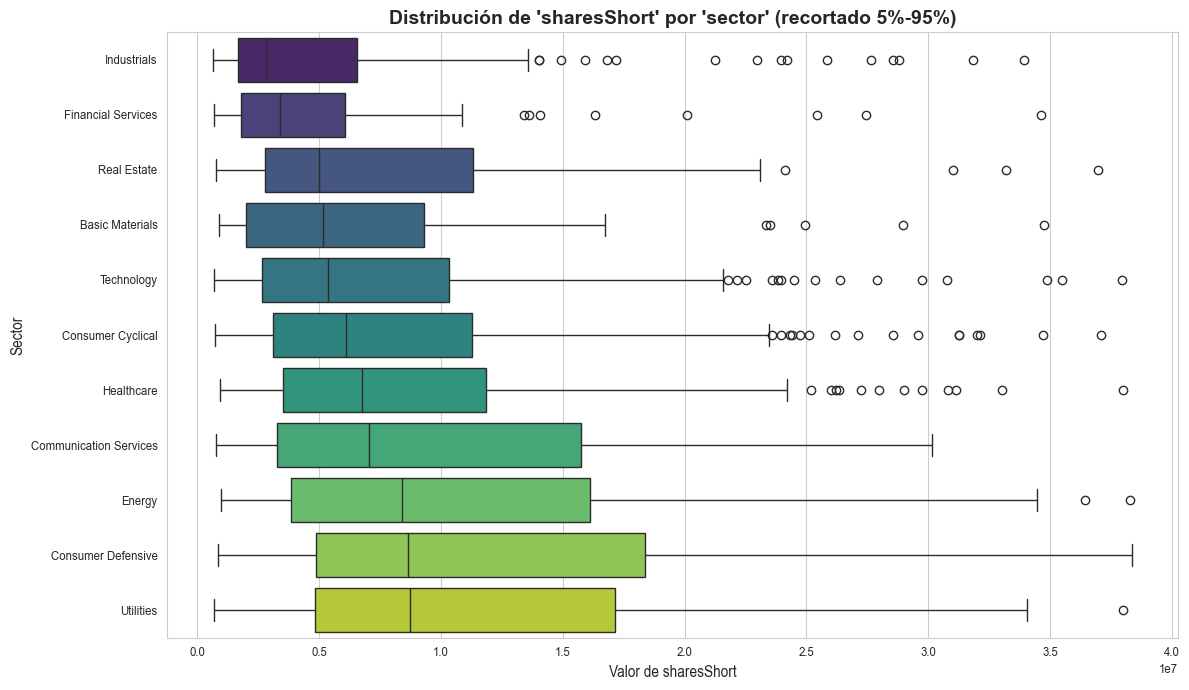

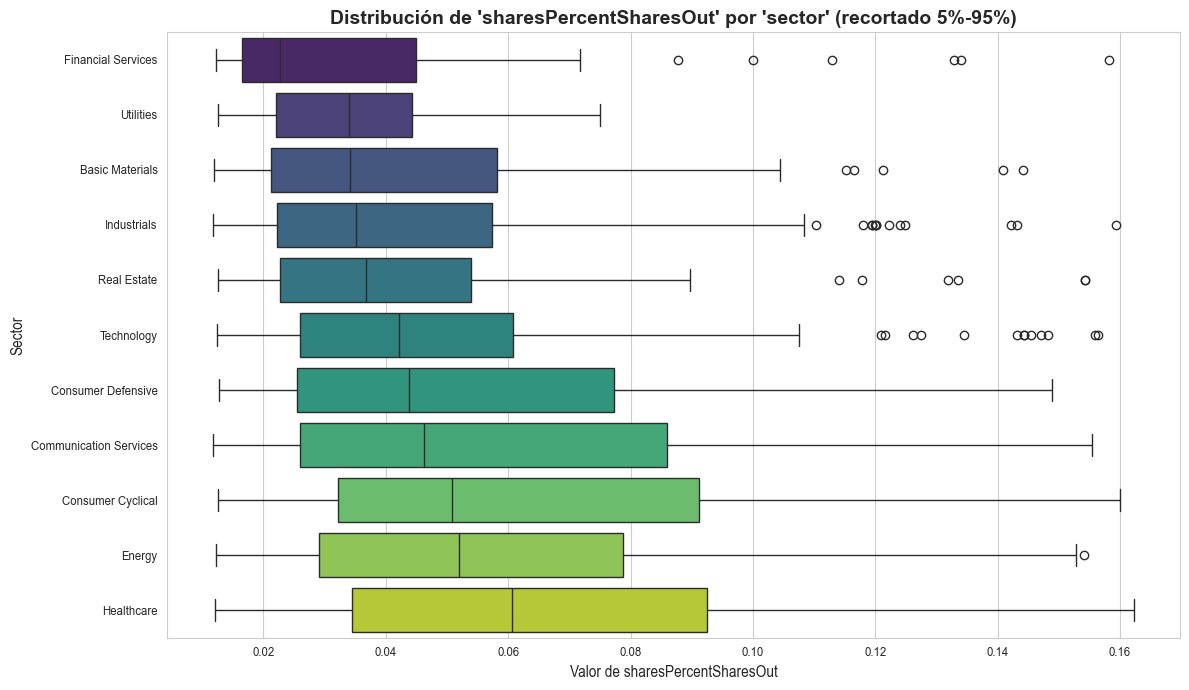

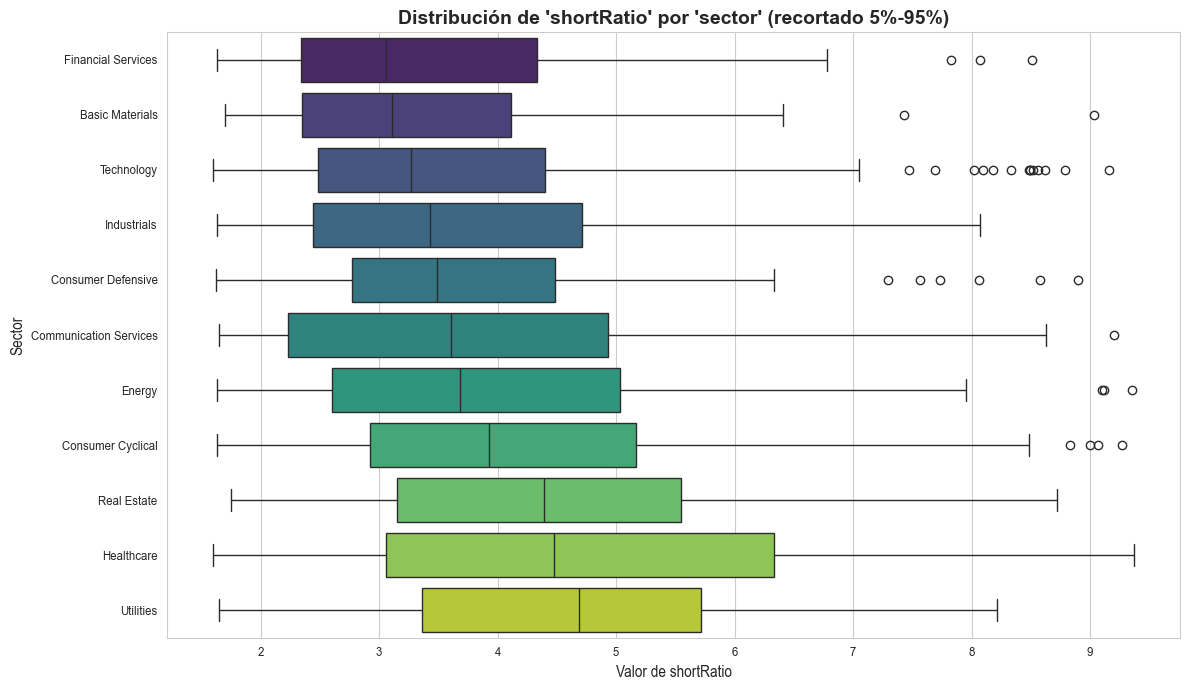

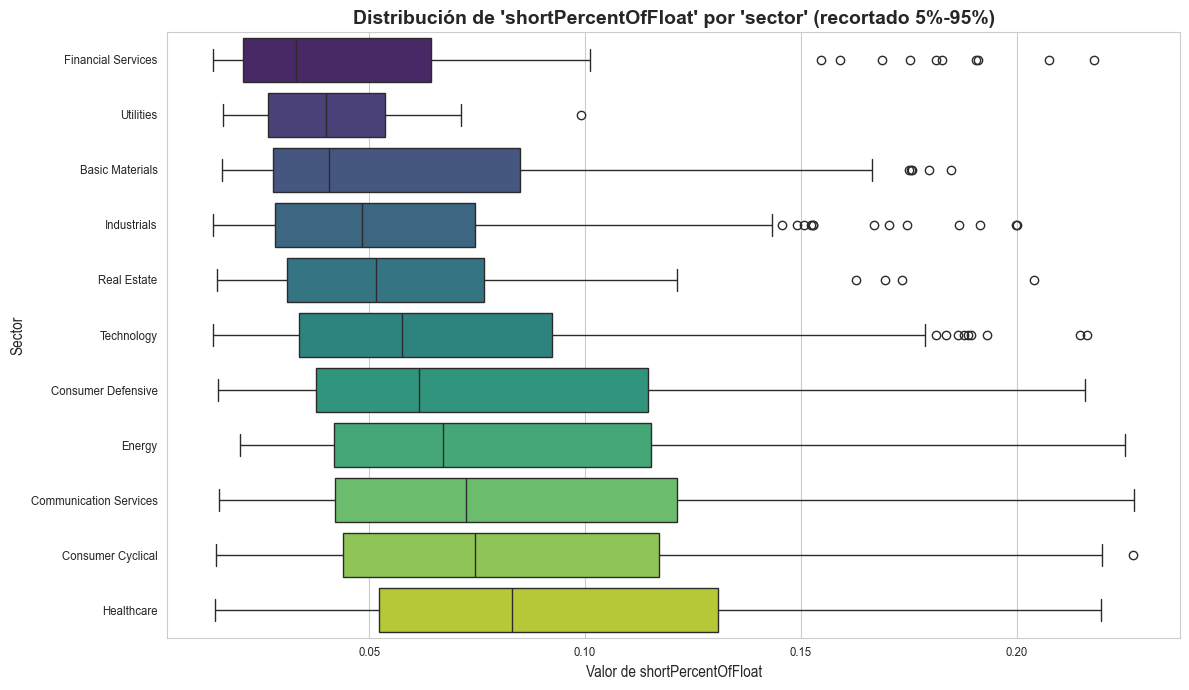

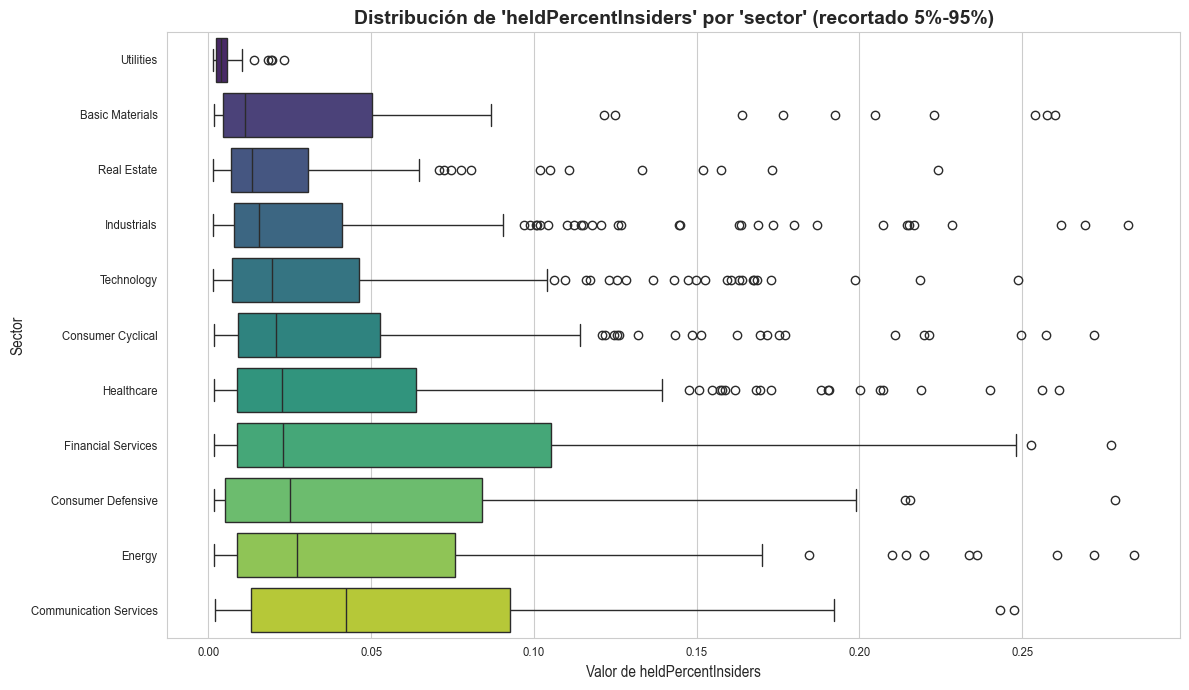

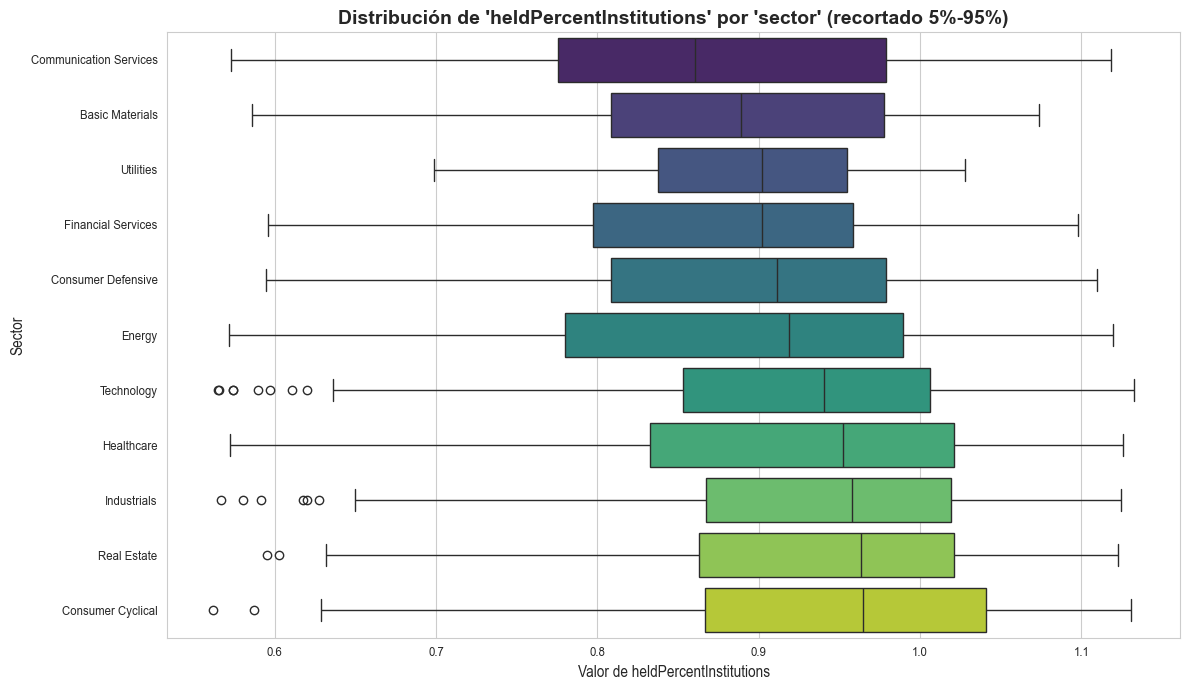

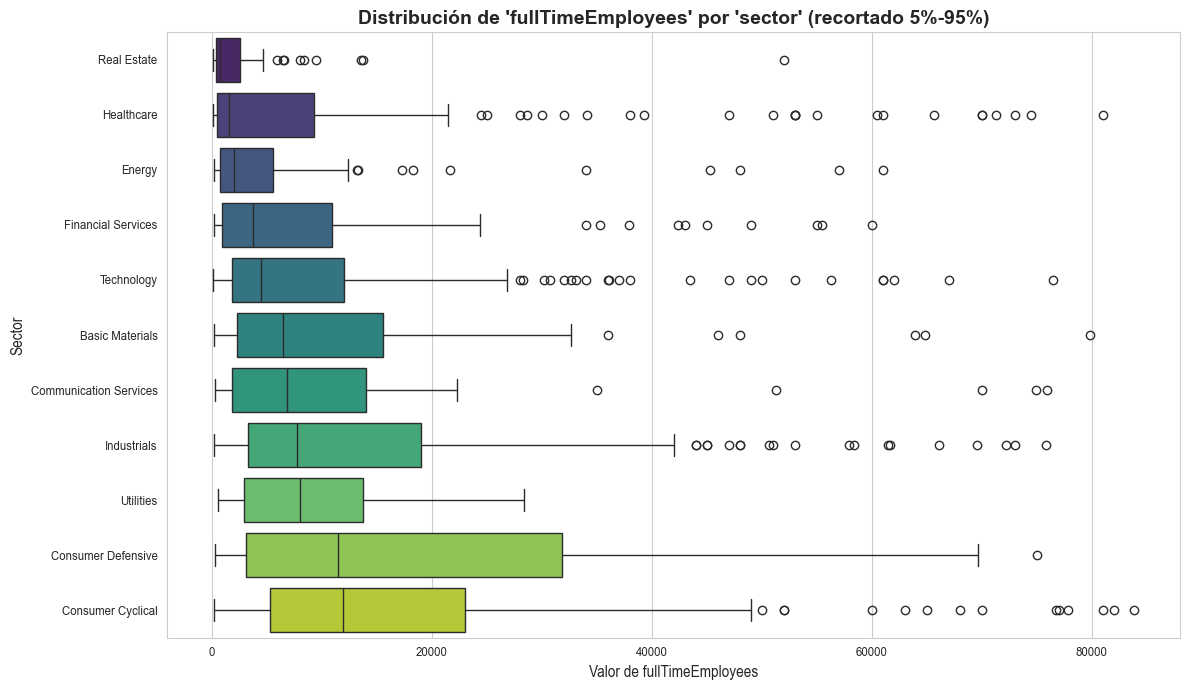

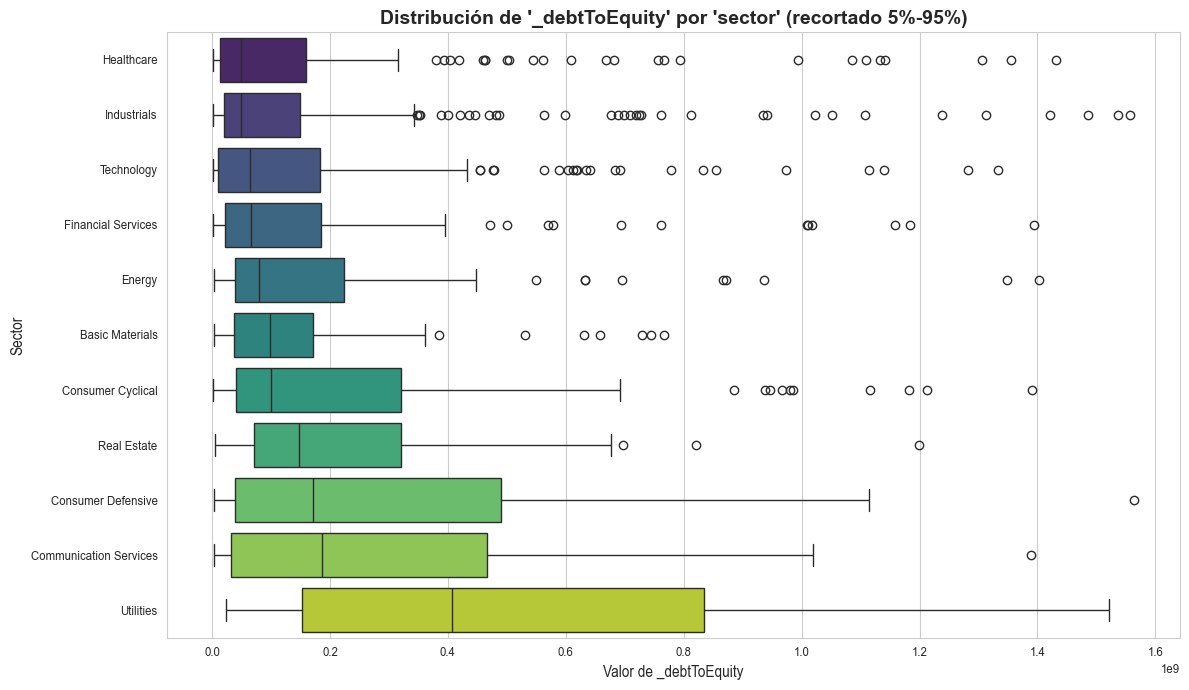

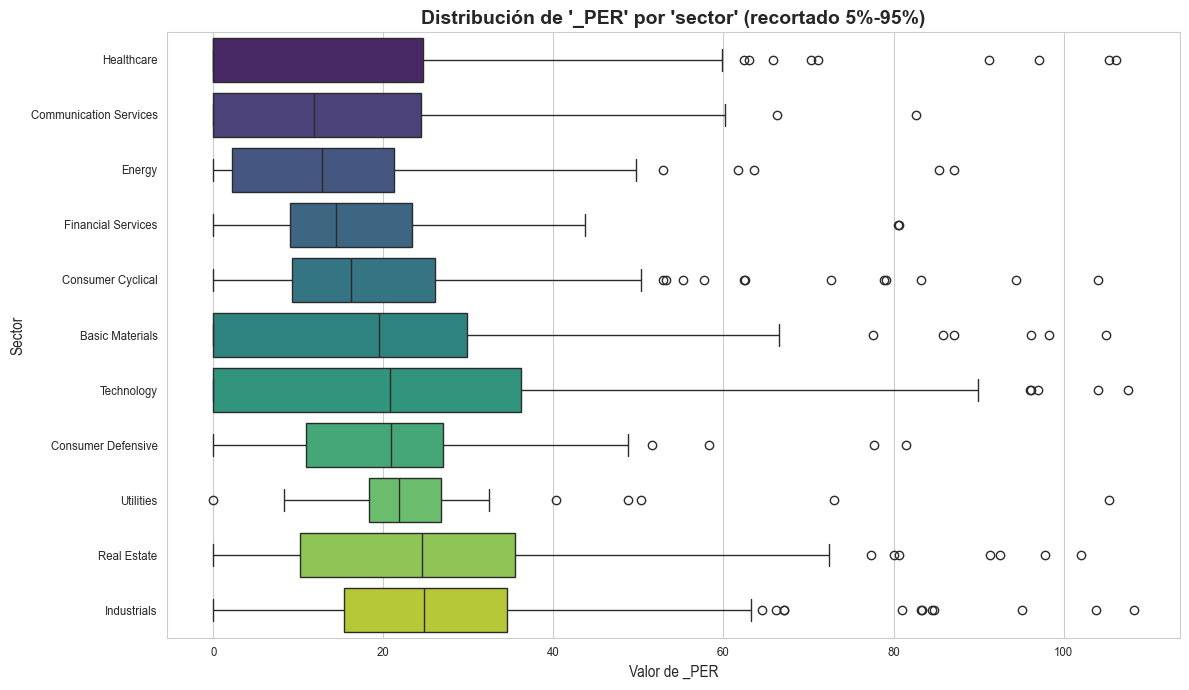

In [9]:
print("\n--- 3.5. Análisis de Interacción (Numérico vs Categórico) ---")

col = 'sector'  # Columna categórica clave para análisis de interacción 
for num_col in NUMERIC_FEATURES:
    if num_col in df.columns:
        plt.figure(figsize=(12, 7))
        
        # Recortar outliers para el gráfico
        q_low = df[num_col].quantile(0.05)
        q_high = df[num_col].quantile(0.95)
        df_clipped = df[(df[num_col] >= q_low) & (df[num_col] <= q_high)]
        
        # Ordenar sectores por mediana
        order = df_clipped.groupby(col)[num_col].median().sort_values().index

        sns.boxplot(data=df_clipped, x=num_col, y=col, order=order, palette='viridis')
        plt.title(f"Distribución de '{num_col}' por '{col}' (recortado 5%-95%)", fontsize=14, weight='bold')
        plt.xlabel(f'Valor de {num_col}', fontsize=12)
        plt.ylabel('Sector', fontsize=12)
        # plt.savefig(os.path.join(output_dir, f'eda_4_interaction_{num_col}_vs_{col}.png'))
        # plt.close()

#### PASO 4: PREPROCESAMIENTO DE DATOS E INGENIERÍA DE CARACTERÍSTICAS

Eliminamos columnas que no aportan información por la alta multicolinearidad, eliminamos outliers...


In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("\n--- INICIANDO PRE-PROCESAMIENTO AVANZADO DE DATOS ---")
print("\n--- Paso 1: Eliminando features de Varianza Cero ---")

low_variance_cats = []
for col in CATEGORICAL_FEATURES:
    if X[col].nunique() == 1:
        low_variance_cats.append(col)
        
if low_variance_cats:
    print(f"Eliminando categóricas de varianza cero: {low_variance_cats}")
    X = X.drop(columns=low_variance_cats)
    CATEGORICAL_FEATURES = [col for col in CATEGORICAL_FEATURES if col not in low_variance_cats]

selector = VarianceThreshold(threshold=0)
selector.fit(X[NUMERIC_FEATURES])

retained_cols_mask = selector.get_support()
dropped_cols = X[NUMERIC_FEATURES].columns[~retained_cols_mask]

if len(dropped_cols) > 0:
    print(f"Eliminando numéricas de varianza cero: {list(dropped_cols)}")
    X = X.drop(columns=dropped_cols)
    NUMERIC_FEATURES = [col for col in NUMERIC_FEATURES if col not in dropped_cols]

print(f"Features restantes: {X.shape[1]}")


--- INICIANDO PRE-PROCESAMIENTO AVANZADO DE DATOS ---

--- Paso 1: Eliminando features de Varianza Cero ---
Eliminando categóricas de varianza cero: ['is_Insolvent']
Features restantes: 52


In [12]:
print("\n--- Paso 2: Tratando Asimetría Extrema (Log-Transform) ---")
# Los datos financieros (ej. marketCap) suelen tener una asimetría extrema
# Un log-transform ayuda a normalizarlos y controla outliers

skew_limit = 2.0 # Umbral alto
skewed_cols = []

for col in NUMERIC_FEATURES:
    # Asegurarse de que todos los datos sean > 0 para log
    if (X[col] > 0).all():
        skewness = X[col].skew()
        if abs(skewness) > skew_limit:
            skewed_cols.append(col)
            # np.log1p es log(1+x), que maneja ceros de forma segura
            X[col] = np.log1p(X[col])

print(f"Columnas tratadas con Log-Transform (skew > {skew_limit}): {skewed_cols}")



--- Paso 2: Tratando Asimetría Extrema (Log-Transform) ---
Columnas tratadas con Log-Transform (skew > 2.0): ['currentPrice', 'allTimeHigh', 'averageVolume', 'marketCap', 'priceToBook', 'totalRevenue', 'totalCash', 'totalDebt', 'quickRatio', 'currentRatio', 'bookValue', 'sharesOutstanding', 'floatShares', 'sharesShort', 'shortRatio', 'shortPercentOfFloat', 'fullTimeEmployees', '_debtToEquity']


Ojo aquí porque estamos realizando una técnica conocida como clipping o windsorization


--- Paso 3: Tratando Outliers Extremos (Clipping 1% - 99%) ---
  -> Recortando 15 outliers en 'numberOfAnalystOpinions'. Generando gráfico...
  -> Recortando 30 outliers en 'allTimeHigh'. Generando gráfico...
  -> Recortando 30 outliers en 'allTimeLow'. Generando gráfico...
  -> Recortando 30 outliers en '52WeekChange'. Generando gráfico...
  -> Recortando 30 outliers en 'fiftyDayAverageChangePercent'. Generando gráfico...
  -> Recortando 30 outliers en 'twoHundredDayAverageChangePercent'. Generando gráfico...
  -> Recortando 30 outliers en 'beta'. Generando gráfico...
  -> Recortando 30 outliers en 'enterpriseValue'. Generando gráfico...
  -> Recortando 30 outliers en 'priceToBook'. Generando gráfico...
  -> Recortando 30 outliers en 'enterpriseToRevenue'. Generando gráfico...
  -> Recortando 30 outliers en 'profitMargins'. Generando gráfico...
  -> Recortando 30 outliers en 'grossMargins'. Generando gráfico...
  -> Recortando 30 outliers en 'ebitdaMargins'. Generando gráfico...
  ->

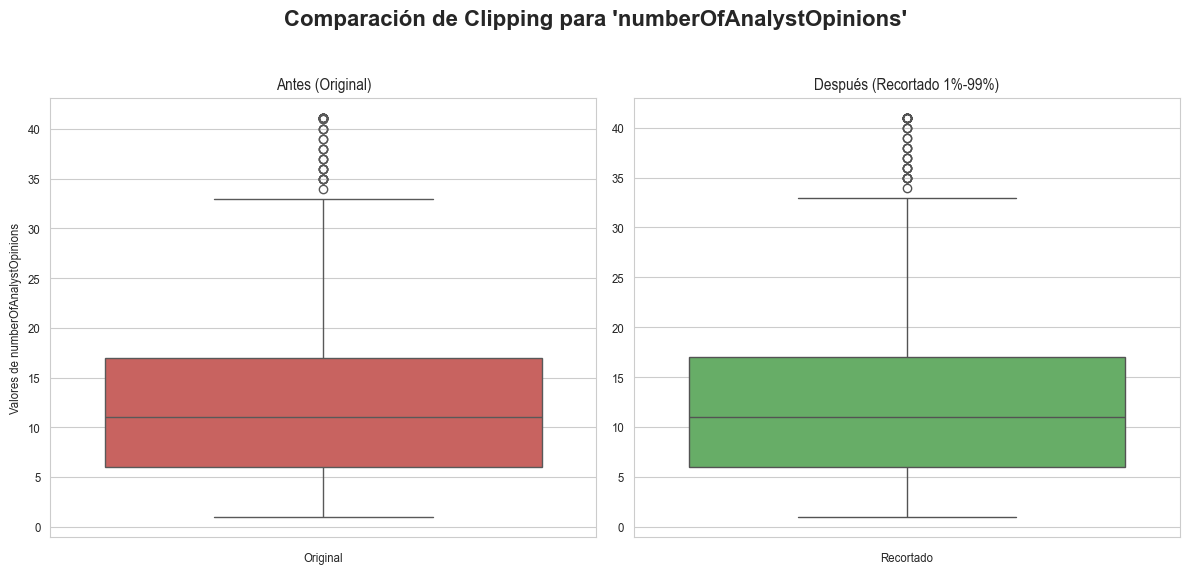

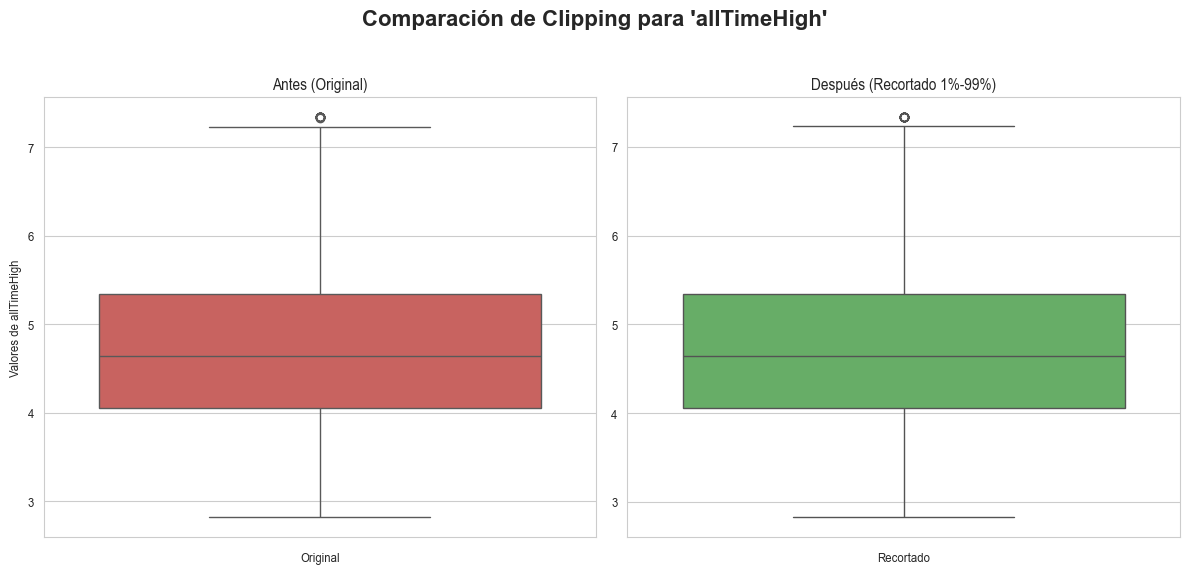

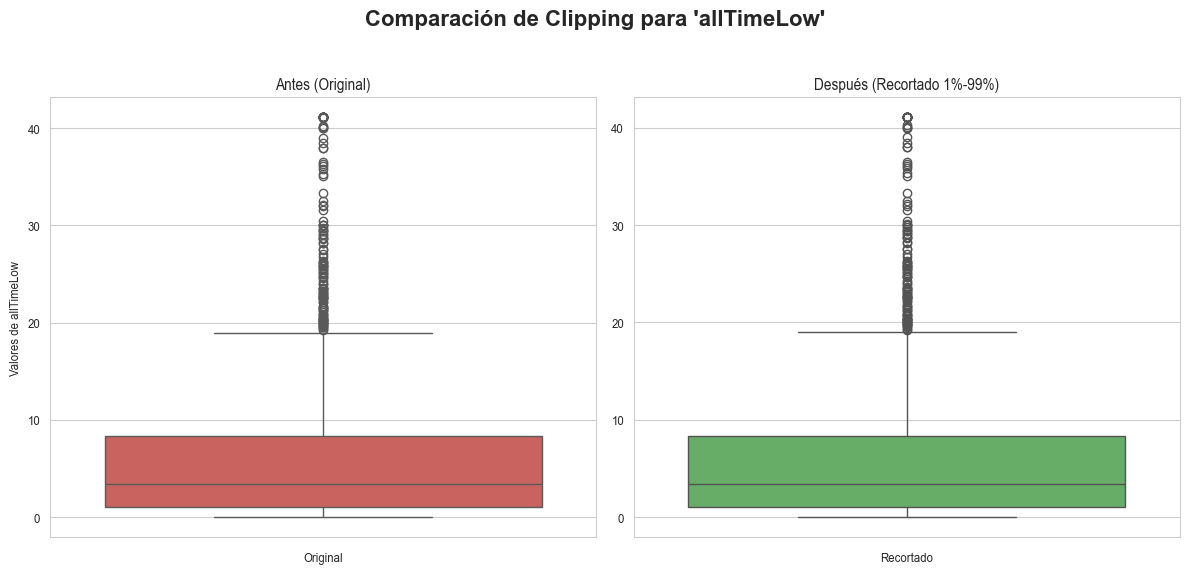

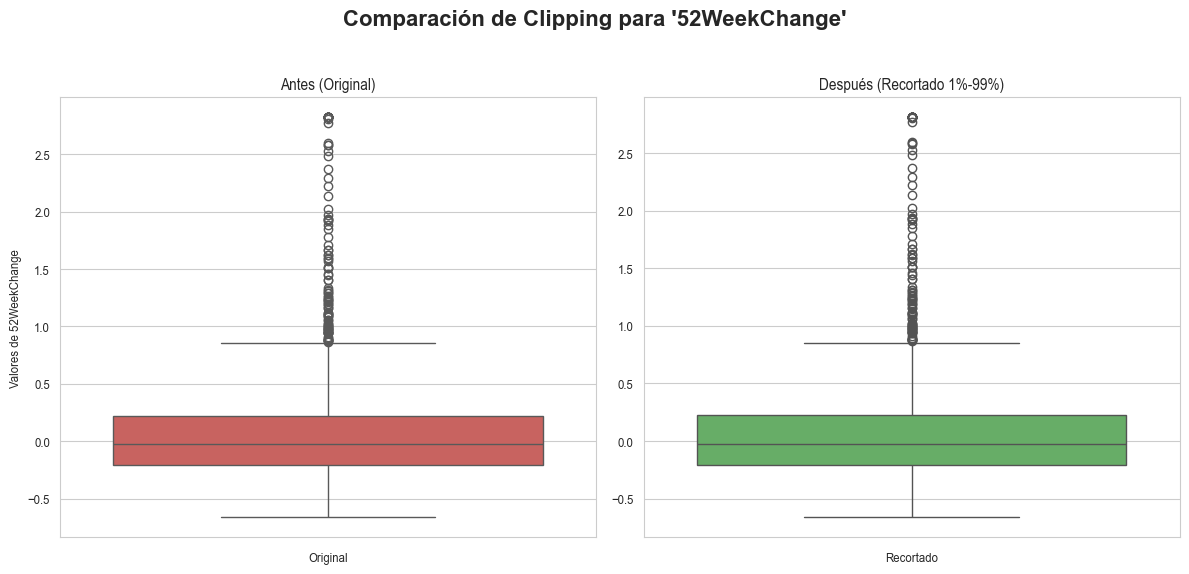

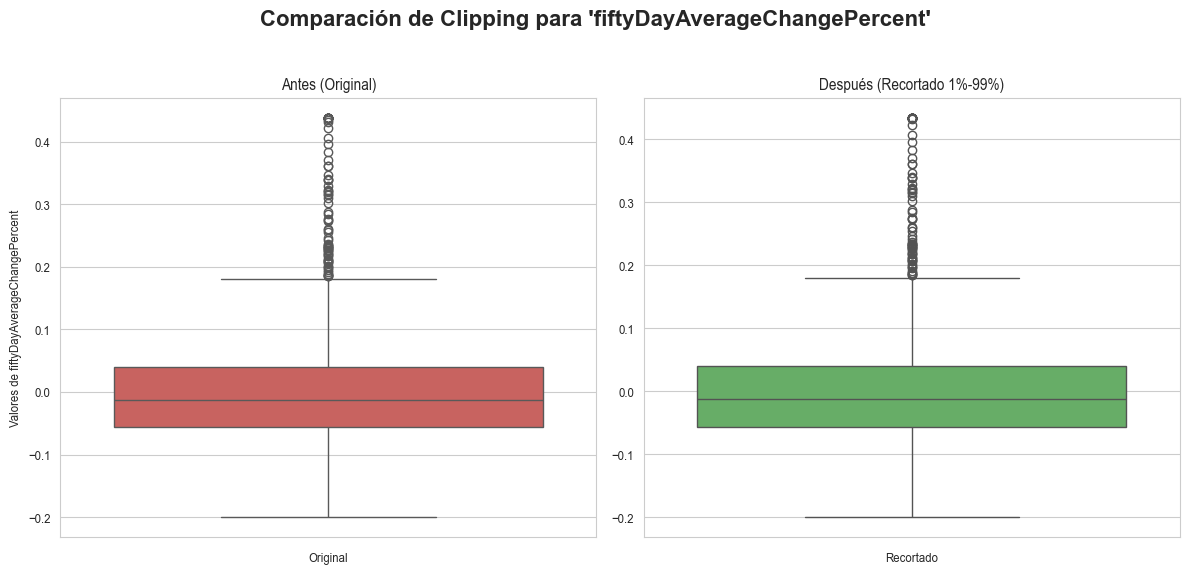

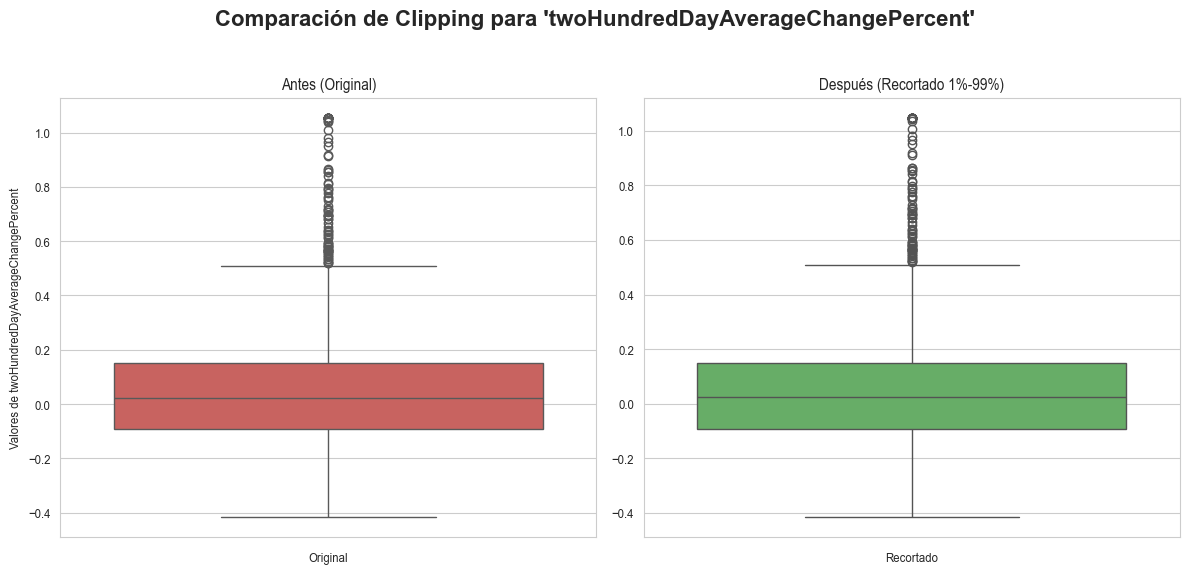

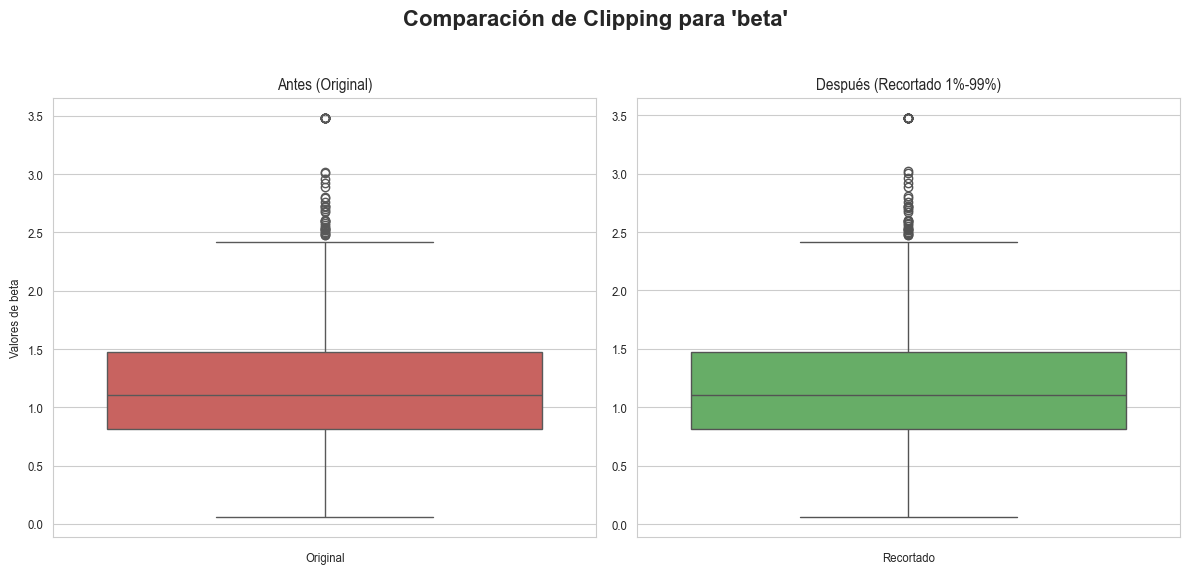

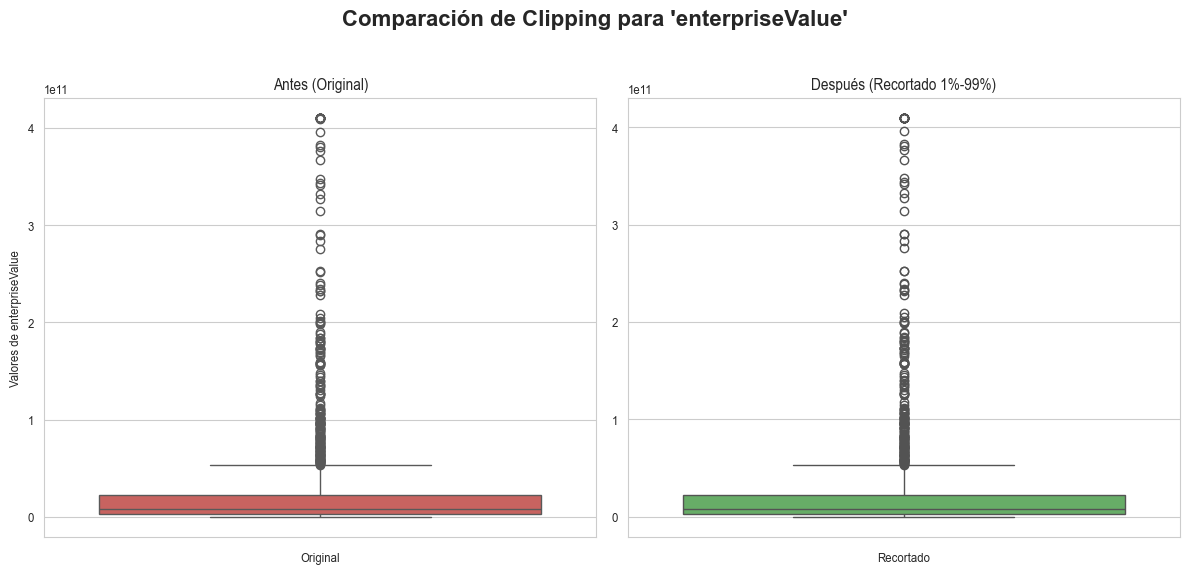

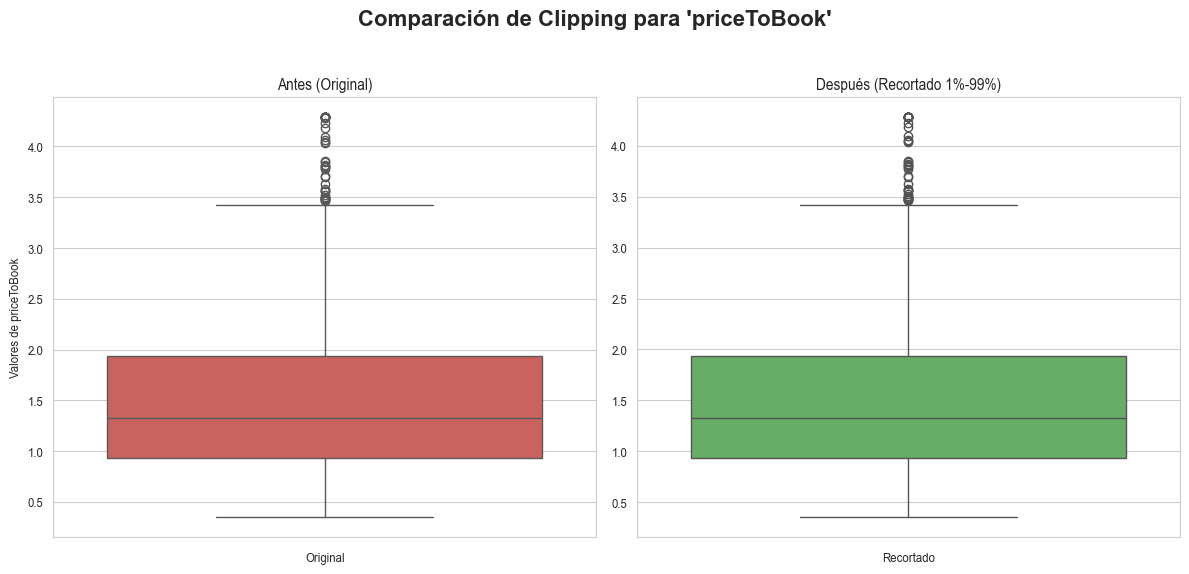

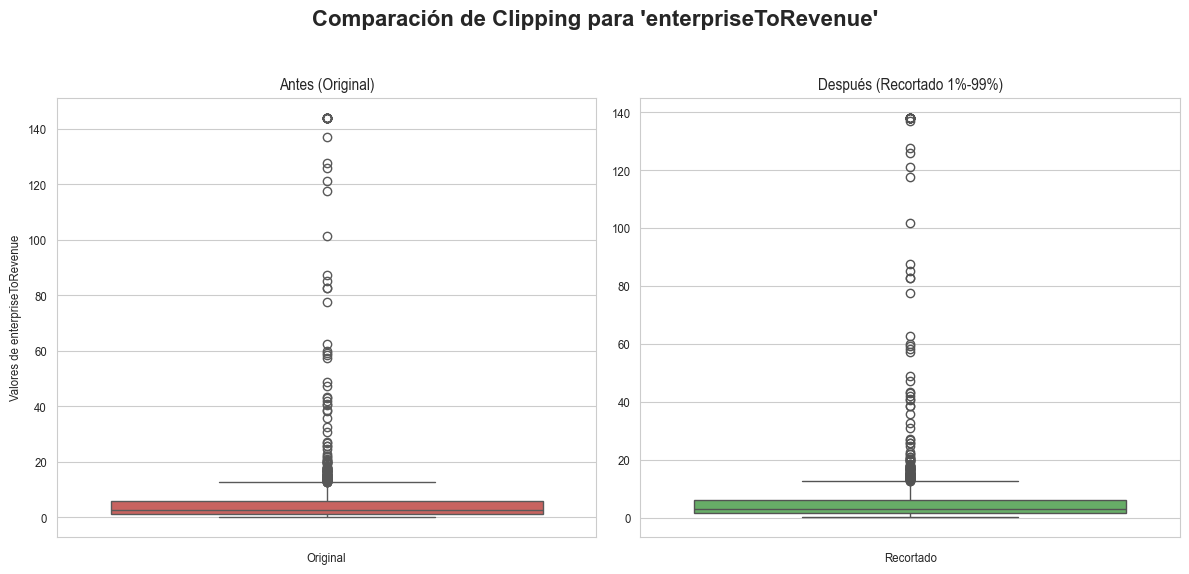

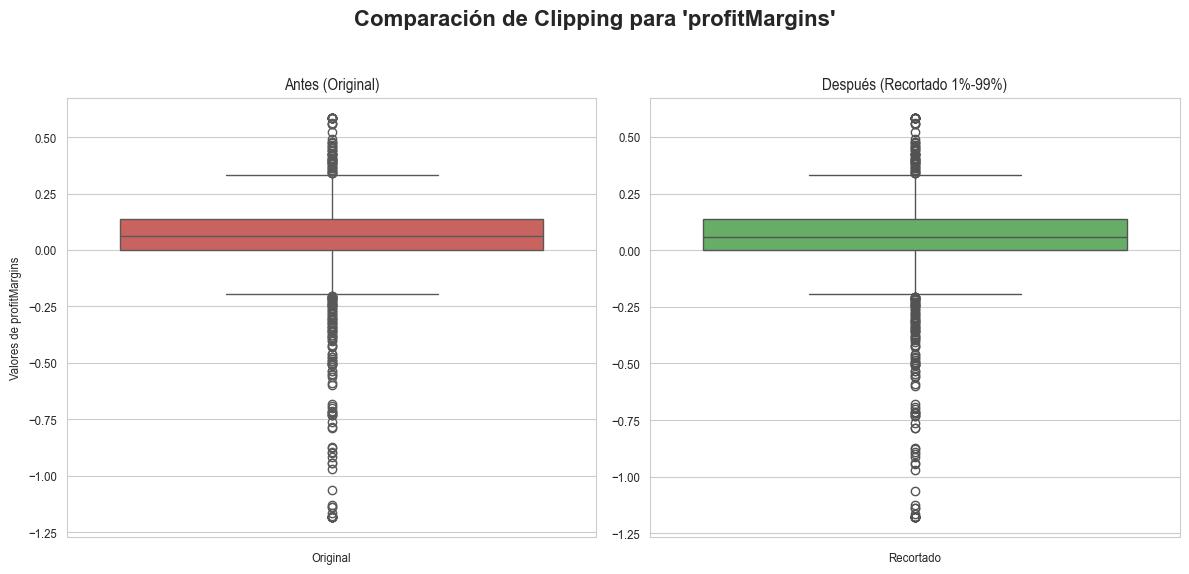

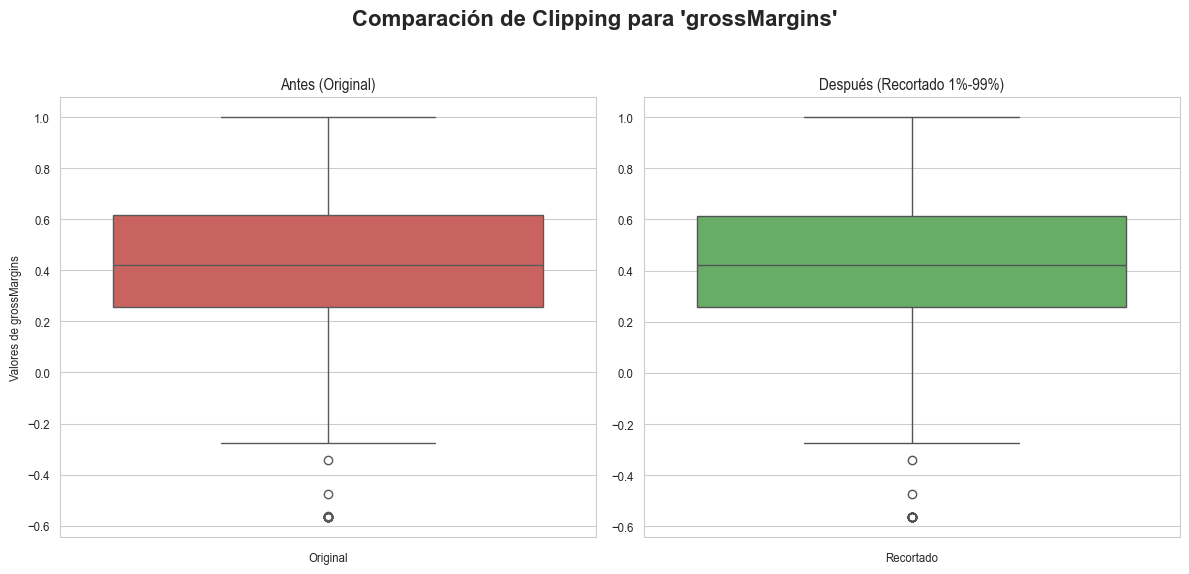

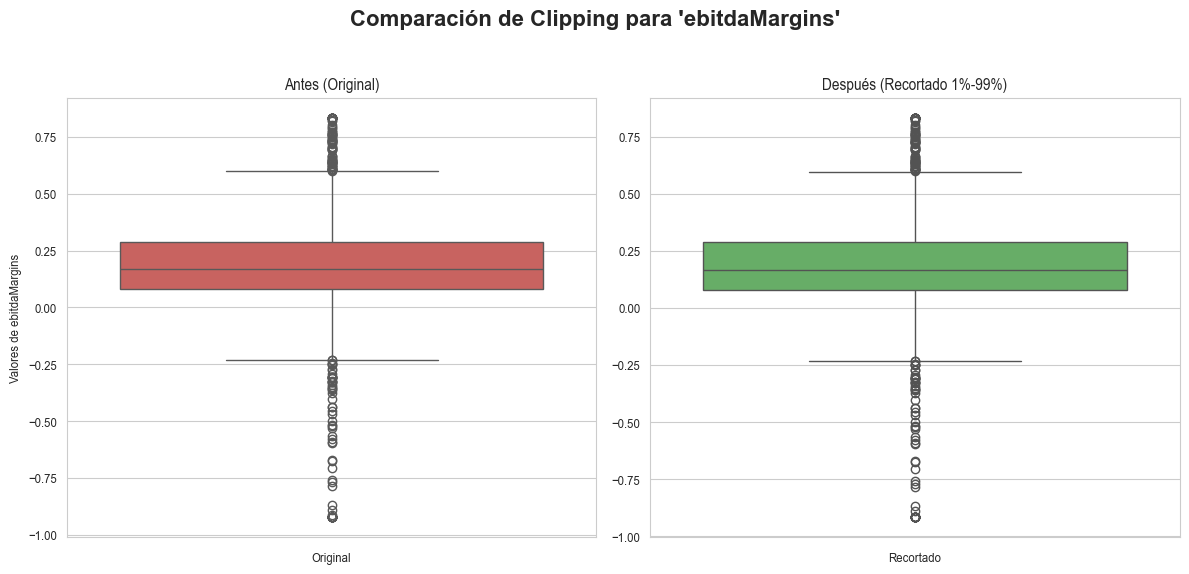

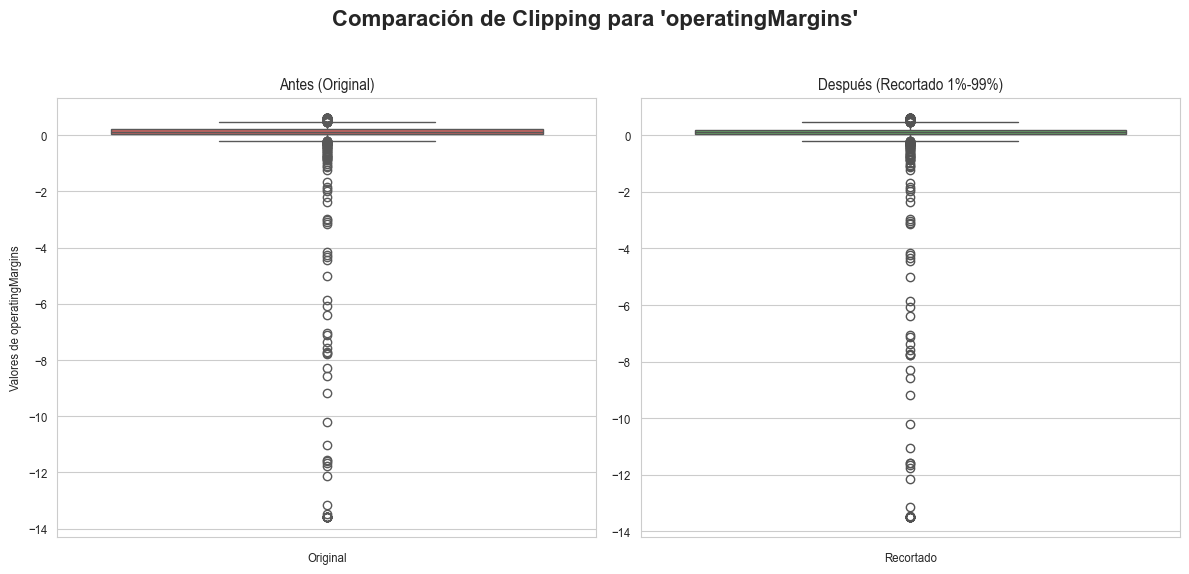

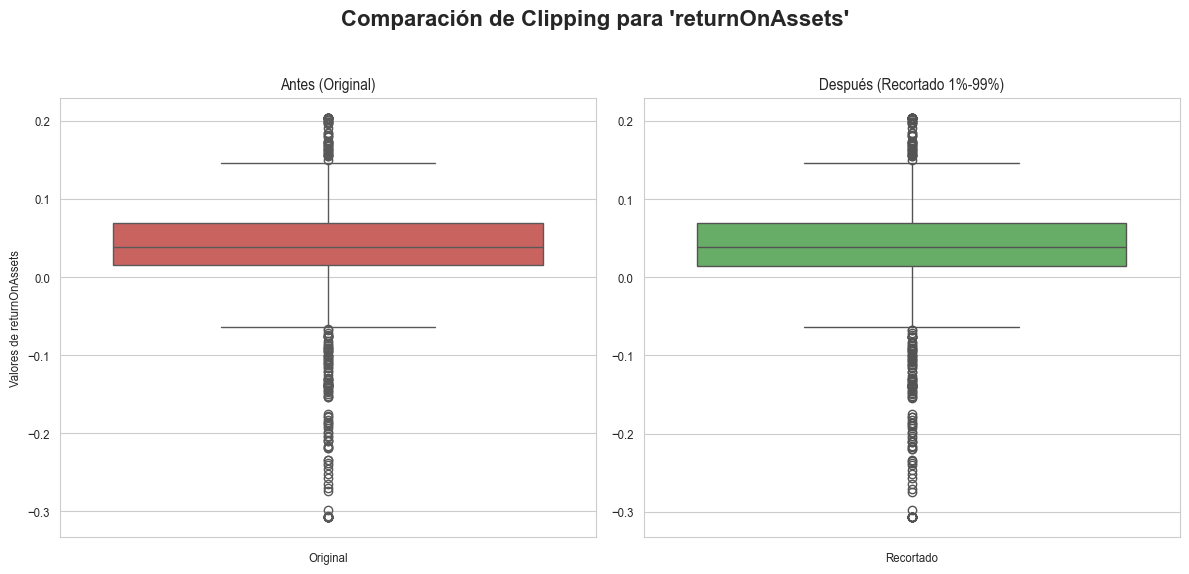

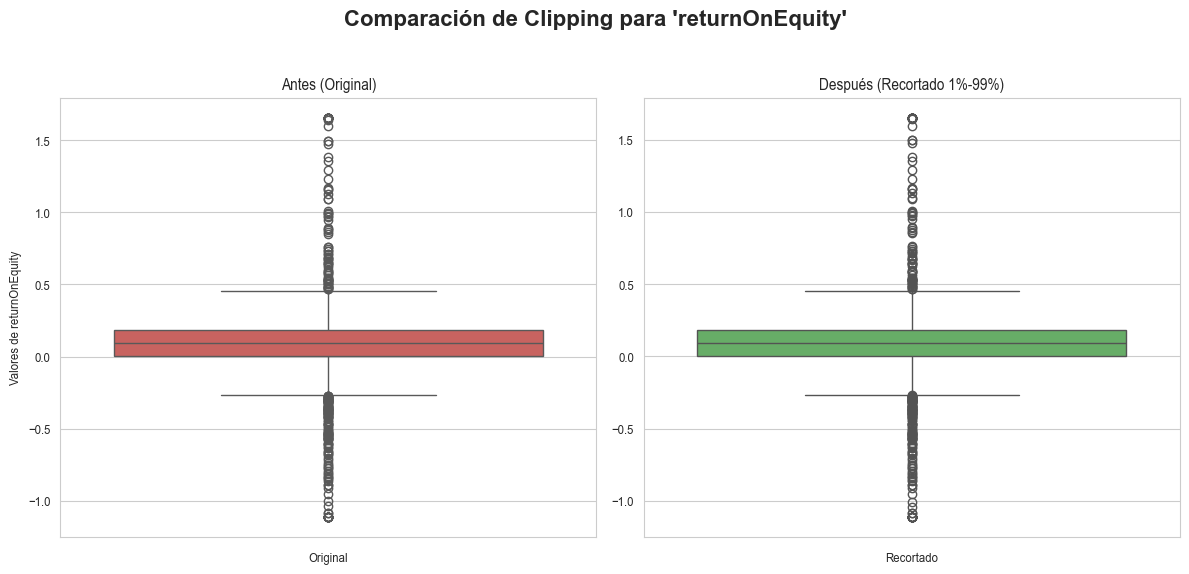

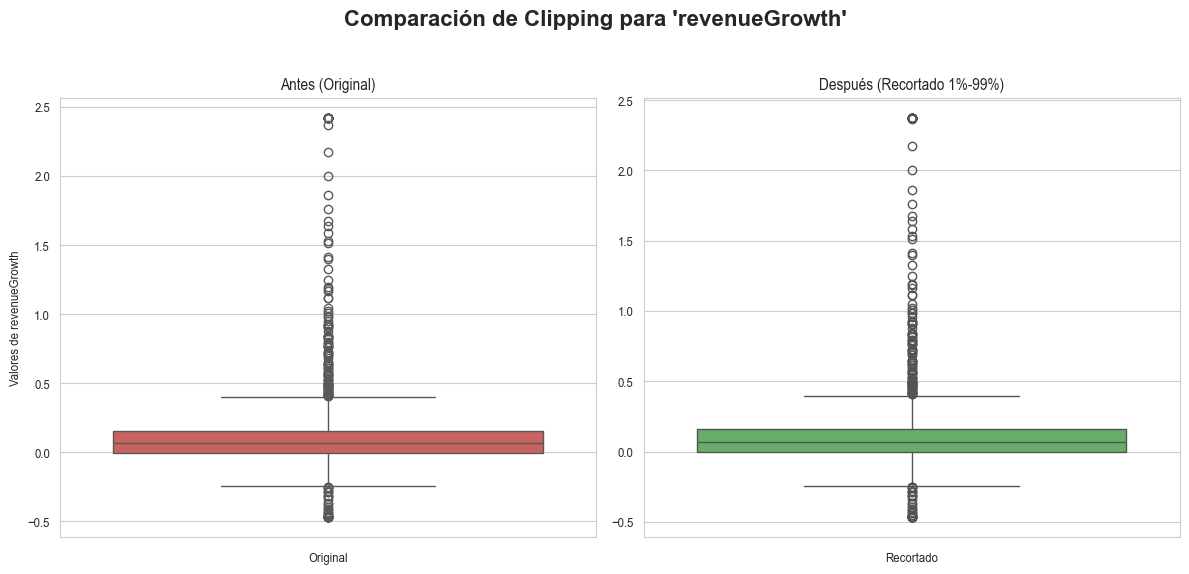

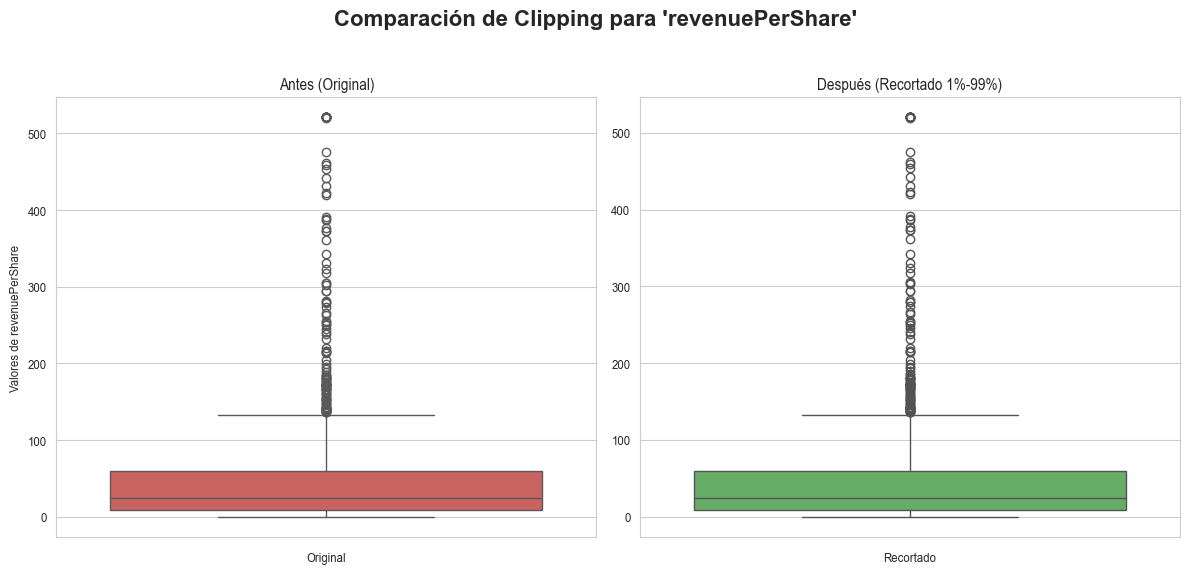

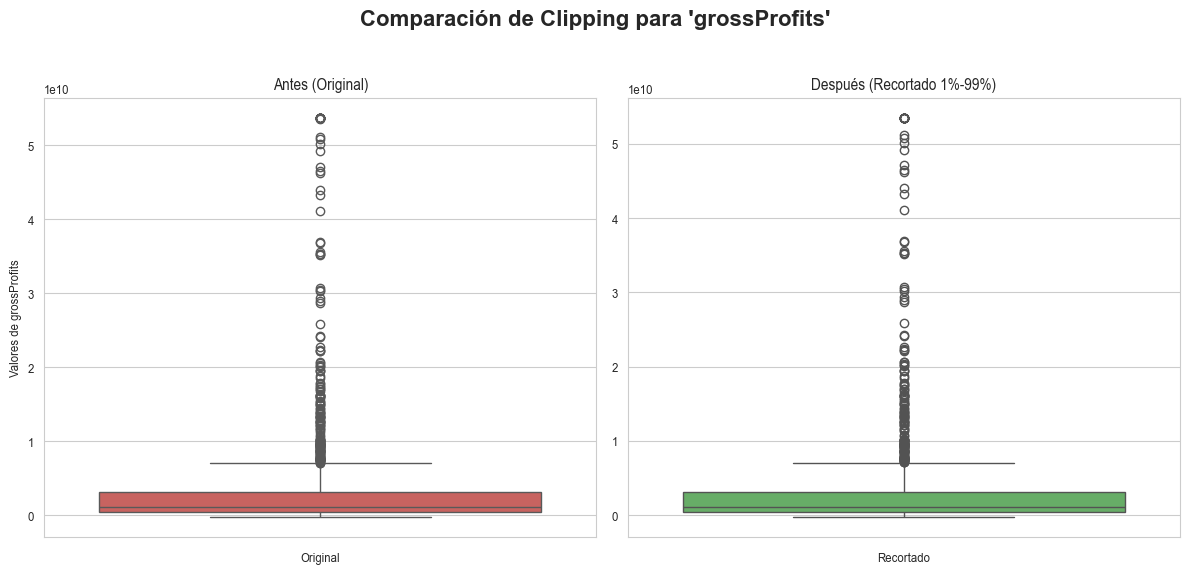

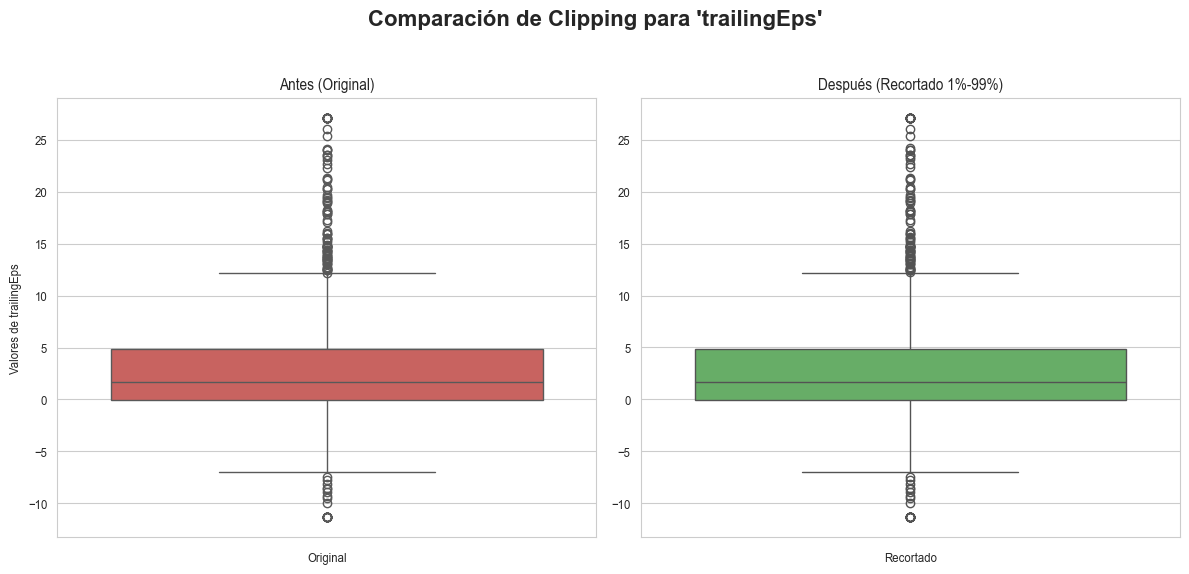

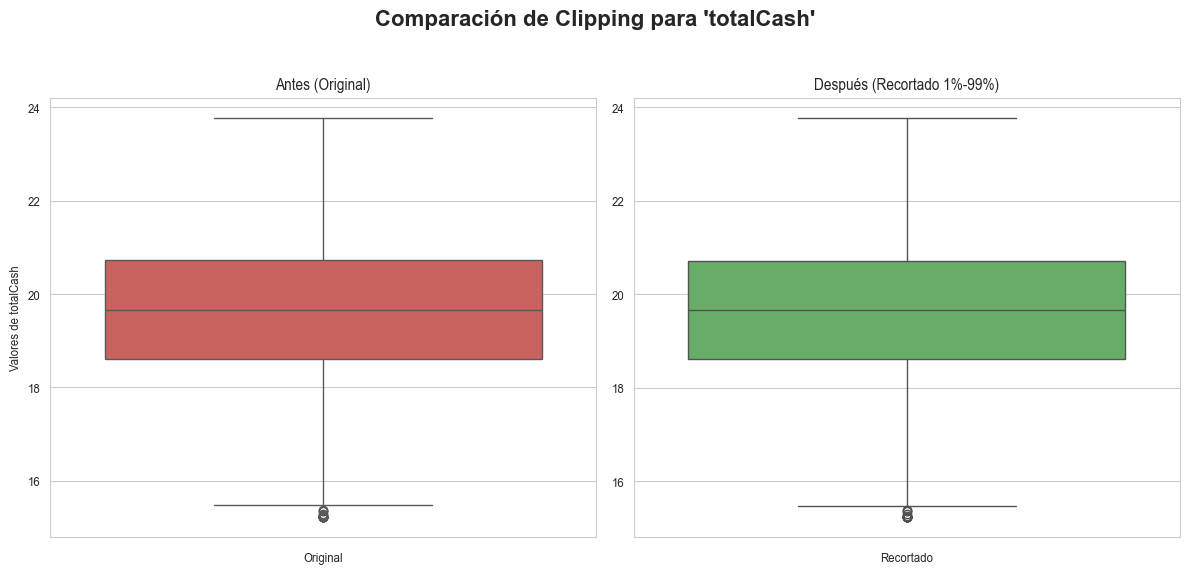

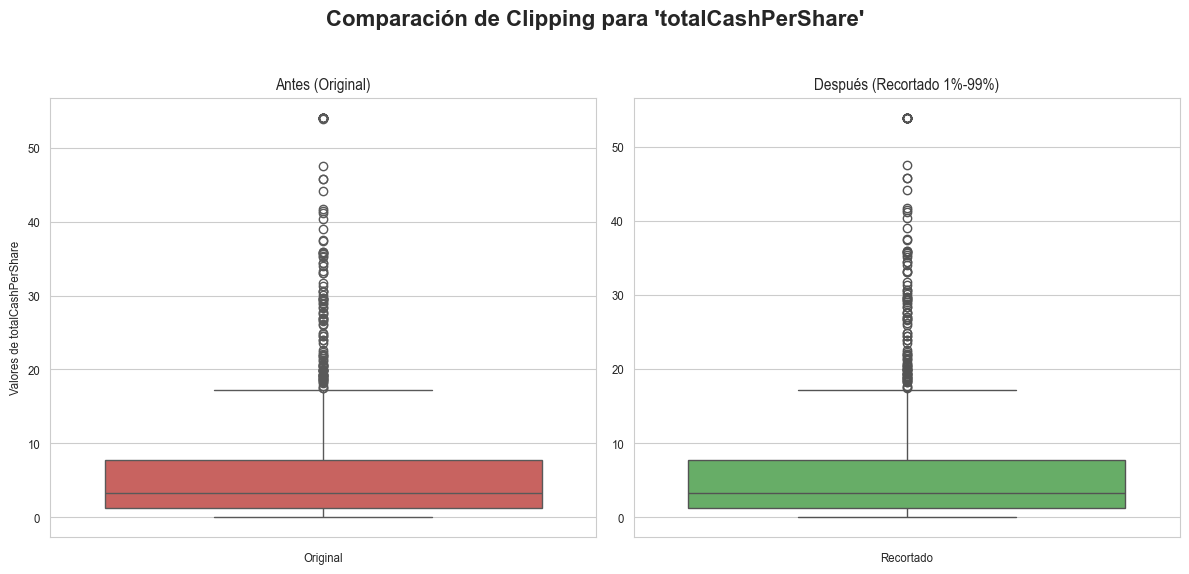

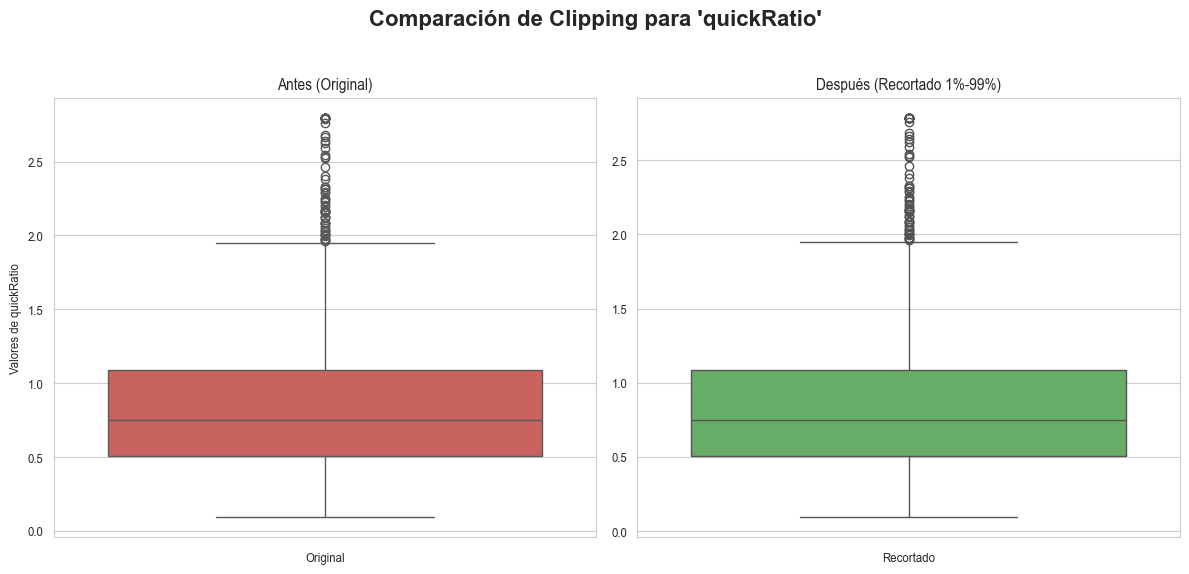

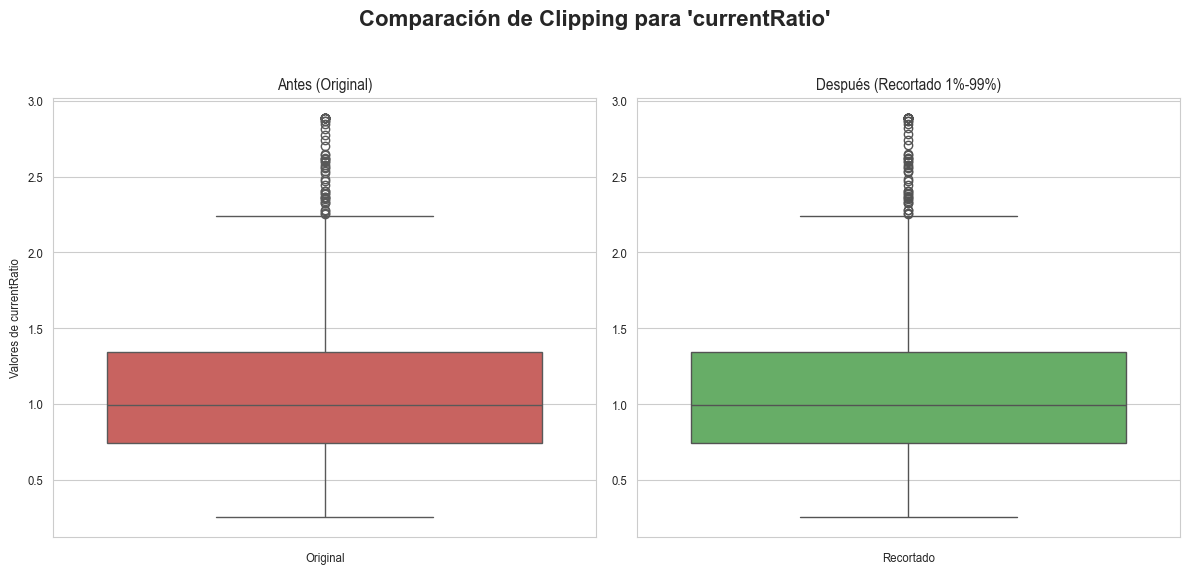

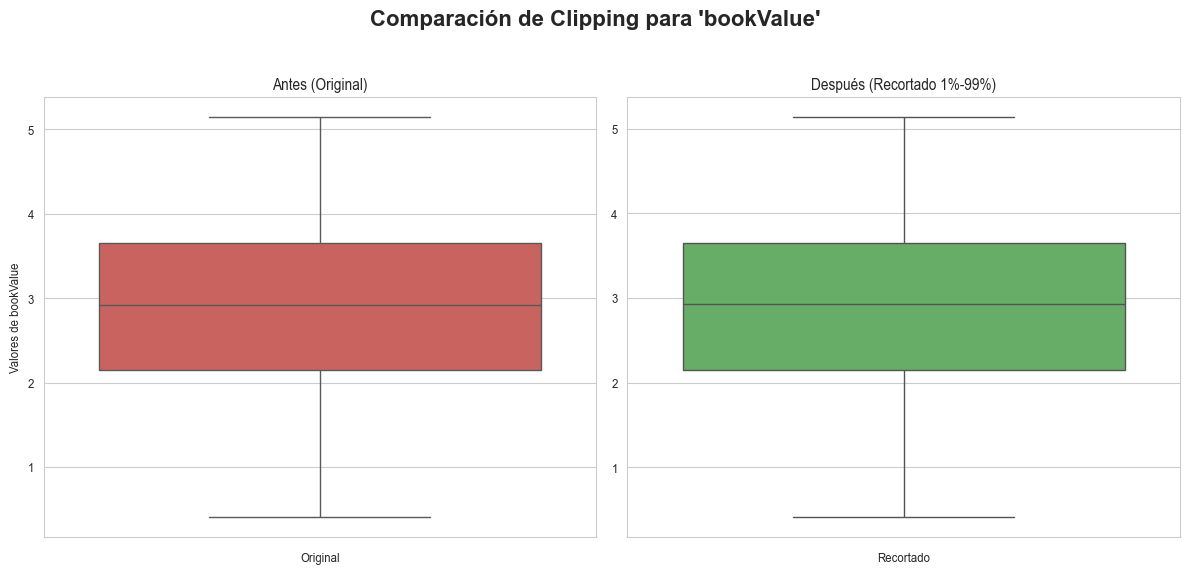

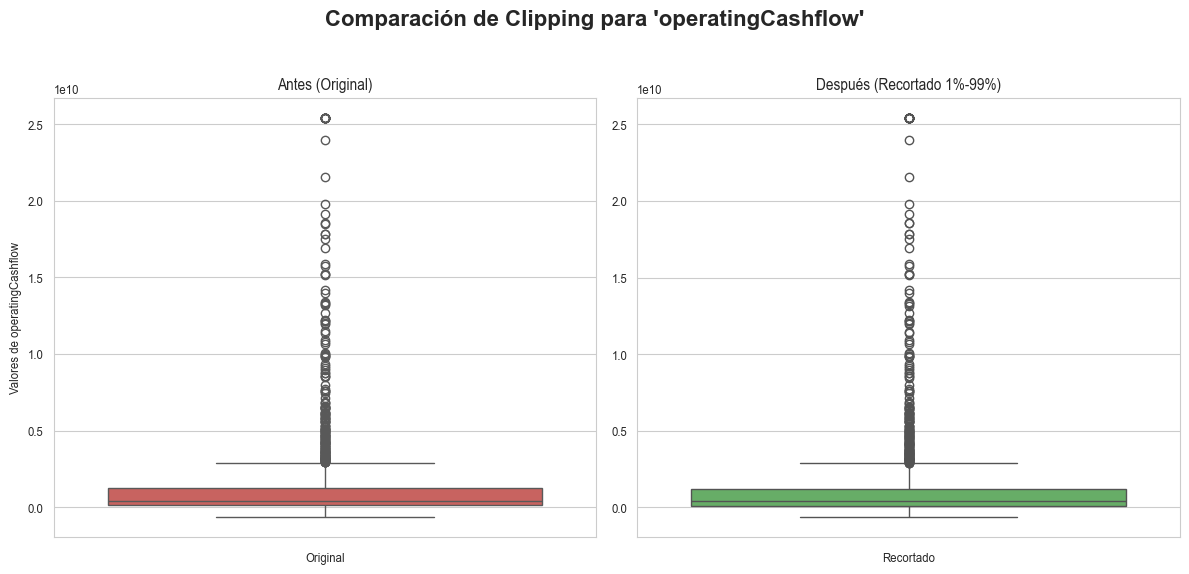

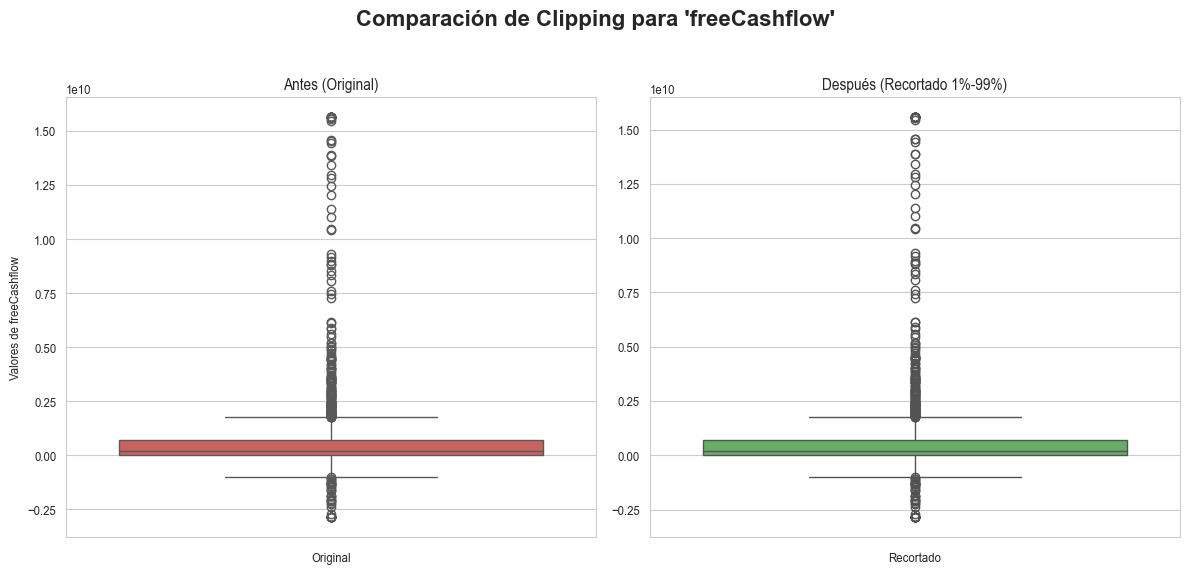

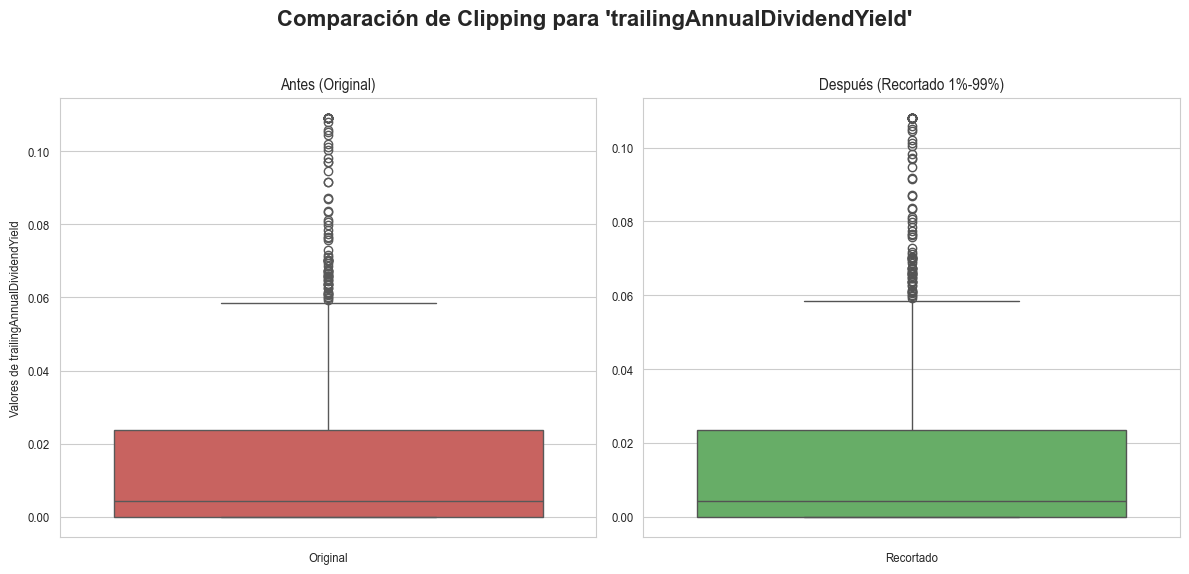

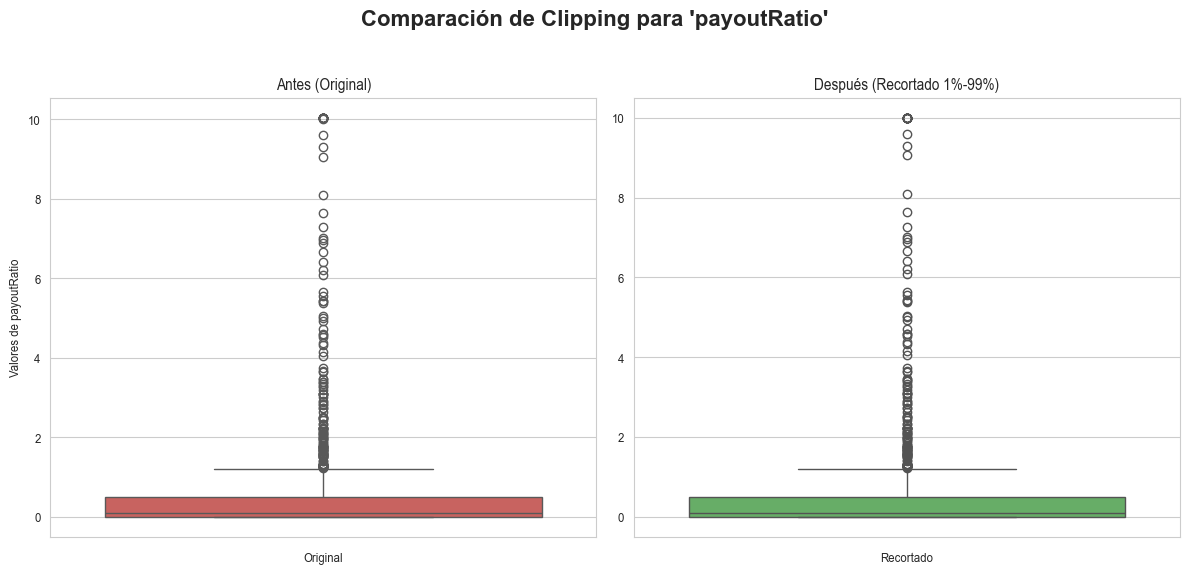

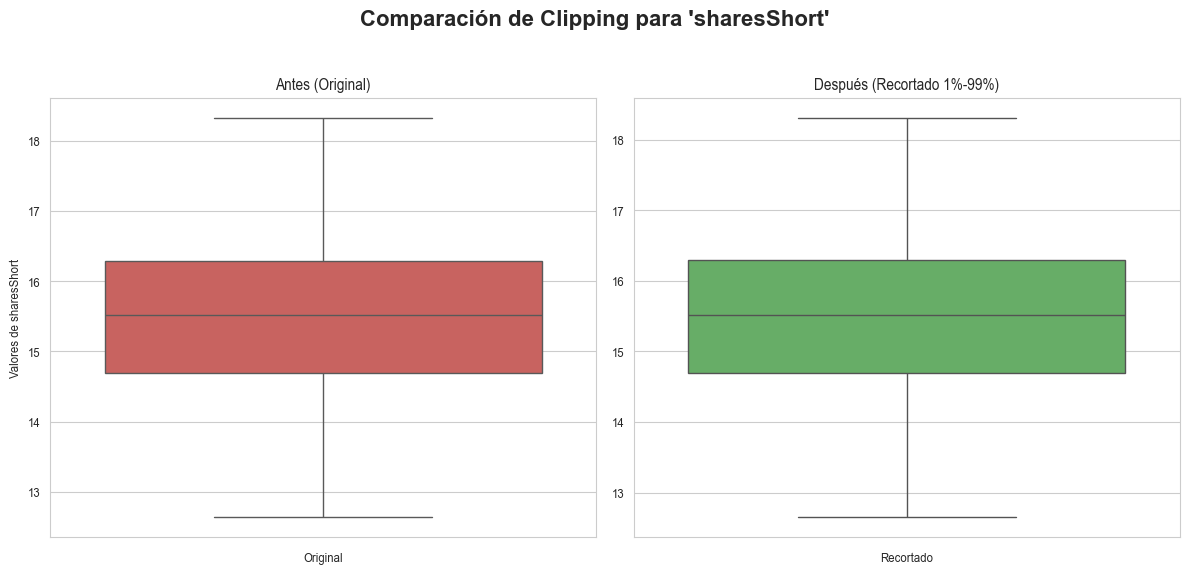

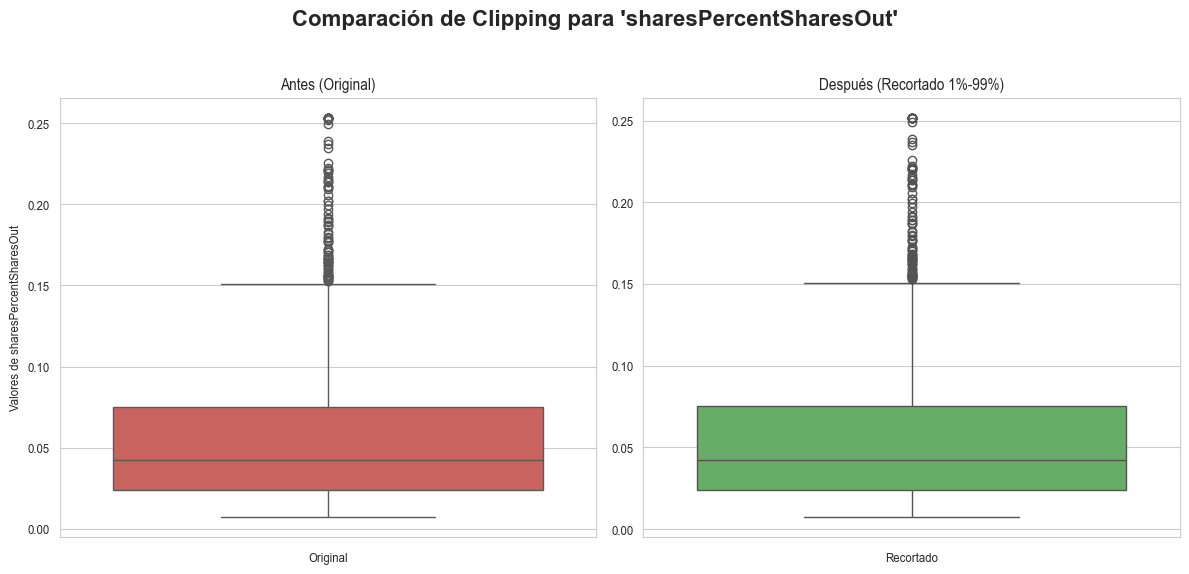

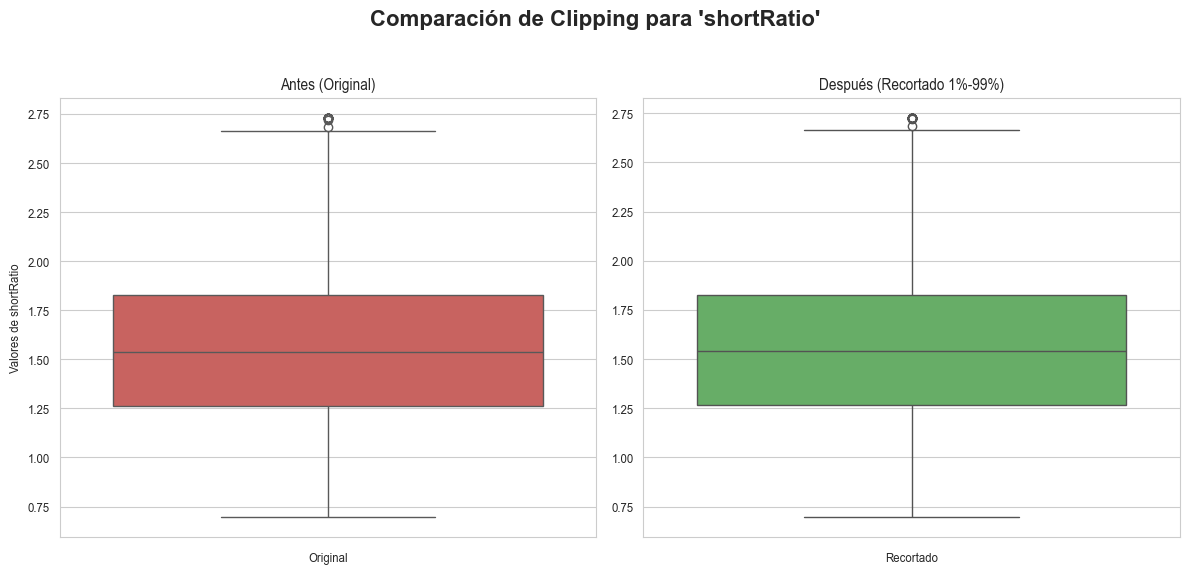

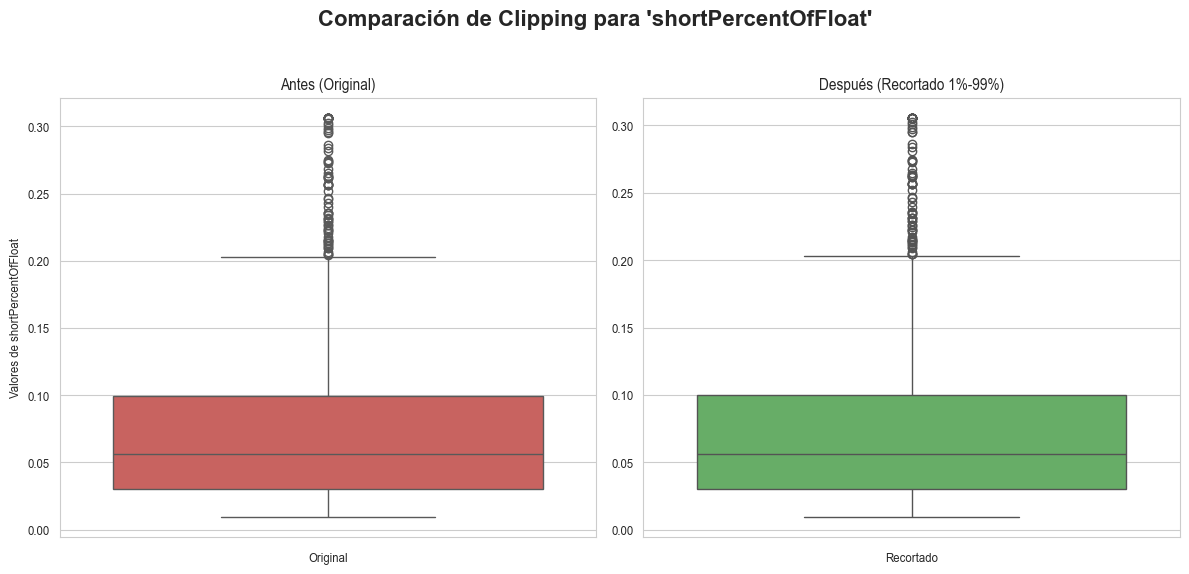

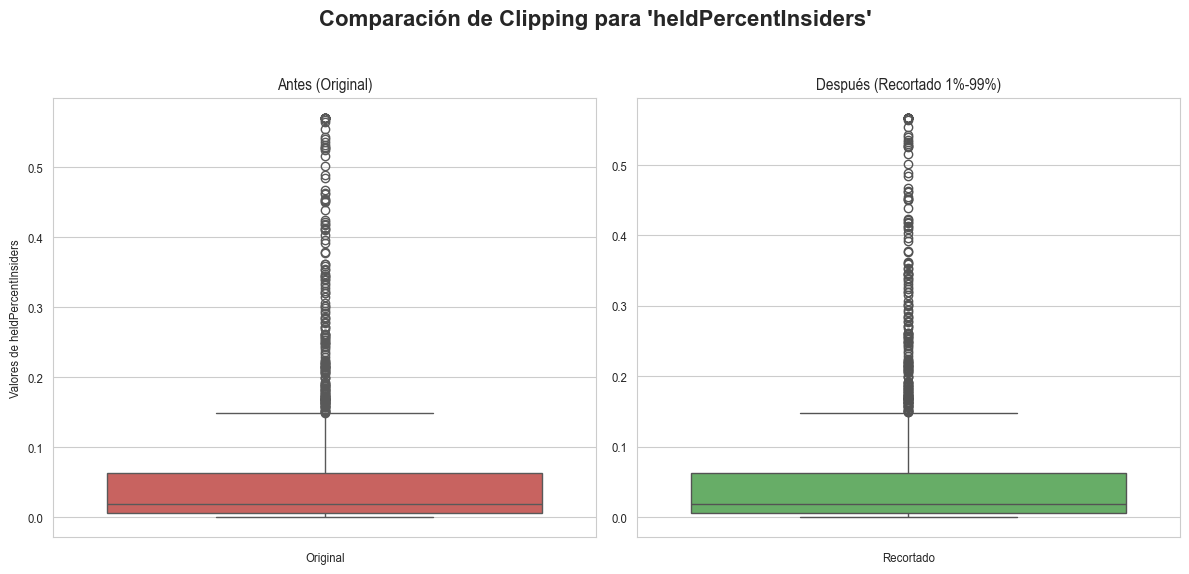

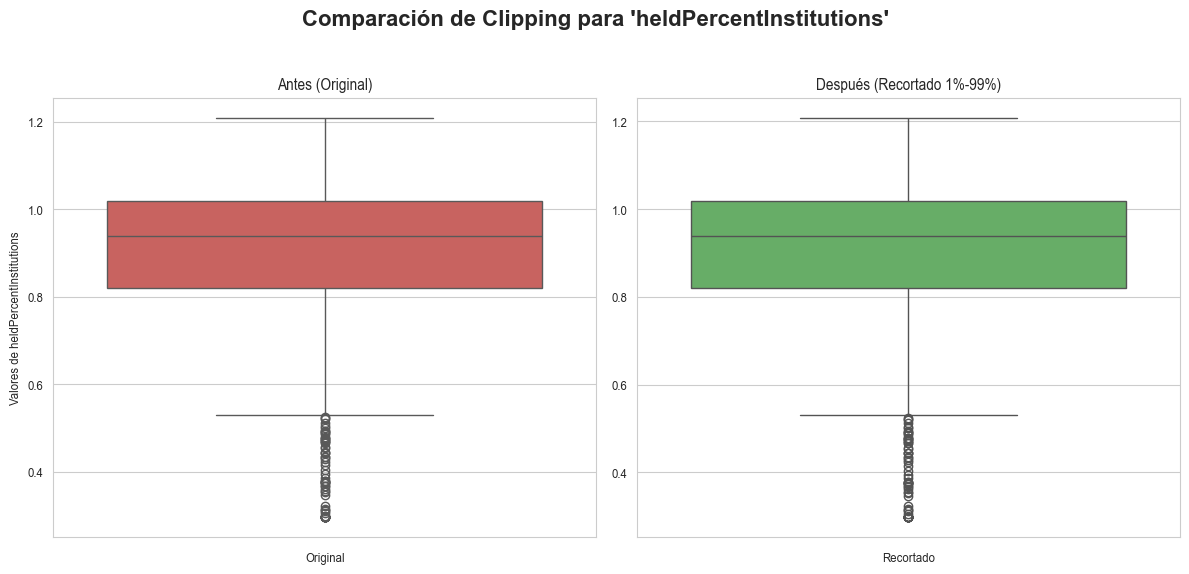

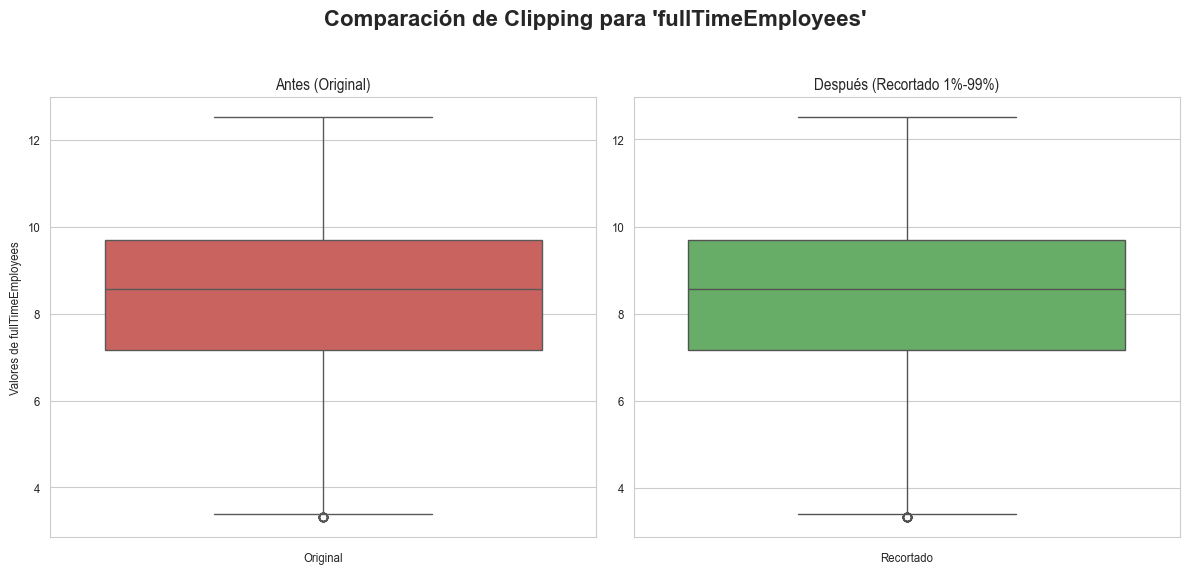

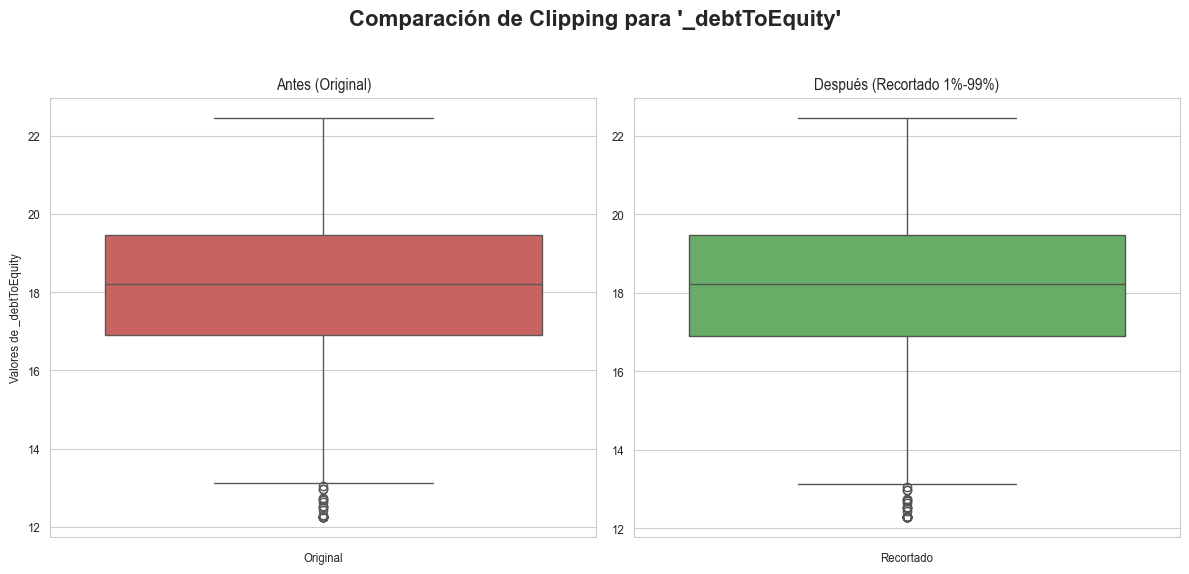

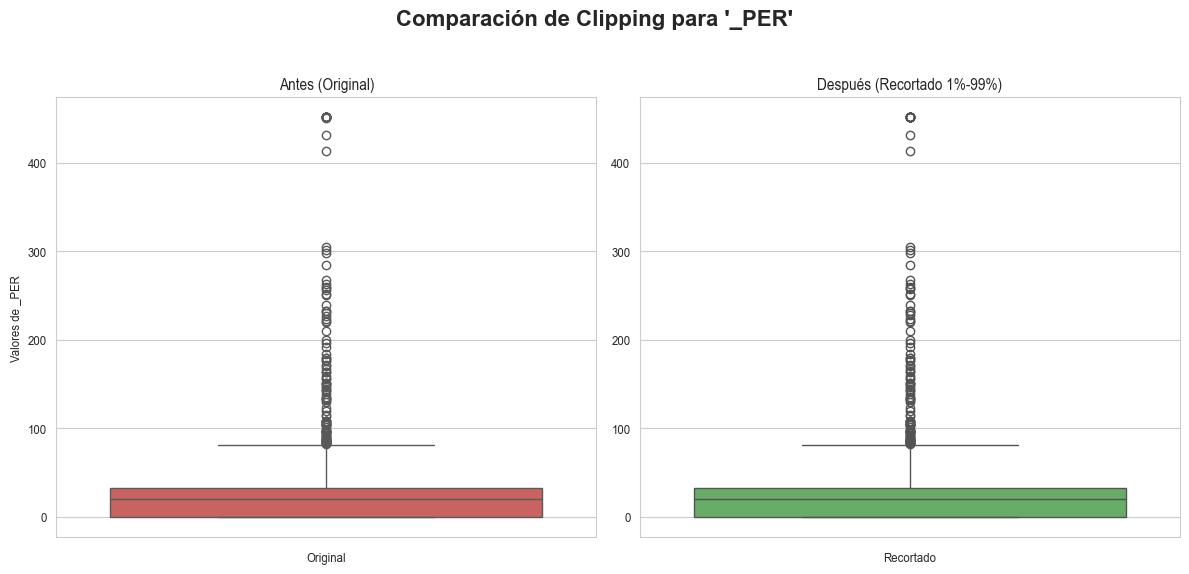

In [17]:
print("\n--- Paso 3: Tratando Outliers Extremos (Clipping 1% - 99%) ---")
# "Recortamos" los valores extremos para reducir el ruido

# Hacemos una copia temporal para los gráficos (opcional, pero más seguro)
X_clipped = X.copy()

for col in NUMERIC_FEATURES:
    q_01 = X_clipped[col].quantile(0.01)
    q_99 = X_clipped[col].quantile(0.99)
    
    # Contar cuántos valores se recortan
    clipped_count = (X_clipped[col] < q_01).sum() + (X_clipped[col] > q_99).sum()
    
    if clipped_count > 0:
        print(f"  -> Recortando {clipped_count} outliers en '{col}'. Generando gráfico...")
        
        # --- Creación del Gráfico "Antes y Después" ---
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        fig.suptitle(f"Comparación de Clipping para '{col}'", fontsize=16, weight='bold')

        # Boxplot ANTES
        sns.boxplot(y=X[col], ax=ax1, color="#D9534F") # Rojo
        ax1.set_title(f"Antes (Original)")
        ax1.set_ylabel(f"Valores de {col}")
        ax1.set_xlabel("Original")

        # Aplicar el clipping SÓLO a la copia para el gráfico
        X_col_clipped_data = X_clipped[col].clip(q_01, q_99)

        # Boxplot DESPUÉS
        sns.boxplot(y=X_col_clipped_data, ax=ax2, color="#5CB85C") # Verde
        ax2.set_title(f"Después (Recortado 1%-99%)")
        ax2.set_ylabel("") # Ocultar etiqueta Y duplicada
        ax2.set_xlabel("Recortado")
        
        # Guardar el gráfico
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        # plt.savefig(os.path.join(output_dir_boxplots, f"clip_{col}.png"))
        # plt.close(fig) 
        
        # --- Fin del Gráfico ---

        # Aplicar el cambio permanentemente al DataFrame principal 'X'
        X[col] = X_col_clipped_data

    else:
        print(f"  -> No se encontraron outliers extremos en '{col}'. No se recorta.")


In [14]:
print("\n--- Paso 4: Eliminando Multicolinealidad (VIF Iterativo) ---")
# Usamos el Factor de Inflación de Varianza (VIF).
# Un VIF > 10 indica un problema serio de multicolinealidad.

# VIF solo funciona con datos numéricos, así que creamos un df temporal
# También deben estar escalados para un cálculo estable de VIF
X_numeric_scaled = StandardScaler().fit_transform(X[NUMERIC_FEATURES])
X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, 
                                   columns=NUMERIC_FEATURES, 
                                   index=X.index)

# VIF Iterativo:
# 1. Calcular VIF para todas
# 2. Encontrar la feature con el VIF más alto
# 3. Si es > 10, eliminarla
# 4. Repetir hasta que todas las features tengan VIF <= 10

vif_threshold = 10.0
features_to_keep = NUMERIC_FEATURES.copy()
dropped_vif_cols = []

while True:
    if len(features_to_keep) <= 1:
        break # No podemos calcular VIF con 1 o 0 features

    # Crear el DataFrame solo con las features que quedan
    df_vif_temp = X_numeric_scaled_df[features_to_keep]

    # Calcular VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = df_vif_temp.columns
    vif_data["VIF"] = [variance_inflation_factor(df_vif_temp.values, i) 
                       for i in range(df_vif_temp.shape[1])]
    
    # Encontrar VIF máximo
    max_vif = vif_data["VIF"].max()
    max_vif_feature = vif_data.loc[vif_data["VIF"].idxmax(), "feature"]
    
    if max_vif > vif_threshold:
        print(f"  -> VIF Alto detectado: '{max_vif_feature}' (VIF = {max_vif:.2f}). Eliminando.")
        # Eliminar la feature de nuestra lista
        features_to_keep.remove(max_vif_feature)
        dropped_vif_cols.append(max_vif_feature)
    else:
        # ¡Éxito! Todas las VIF están por debajo del umbral
        print(f"VIF estable. VIF máximo: {max_vif_feature} ({max_vif:.2f})")
        break

print(f"Columnas eliminadas por VIF alto: {dropped_vif_cols}")

# Actualizamos la lista final de features numéricas
NUMERIC_FEATURES = features_to_keep
# Actualizamos el DataFrame X
X = X[NUMERIC_FEATURES + CATEGORICAL_FEATURES]



--- Paso 4: Eliminando Multicolinealidad (VIF Iterativo) ---
  -> VIF Alto detectado: 'totalDebt' (VIF = 177.16). Eliminando.
  -> VIF Alto detectado: 'currentPrice' (VIF = 98.91). Eliminando.
  -> VIF Alto detectado: 'averageVolume' (VIF = 61.96). Eliminando.
  -> VIF Alto detectado: 'sharesOutstanding' (VIF = 42.96). Eliminando.
  -> VIF Alto detectado: 'ebitda' (VIF = 35.66). Eliminando.
  -> VIF Alto detectado: 'marketCap' (VIF = 33.61). Eliminando.
  -> VIF Alto detectado: 'totalRevenue' (VIF = 20.82). Eliminando.
  -> VIF Alto detectado: 'floatShares' (VIF = 16.53). Eliminando.
  -> VIF Alto detectado: 'netIncomeToCommon' (VIF = 13.70). Eliminando.
VIF estable. VIF máximo: grossProfits (9.67)
Columnas eliminadas por VIF alto: ['totalDebt', 'currentPrice', 'averageVolume', 'sharesOutstanding', 'ebitda', 'marketCap', 'totalRevenue', 'floatShares', 'netIncomeToCommon']


In [15]:
print("\n--- Paso 5: Creando el Preprocesador Final ---")
# Ahora que nuestras listas de features están limpias y curadas,
# creamos el 'ColumnTransformer' final.

# Transformador numérico (solo escalar, ya hemos limpiado)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Transformador categórico
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combinador final
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, NUMERIC_FEATURES),
        ('cat', categorical_transformer, CATEGORICAL_FEATURES)
    ],
    remainder='passthrough'
)


--- Paso 5: Creando el Preprocesador Final ---


In [16]:
print("\n--- Paso 6: Generando DataFrame Procesado Final ---")

# Aplicamos el preprocesador
X_processed = preprocessor.fit_transform(X)

# Recuperar los nombres de las columnas (¡muy importante!)
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(CATEGORICAL_FEATURES)
final_feature_names = NUMERIC_FEATURES + list(cat_feature_names)

# Crear el DataFrame final
X_processed_df = pd.DataFrame(
    X_processed, 
    columns=final_feature_names,
    index=X.index
)

print("\n--- PRE-PROCESAMIENTO AVANZADO COMPLETADO ---")
print(f"Forma del DataFrame procesado final (X_processed_df): {X_processed_df.shape}")
print("DataFrame 'y' (target) también está listo.")
print("\n--- Head del DataFrame Procesado (X_processed_df) ---")
print(X_processed_df.head())



--- Paso 6: Generando DataFrame Procesado Final ---

--- PRE-PROCESAMIENTO AVANZADO COMPLETADO ---
Forma del DataFrame procesado final (X_processed_df): (1486, 107)
DataFrame 'y' (target) también está listo.

--- Head del DataFrame Procesado (X_processed_df) ---
   numberOfAnalystOpinions  allTimeHigh  allTimeLow  52WeekChange  fiftyDayAverageChangePercent  twoHundredDayAverageChangePercent   beta  enterpriseValue  priceToBook  enterpriseToRevenue  profitMargins  grossMargins  ebitdaMargins  operatingMargins  returnOnAssets  returnOnEquity  revenueGrowth  revenuePerShare  grossProfits  trailingEps  totalCash  totalCashPerShare  quickRatio  currentRatio  bookValue  operatingCashflow  freeCashflow  trailingAnnualDividendYield  payoutRatio  sharesShort  sharesPercentSharesOut  shortRatio  shortPercentOfFloat  heldPercentInsiders  heldPercentInstitutions  fullTimeEmployees  _debtToEquity   _PER  sector_Basic Materials  sector_Communication Services  sector_Consumer Cyclical  sector_Consum

#### PASO 5. GUARDO EL NUEVO DATASET PROCESADO

In [19]:
X_processed_df.index = y.index
final_df = pd.concat([y, X_processed_df], axis=1)

final_df.to_csv('../processed_main_financial_metrics.csv', index=False)